ДЗ-4: Группа БЭК-203: Нестерова Екатерина, Холощак Анастасия, Яранцева Анастасия

Шаг 1: парсинг. Создадим функции для парсинга

Сайт для парсинга: https://www.nozhikov.ru/collection/skladnye-nozhi
Это магазин ножей, мы рассматриваем раздел складных ножей. Данные будут получены с первых 11 страниц, так как на них содержится 528 ножей, 18 признаков по каждому.

In [ ]:
# Анастасия Холощак

import requests
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm
import pandas as pd




url = 'https://www.nozhikov.ru/collection/skladnye-nozhi'
requests.get(url)




def get_links(p):
    url = f'https://www.nozhikov.ru/collection/skladnye-nozhi?page={p}'
    rez = requests.get(url)
    soup = BeautifulSoup(rez.content)
    links = soup.find_all('div',{'class':'prod_cont'})
    ans = [link.a.get('href') for link in links]
    return ans





def get_names(p):
    ans = []
    for i in tqdm(get_links(p)):
        url = 'https://www.nozhikov.ru' + f'{i}'
        rez = requests.get(url)
        soup = BeautifulSoup(rez.content)
        name = soup.find('h1').text
        ans.append(name)
    return ans

names = []
for i in range(11):
    names = names + get_names(i)
print(names)



def get_prices(p):
    ans = []
    for i in tqdm(get_links(p)):
        url = 'https://www.nozhikov.ru' + f'{i}'
        rez = requests.get(url)
        soup = BeautifulSoup(rez.content)
        name = soup.find('div',{'class':'price js-product-price on-page'})
        name = float(name.get('date-price'))
        ans.append(name)
    return ans

prices = []
for i in range(11):
    prices = prices + get_prices(i)
print(prices)




def get_mat_rukoyati(p):
    ans = []
    for i in tqdm(get_links(p)):
        url = 'https://www.nozhikov.ru' + f'{i}'
        rez = requests.get(url)
        soup = BeautifulSoup(rez.content)
        name = soup.find_all('table',{'class':'table table-bordered table-striped table-hover'})[0]
        df = pd.read_html(str(name))[0]
        answer = "не указан"
        for i in df.values:
            if i[0] == 'Материал рукояти':
                answer = i[1]
        if answer == '':
            answer = 'не указан'
        ans.append(answer)
    return ans

mat_rukoyati = []
for i in range(11):
    mat_rukoyati = mat_rukoyati + get_mat_rukoyati(i)
print(mat_rukoyati)





def get_marka_stali(p):
    ans = []
    for i in tqdm(get_links(p)):
        url = 'https://www.nozhikov.ru' + f'{i}'
        rez = requests.get(url)
        soup = BeautifulSoup(rez.content)
        name = soup.find_all('table',{'class':'table table-bordered table-striped table-hover'})[0]
        df = pd.read_html(str(name))[0]
        answer = "не указана"
        for i in df.values:
            if i[0] == 'Марка стали':
                answer = i[1]
        if answer == '':
            answer = 'не указана'
        ans.append(answer)
    return ans

marka_stali = []
for i in range(11):
    marka_stali = marka_stali + get_marka_stali(i)
print(marka_stali)



def get_prednaznachenie(p):
    ans = []
    for i in tqdm(get_links(p)):
        url = 'https://www.nozhikov.ru' + f'{i}'
        rez = requests.get(url)
        soup = BeautifulSoup(rez.content)
        name = soup.find_all('table',{'class':'table table-bordered table-striped table-hover'})[0]
        df = pd.read_html(str(name))[0]
        answer = "не указано"
        for i in df.values:
            if i[0] == 'Предназначение':
                answer = i[1]
        if answer == '':
            answer = 'не указано'
        ans.append(answer)
    return ans

prednoznach = []
for i in range(11):
    prednoznach = prednoznach + get_prednaznachenie(i)
print(prednoznach)


# Екатерина Нестерова

def get_dlina_klinka(p):
    ans = []
    for i in tqdm(get_links(p)):
        url = 'https://www.nozhikov.ru' + f'{i}'
        rez = requests.get(url)
        soup = BeautifulSoup(rez.content)
        name = soup.find_all('table',{'class':'table table-bordered table-striped table-hover'})[0]
        df = pd.read_html(str(name))[0]
        answer = "не указанa"
        for i in df.values:
            if i[0] == 'Длина клинка (мм)':
                answer = int(i[1])
        if answer == '':
            answer = 'не указана'
        ans.append(answer)
    return ans

dlina_klinka = []
for i in range(11):
    dlina_klinka = dlina_klinka + get_dlina_klinka(i)
print(dlina_klinka)


def get_dlina_rukojati(p):
    ans = []
    for i in tqdm(get_links(p)):
        url = 'https://www.nozhikov.ru' + f'{i}'
        rez = requests.get(url)
        soup = BeautifulSoup(rez.content)
        name = soup.find_all('table',{'class':'table table-bordered table-striped table-hover'})[0]
        df = pd.read_html(str(name))[0]
        answer = 'не указана'
        for i in df.values:
            if i[0] == 'Длина рукояти (мм)':
                answer = int(i[1])
        if answer == '':
            answer = 'не указана'
        ans.append(answer)
    return ans

dlina_rukojati = []
for i in range(11):
    dlina_rukojati = dlina_rukojati + get_dlina_rukojati(i)
print(dlina_rukojati)


def get_dlina_v_raslogenom_sostoyanii(p):
    ans = []
    for i in tqdm(get_links(p)):
        url = 'https://www.nozhikov.ru' + f'{i}'
        rez = requests.get(url)
        soup = BeautifulSoup(rez.content)
        name = soup.find_all('table',{'class':'table table-bordered table-striped table-hover'})[0]
        df = pd.read_html(str(name))[0]
        answer = ''
        for i in df.values:
            if i[0] == 'Длина (мм)':
                answer = int(i[1])
        if answer == '':
            answer = 'не указана'
        ans.append(answer)
    return ans

dlina = []
for i in range(11):
    dlina = dlina + get_dlina_v_raslogenom_sostoyanii(i)
print(dlina)



def get_tolshina_obuha(p):
    sum1 = 0
    r = 0
    ans = []
    for i in tqdm(get_links(p)):
        url = 'https://www.nozhikov.ru' + f'{i}'
        rez = requests.get(url)
        soup = BeautifulSoup(rez.content)
        name = soup.find_all('table',{'class':'table table-bordered table-striped table-hover'})[0]
        df = pd.read_html(str(name))[0]
        answer = ''
        for i in df.values:
            if i[0] == 'Толщина обуха (мм)':
                i[1] = i[1].split(',')
                for l in range(len(i[1])):
                    if '-' in i[1][l]:
                        m = i[1][l].split('-')
                        c = 0
                        for d in m:
                            c += float(d)
                            c = float(c/2)
                            i[1].pop(l)
                            i[1].insert(l, c)
                    i[1][l] = float(i[1][l])
                    sum1 = sum1 + i[1][l]
                    r += 1
                answer = sum1/r
                r = 0
                sum1 = 0
        if answer == '':
            answer = 'не указана'
        ans.append(answer)
        answer = ''
    return ans

tolshina_obuha = []
for i in range(11):
    tolshina_obuha = tolshina_obuha + get_tolshina_obuha(i)
print(tolshina_obuha)


def get_tip(p):
    ans = []
    for i in tqdm(get_links(p)):
        url = 'https://www.nozhikov.ru' + f'{i}'
        rez = requests.get(url)
        soup = BeautifulSoup(rez.content)
        name = soup.find_all('table',{'class':'table table-bordered table-striped table-hover'})[0]
        df = pd.read_html(str(name))[0]
        answer = 'не указан'
        for i in df.values:
            if i[0] == 'Тип':
                answer = i[1]
        if answer == '':
            answer = 'не указан'
        ans.append(answer)
    return ans

tip = []
for i in range(11):
    tip = tip + get_tip(i)
print(tip)


#Анастасия Яранцева

def get_producer(p):
    ans = []
    for i in tqdm(get_links(p)):
        url = 'https://www.nozhikov.ru' + f'{i}'
        rez = requests.get(url)
        soup = BeautifulSoup(rez.content)
        name = soup.find_all('table',{'class':'table table-bordered table-striped table-hover'})[0]
        df = pd.read_html(str(name))[0]
        answer = 'не указан'
        for i in df.values:
            if i[0] == 'Производитель':
                answer = i[1]
        if answer == '':
            answer = 'не указан'
        ans.append(answer)
    return ans

proizvoditel = []
for i in range(11):
    proizvoditel= proizvoditel + get_producer(i)
print(proizvoditel)


weight = []
def get_weight(p):
    sum1 = 0
    r = 0
    ans = []
    for i in tqdm(get_links(p)):
        url = 'https://www.nozhikov.ru' + f'{i}'
        rez = requests.get(url)
        soup = BeautifulSoup(rez.content)
        name = soup.find_all('table',{'class':'table table-bordered table-striped table-hover'})[0]
        df = pd.read_html(str(name))[0]
        answer = ''
        for i in df.values:
            if i[0] == 'Вес (гр)':
                if 'г' in i[1]:
                    i[1] = i[1][:-1]
                i[1] = i[1].split(',')
                for l in range(len(i[1])):
                    if 'г' in i[1][l]:
                        i[1][l] = i[1][l][:-1]
                    i[1][l] = float(i[1][l])
                    sum1 = sum1 + i[1][l]
                    r += 1
                answer = sum1/r
                r = 0
                sum1 = 0
        if answer == '':
            answer = 'не указан'
        ans.append(answer)
        answer = ''
    return ans

weight = []
for i in range(11):
    weight = weight + get_weight(i)
print(weight)


firmness = []
def get_firmness(p):
    ans = []
    for i in tqdm(get_links(p)):
        url = 'https://www.nozhikov.ru' + f'{i}'
        rez = requests.get(url)
        soup = BeautifulSoup(rez.content)
        name = soup.find_all('table',{'class':'table table-bordered table-striped table-hover'})[0]
        df = pd.read_html(str(name))[0]
        answer = ''
        for i in df.values:
            if i[0] == 'Твердость стали':
                answer = i[1]
                if '-' in answer:
                    if ',' in answer:
                        b = answer.split(',')
                        for i in range(len(b)):
                            if '-' in b[i]:
                                m = b[i].split('-')
                                c = 0
                                for l in m:
                                    c += float(l)
                                c = float(c/2)
                                b.pop(i)
                                b.insert(i, c)
                        sum = 0
                        for i in b:
                            sum += i
                            answer = sum / len(b)
                    else:
                        i[1] = i[1].split('-')
                        r = 0
                        sum1 = 0
                        for l in range(len(i[1])):
                            i[1][l] = float(i[1][l])
                            sum1 = sum1 + i[1][l]
                            r += 1
                        answer = sum1/r
                if answer != '':
                    answer = float(answer)
        if answer == '':
            answer = 'не указана'
        ans.append(answer)
        answer = ''
    return ans

firmness = []
for i in range(11):
    firmness = firmness + get_firmness(i)
print(firmness)

def get_category(p):
    ans = []
    for i in tqdm(get_links(p)):
        url = 'https://www.nozhikov.ru' + f'{i}'
        rez = requests.get(url)
        soup = BeautifulSoup(rez.content)
        name = soup.find_all('table',{'class':'table table-bordered table-striped table-hover'})[0]
        df = pd.read_html(str(name))[0]
        answer = 'не указаны'
        for i in df.values:
            if i[0] == 'Категории':
                answer = i[1]
                answer = [(answer)]
        if answer == '':
            answer = 'не указаны'
        ans.append(answer)
    return ans

category = []
for i in range(11):
    category = category + get_category(i)
print(category)


def get_dlina_slozhennii_vid(p):
    sum1 = 0
    r = 0
    ans = []
    for i in tqdm(get_links(p)):
        url = 'https://www.nozhikov.ru' + f'{i}'
        rez = requests.get(url)
        soup = BeautifulSoup(rez.content)
        name = soup.find_all('table',{'class':'table table-bordered table-striped table-hover'})[0]
        df = pd.read_html(str(name))[0]
        answer = 'не указана'
        for i in df.values:
            if i[0] == 'Длина в сложенном виде (мм)':
                i[1] = i[1].split(',')
                for l in range(len(i[1])):
                    i[1][l] = float(i[1][l])
                    sum1 = sum1 + i[1][l]
                    r += 1
                answer = sum1/r
                r = 0
                sum1 = 0
        if answer == '':
            answer = 'не указана'
        ans.append(answer)
    return ans

dlinas = []
for i in range(11):
    dlinas = dlinas + get_dlina_slozhennii_vid(i)
print(dlinas)


def get_country(p):
    ans = []
    for i in tqdm(get_links(p)):
        url = 'https://www.nozhikov.ru' + f'{i}'
        rez = requests.get(url)
        soup = BeautifulSoup(rez.content)
        name = soup.find_all('table',{'class':'table table-bordered table-striped table-hover'})[0]
        df = pd.read_html(str(name))[0]
        answer = 'не указана'
        answer = ''
        for i in df.values:
            if i[0] == 'Страна производитель':
                answer = i[1]
        if answer == '':
            answer = 'не указана'
        ans.append(answer)
    return ans

country = []
for i in range(11):
    country = country + get_country(i)
print(country)
    
    
def get_zamok(p):
    ans = []
    for i in tqdm(get_links(p)):
        url = 'https://www.nozhikov.ru' + f'{i}'
        rez = requests.get(url)
        soup = BeautifulSoup(rez.content)
        name = soup.find_all('table',{'class':'table table-bordered table-striped table-hover'})[0]
        df = pd.read_html(str(name))[0]
        answer = 'не указан'
        for i in df.values:
            if i[0] == 'Тип замка':
                answer = i[1]
        if answer == '':
            answer = 'не указан'
        ans.append(answer)
    return ans  

zamok = []
for i in range(11):
    zamok = zamok + get_zamok(i)
print(zamok)
    
def get_case(p):
    ans = []
    for i in tqdm(get_links(p)):
        url = 'https://www.nozhikov.ru' + f'{i}'
        rez = requests.get(url)
        soup = BeautifulSoup(rez.content)
        name = soup.find_all('table',{'class':'table table-bordered table-striped table-hover'})[0]
        df = pd.read_html(str(name))[0]
        answer = ''
        for i in df.values:
            if i[0] == 'Чехол':
                answer = i[1]
        if answer == '' or answer == 'нет':
            answer = 'не указан'
        ans.append(answer)
    return ans

case = []
for i in range(11):
    case = case + get_case(i)
print(case)

Чтобы вам не пришлось парсить данные, мы создали соответствующие переменные, присвоив им списики из спаршенных данных

In [1]:
# Названия
names = ['Большой складной нож Honor Tirex Green, сталь D2',
 'Складной нож Honor Conan, сталь S35VN, рукоять титан и карбон',
 'Складной нож Honor Ajax, сталь D2, рукоять G10',
 'Складной нож Майор, сталь D2, рукоять G10',
 'Складной нож Honor Caesar, bronze, рукоять титан и карбон, сталь S35VN',
 'Складной нож Резервист',
 'Нож складной RK1902-R от Rike, сталь M390',
 'Нож Складной Офицерский-2М, сталь D2',
 'Складной нож Кугуар, сталь D2,  259 мм',
 'Складной нож CJRB Crag, сталь D2, карбон',
 'Складной нож Honor Ajax, сталь D2, рукоять карбон',
 'Нож автоматический Ganzo G707 (F707) Дон Корлеоне',
 'Складной нож CJRB Briar, сталь D2, карбон',
 'Складной нож Bestech Knives ASCOT, D2, Черно-синий карбон',
 'Складной нож Аватар, 315 мм, сталь D2, рукоять G10',
 'Складной нож Bestech Swordfish Зеленый, D2',
 'Складной нож Honor Conan, сталь S35VN, рукоять titan и marble carbon',
 'Складной нож Cold Steel Spartan 21ST, сталь AUS10A, рукоять пластик',
 'Набор 3-x складных ножей Opinel Nomad Cooking Kit, сталь Sandvik 12C27, рукоять бук, 002177',
 'Складной нож Cold Steel Recon 1 27BS, сталь S35V, рукоять G-10',
 'Нож складной OKC RAT II, сталь AUS-8, рукоять термопластик GRN, коричневый',
 'Складной нож Magnum Rubico - Boker 01SC053, сталь 440A EDP, рукоять стеклотекстолит G10/карбон/нержавеющая сталь, чёрно-красный',
 'Нож складной Bareknuckle - Kershaw 7777, сталь Sandvik 14C28N, рукоять серый анодированный алюминий',
 'Складной нож Bestech ORNETTA BT1811B, сталь M390, рукоять титан',
 'Большой складной нож Honor Tirex Black, сталь D2',
 'Складной нож Artisan Archeo, сталь D2, G10',
 'Складной нож Bestech Malware BT1902A, сталь S35VN, рукоять титан',
 'Складной нож Mini Griptilian,  рукоять серая G-10, сталь CPM S30V',
 'Полуавтоматический складной нож Launch 8 Matt Diskin Design - Kershaw 7150, сталь CPM 154',
 'Складной нож Kizer Vigor, сталь N690, рукоять G10',
 'Складной нож Arcturus Steel Will F55-03, сталь D2',
 'Нож складной Raut MKM/MK VP01-CB',
 'Складной нож Bestech Supersonic BT1908C, сталь S35VN, рукоять титан',
 'Складной нож CRKT Helical Black, сталь D2, рукоять алюминий',
 'Складной нож AD-10 - Cold Steel 28DD, сталь CPM-S35VN, рукоять G-10',
 'Складной нож Bestech Fractal BT1907B, сталь S35VN, рукоять титан',
 'Складной нож Counter Point XL - Cold Steel 10AA, сталь AUS 10A, рукоять Griv-Ex™ (высококачественный пластик)',
 'Складной нож Petrified Fish 929 Black, сталь D2',
 'Складной нож CJRB Taiga, сталь D2, карбон',
 'Складной нож Petrified Fish 919, сталь D2, рукоять G10',
 'Складной нож CJRB Crag, сталь D2, G10',
 'Складной нож Artisan Proponent Green, сталь D2, G10',
 'Нож складной Boker Magnum Gatto Nero, сталь 440A Satin Plain, рукоять стеклотекстолит G10, 01MB724',
 'Складной нож Kizer Soze, сталь CPM-S35VN , рукоять карбон, черный',
 'Складной нож Аляска, сталь дамаск, рукоять венге',
 'Нож складной Benchmade Freek, Layered G10 Handle, Black CPM-M4 Blade',
 'Складной нож Nimo Panther, сталь 440C, зеленый',
 'Складной нож Bush Ranger Lite - Cold Steel 21A, клинок из стали 8Cr13MoV, рукоять GFN (пластик) зеленая',
 'Большой складной нож Honor Tirex Green, сталь D2',
 'Складной нож Honor Conan, сталь S35VN, рукоять титан и карбон',
 'Складной нож Honor Ajax, сталь D2, рукоять G10',
 'Складной нож Майор, сталь D2, рукоять G10',
 'Складной нож Honor Caesar, bronze, рукоять титан и карбон, сталь S35VN',
 'Складной нож Резервист',
 'Нож складной RK1902-R от Rike, сталь M390',
 'Нож Складной Офицерский-2М, сталь D2',
 'Складной нож Кугуар, сталь D2,  259 мм',
 'Складной нож CJRB Crag, сталь D2, карбон',
 'Складной нож Honor Ajax, сталь D2, рукоять карбон',
 'Нож автоматический Ganzo G707 (F707) Дон Корлеоне',
 'Складной нож CJRB Briar, сталь D2, карбон',
 'Складной нож Bestech Knives ASCOT, D2, Черно-синий карбон',
 'Складной нож Аватар, 315 мм, сталь D2, рукоять G10',
 'Складной нож Bestech Swordfish Зеленый, D2',
 'Складной нож Honor Conan, сталь S35VN, рукоять titan и marble carbon',
 'Складной нож Cold Steel Spartan 21ST, сталь AUS10A, рукоять пластик',
 'Набор 3-x складных ножей Opinel Nomad Cooking Kit, сталь Sandvik 12C27, рукоять бук, 002177',
 'Складной нож Cold Steel Recon 1 27BS, сталь S35V, рукоять G-10',
 'Нож складной OKC RAT II, сталь AUS-8, рукоять термопластик GRN, коричневый',
 'Складной нож Magnum Rubico - Boker 01SC053, сталь 440A EDP, рукоять стеклотекстолит G10/карбон/нержавеющая сталь, чёрно-красный',
 'Нож складной Bareknuckle - Kershaw 7777, сталь Sandvik 14C28N, рукоять серый анодированный алюминий',
 'Складной нож Bestech ORNETTA BT1811B, сталь M390, рукоять титан',
 'Большой складной нож Honor Tirex Black, сталь D2',
 'Складной нож Artisan Archeo, сталь D2, G10',
 'Складной нож Bestech Malware BT1902A, сталь S35VN, рукоять титан',
 'Складной нож Mini Griptilian,  рукоять серая G-10, сталь CPM S30V',
 'Полуавтоматический складной нож Launch 8 Matt Diskin Design - Kershaw 7150, сталь CPM 154',
 'Складной нож Kizer Vigor, сталь N690, рукоять G10',
 'Складной нож Arcturus Steel Will F55-03, сталь D2',
 'Нож складной Raut MKM/MK VP01-CB',
 'Складной нож Bestech Supersonic BT1908C, сталь S35VN, рукоять титан',
 'Складной нож CRKT Helical Black, сталь D2, рукоять алюминий',
 'Складной нож AD-10 - Cold Steel 28DD, сталь CPM-S35VN, рукоять G-10',
 'Складной нож Bestech Fractal BT1907B, сталь S35VN, рукоять титан',
 'Складной нож Counter Point XL - Cold Steel 10AA, сталь AUS 10A, рукоять Griv-Ex™ (высококачественный пластик)',
 'Складной нож Petrified Fish 929 Black, сталь D2',
 'Складной нож CJRB Taiga, сталь D2, карбон',
 'Складной нож Petrified Fish 919, сталь D2, рукоять G10',
 'Складной нож CJRB Crag, сталь D2, G10',
 'Складной нож Artisan Proponent Green, сталь D2, G10',
 'Нож складной Boker Magnum Gatto Nero, сталь 440A Satin Plain, рукоять стеклотекстолит G10, 01MB724',
 'Складной нож Kizer Soze, сталь CPM-S35VN , рукоять карбон, черный',
 'Складной нож Аляска, сталь дамаск, рукоять венге',
 'Нож складной Benchmade Freek, Layered G10 Handle, Black CPM-M4 Blade',
 'Складной нож Nimo Panther, сталь 440C, зеленый',
 'Складной нож Bush Ranger Lite - Cold Steel 21A, клинок из стали 8Cr13MoV, рукоять GFN (пластик) зеленая',
 'Складной нож CJRB Briar, сталь D2, Black G10',
 'Складной нож Kizer Soze, сталь CPM-S35VN , рукоять титан, синий',
 'Нож складной OKC RAT I, сталь AUS-8, рукоять термопластик GRN, зеленый',
 'Складной нож Artisan Ravine, сталь S35VN, титан',
 'Складной нож CJRB Centros, сталь D2, карбон',
 'Складной нож Petrified Fish 818 Black, сталь D2',
 'Нож Ruike P801SF',
 'Нож складной Наваха 2, сталь D2',
 'Автоматический Нож-бабочка Artisan Kinetic-Tool, сталь 440C, G10',
 'Складной нож Fox MINI-КА, сталь 1.4116, рукоять термопластик FRN, чёрный',
 'Складной нож Nimo Shan, сталь 9Cr18MoV, синий',
 'Складной нож Artisan Proponent, сталь D2, карбон',
 'Складной нож Buck Folding Hunter Slim Select 0110BKS1, сталь 420HC, рукоять пластик',
 'Складной нож Fox Hunting Folder, сталь 12С27, рукоять рог, коричневый',
 'Складной нож Honor Caesar Elite, bronze, рукоять титан и карбон, сталь S35VN',
 'Складной нож Ruike P852-B',
 'Нож складной HT-2 Mr.Blade (Stone Washed)',
 'Складной нож CJRB Taiga, сталь D2, Black G10',
 'Складной нож Code-4 Spear Point - Cold Steel 58PS, сталь CPM-S35VN, рукоять алюминий',
 'Складной нож Artisan Proponent Grey, сталь D2, G10',
 'Складной нож Pike Red, сталь D2, рукоять G10',
 'Складной нож Antonini Old Bear® Black Laminated Wood XL, сталь 420 PTFE покрытие, рукоять стабилизированная древесина, Black Anodized Aluminium Safety Ring',
 'Складной нож Artisan Tradition, сталь D2, G10',
 'Складной нож Petrified Fish 919 Green, сталь D2',
 'Нож Ruike P121-B, черный',
 'Складной нож Ruike P155-W, песочный',
 'Складной нож Eafengrow EF27 Green, сталь D2, рукоять G10',
 'Складной нож CJRB Centros, сталь D2, Black G10',
 'Складной нож Magnum Straight Brother Wood - Boker 01MB723, сталь 440A Satin, рукоять дерево, коричневый',
 'Складной нож CJRB Centros, сталь D2, Blue G10',
 'Складной нож Artisan Falcon, сталь D2, алюминий, карбон',
 'Складной нож Antonini Old Bear® Walnut L, сталь C67 Carbon Steel, рукоять орех',
 'Складной нож Bestech Knives ASCOT, D2, Черно-серый карбон',
 'Складной нож CJRB Briar, сталь D2, Green G10',
 'Складной нож Artisan Pangolin, сталь S35VN, титан',
 'Складной нож Defcon Hybrid TF3220, сталь D2, рукоять титан/G10',
 'Складной нож CJRB Taiga, сталь D2, Blue G10',
 'Складной нож Artisan Bombardier, сталь D2, G10',
 'Складной нож CH3504 , сталь S35VN, Синий Череп',
 'Складной нож Artisan Apache, сталь D2, алюминий, карбон',
 'Складной нож Artisan Cygnus, сталь D2, G10',
 'Нож Troodon Replica',
 'Складной нож Artisan Cutlass, сталь S35VN, титан',
 'Складной нож CH3504 Limited Edition , сталь S35VN, Серый Череп',
 'Складной нож Bestech Knives FANGA, D2, Зеленый',
 'Складной нож Astris Tan, сталь D2, рукоять G10',
 'Складной нож Финка 2',
 'Складной автоматический нож "Полет"',
 'Складной нож Artisan Hyperion, сталь S35VN, титан, карбон',
 'Нож складной Rikeknife M1-BS',
 'Складной нож Ruike P155-B, черный',
 'Складной нож Ruike P848-B',
 'Складной нож Luzon (Large) - Cold Steel 20NQX, сталь 8Cr13MoV, рукоять GFN (термопластик)',
 'Нож складной Rikeknife M3 Black, сталь 154CM, рукоять титан/G10',
 'Нож складной Boker B055, полуавтомат',
 'Складной нож Kizer Begleiter Ki4458T1, сталь CPM-S35VN, рукоять титан',
 'Складной нож Luzon (Medium) - Cold Steel 20NQL, сталь 8Cr13MoV, рукоять GFN (термопластик)',
 'Нож рамка Скат-М, сталь 440',
 'Складной нож Artisan Shark, сталь D2, G10',
 'Нож складной HT-1 Mr.Blade (Stone Washed)',
 'Складной нож Ласка-М, сталь Х12МФ, граб',
 'Нож полуавтоматический GANZO G7211 ЧЕРНЫЙ (F7211-BK)',
 'Складной тактический нож Punisher, black',
 'Складной нож Ruike P671-CB',
 'Складной нож Artisan Shark, сталь S35VN, карбон',
 'Складной нож со штопором Гусар, сталь дамаск, рукоять венге',
 'Нож складной Rikeknife M2-DG',
 'Складной нож Kizer Domin, сталь VG-10, рукоять G10, черный',
 'Полуавтоматический складной нож Boker Plus KALS-74 (Kalashnikov AKS-74 Series), сталь AUS-8 Bead Blast Plain, рукоять анодированный алюминий, 01KALS74',
 'Нож складной НТ-2 (Black), Mr.Blade',
 'Складной тактический нож Tiger Shark, black',
 'Складной нож Artisan Jungle, сталь D2, G10',
 'Армейский складной нож Авиационный, сталь 65х13, текстолит',
 'Нож Sanrenmu 9015 SB, черный',
 'Складной нож Bestech Swordfish Песочный, D2',
 'Складной нож Artisan Jungle, сталь S35VN, карбон',
 'Складной нож Попугай',
 'Нож Sanrenmu 9008',
 'Складной нож Artisan Zumwalt, сталь S35VN, титан',
 'Складной нож Artisan Tradition, сталь S35VN, титан',
 'Складной нож Artisan Proponent Green, сталь S35VN, титан',
 'Складной нож Artisan Orthodox, сталь D2 SW, G10',
 'Складной нож Artisan Ravine, сталь D2, Green G10',
 'Складной нож Artisan Archeo, сталь D2, Blue G10',
 'Складной нож Artisan Archeo, сталь D2, Green G10',
 'Автоматический нож бабочка Artisan Kinetic-Tool, D2 Steel silver',
 'Автоматический нож бабочка Artisan Kinetic-Tool, D2 Steel black',
 'Автоматический нож бабочка Artisan Kinetic-Tool, D2 Steel grey',
 'Складной нож Artisan Centauri, сталь дамаск, черный карбон/титан',
 'Складной нож CJRB Maileah, сталь AR-RPM9, Black G10',
 'Складной нож CJRB Maileah, сталь AR-RPM9, Green G10',
 'Складной нож CJRB Maileah, сталь AR-RPM9, Red G10',
 'Складной нож Artisan Great White, сталь S35VN, Titanium',
 'Складной нож Artisan Tradition, сталь D2, G10 Orange',
 'Складной нож Artisan Waistline, сталь D2, G10 Orange',
 'Складной нож Artisan Orthodox, сталь D2, G10 Black',
 'Складной нож Artisan Archeo, сталь Damascus, G10',
 'Складной нож Artisan Archeo, сталь Damascus, Carbon Fiber',
 'Складной нож CJRB Talla, сталь D2, Carbon Fiber',
 'Складной нож CJRB Crag, сталь D2, рукоять G10',
 'Складной нож Kizer Basalt, сталь CPM-S35VN, рукоять титан',
 'Нож складной Ruike P138-B, черный',
 'Складной нож CH3511, сталь 154CM',
 'Складной нож Bestech Swordfish Оранжевый, D2',
 'Складной нож Artisan Zumwalt, сталь S35VN, зеленый титан',
 'Складной нож Artisan Predator, сталь D2, G10',
 'Складной нож Ziebr Silver, сталь ZDP-189',
 'Складной нож Kizer Sliver, сталь CPM-S35VN, черный, рукоять алюминий',
 'Складной нож Artisan Classic, сталь дамаск, рукоять G10',
 'Складной нож Artisan Shark, сталь S35VN, титан',
 'Складной нож CH3504 сталь D2, цвет коричневый',
 'Складной нож Artisan Virgina, сталь D2, G10',
 'Складной нож Artisan Zumwalt, сталь S35VN, синий титан',
 'Складной нож Artisan Falcon, сталь S35VN, титан',
 'Нож складной Якут, сталь D2, дерево',
 'Складной нож Kizer Sliver, порошковая сталь CPM-S35VN, рукоять алюминий, зеленый',
 'Складной нож Artisan Classic, сталь S35VN, G10',
 'Складной нож Kizer Domin, сталь VG-10, рукоять G10, синий',
 'Складной нож Ruike P801-SB Black Limited Edition',
 'Складной нож Офицерский Д, сталь AUS-8',
 'Складной нож Амур, сталь 95Х18, рукоять граб',
 'Складной нож CH3001 сталь D2, черный',
 'Складной автоматический нож Бирюк',
 'Нож складной Ирбис, сталь AUS-8, Кизляр',
 'Складной нож Kizer Domin, сталь VG-10, рукоять G10, оранжевый',
 'Складной нож Enzo Piili 85, G10, порошковая сталь ELMAX',
 'Складной нож Artisan Falcon, сталь S35VN, синий титан',
 'Складной нож Artisan Apache Nomad, сталь S35VN, титан',
 'Нож складной Ruike P108-SB, черный',
 'Складной нож Kizer T1, сталь CPM-S35VN, рукоять титан',
 'Складной нож CH3510 полированный , сталь VG-10',
 'Складной нож Bestech Pterodactyl BT1801C, сталь CPM-S35VN, рукоять титан',
 'Складной нож Kizer Splinter, сталь N690, рукоять G10',
 'Складной нож Bestech Shrapnel BT1802D, сталь CPM-S35VN, рукоять титан',
 'Складной нож Bestech Shrapnel BT1802B, сталь CPM-S35VN, рукоять титан',
 'Складной нож Kizer Envoy, сталь CPM-S35VN, рукоять титан',
 'Нож складной Ruike P105-Q, черно-синий',
 'Нож складной Ruike P128-SB, черный',
 'Складной нож Kizer GUNHAMMER из стали CPM-S35VN, рукоять титан',
 'Складной нож Bestech GOBLIN BT1711C, сталь CPM-S35VN, рукоять титан',
 'Складной полуавтоматический нож Boker B048, сталь 440',
 'Складной нож Enzo Birk 75, карбон, порошковая сталь S30V',
 'Складной нож Рысь-1, сталь Х12МФ, граб',
 'Складной нож Biker Z D2 TW, Kizlyar Supreme',
 'НОЖ Автоматический GANZO G7211 ЗЕЛЕНЫЙ (F7211-GR)',
 'Складной нож Kizer Kyre, сталь порошковая сталь CPM-S35VN, рукоять титан',
 'Складной нож Steelclaw S4, 9Cr18MoV',
 'Складной нож Фрегат, сталь дамаск, рукоять венге',
 'Складной нож Сибиряк, сталь дамаск, рукоять венге',
 'Складной нож Каюр, сталь D2 с травлением, рукоять венге',
 'Складной нож Стерх, сталь AUS-8, Кизляр',
 'Складной нож Bestech Knives Shogun BT1701D, сталь CPM-S35VN, рукоять титан',
 'Складной нож Kizer Megatherium из стали CPM-S35VN, рукоять титан',
 'Складной нож CH3505 F сталь S35VN',
 'Складной нож ВДВ, сталь AUS-8',
 'Складной нож Kizer Toro, сталь CPM-S35VN, рукоять титан',
 'Складной нож Kizer Splinter, сталь CPM-S35VN, рукоять титан',
 'Складной нож "Волк", Viking Nordway',
 'Складной нож Kizer C01C Grey, сталь CPM-S35VN, рукоять титан',
 'Складной нож Лиса-1, сталь Х12МФ, граб',
 'Складной нож Щука, сталь Х12МФ, граб',
 'Нож Офицерский-2, сталь 65х13, орех',
 'Нож Realsteel H6-S1, carbon',
 'Нож Kershaw Knockout KS1870',
 'Складной нож Deejo Lion Titanium 37g, Dark Turtle',
 'Складной нож Deejo Wolf Back 37G, Coral wood',
 'Складной нож Валдай, дамаск, карельская береза',
 'Складной нож Extrema Ratio Dark Talon, сталь Böhler N690, рукоять алюминий',
 'Складной нож Актай-2, дамаск, карельская береза',
 'Автоматический фронтальный выкидной нож Microtech Ultratech S/E 123-4, сталь Elmax®, рукоять алюминий',
 'Складной нож Pilot',
 'Складной нож Bamboo (Панда-2), Viking Nordway',
 'Нож Opinel №8, углеродистая сталь, рукоять из дерева бука, блистер',
 'Нож выкидной Гарант',
 'Нож складной Opinel №9 VRN Carbon Tradition, сталь AFNOR XC90 Carbon Steel, рукоять бук, 113090',
 'Нож грибника складной Opinel №8, нержавеющая сталь Sandvik 12C27, рукоять бук, картонная коробка',
 'Нож складной Gerber E-Z Out Skeleton, сталь 420HC полусеррейтор, рукоять поликарбонат',
 'Нож складной Opinel №12 VRN Carbon Tradition, сталь AFNOR XC90 Carbon Steel, рукоять бук, 113120',
 'Складной Нож Opinel №6 VRN Carbon Tradition, углеродистая сталь XC90 Carbon steel, бук, 113060',
 'Нож складной Opinel №7 VRN Carbon, углеродистая сталь, рукоять бук',
 'Складной нож P129-30',
 'Нож складной P563',
 'Нож-бабочка (балисонг), сталь 440',
 'Нож складной Opinel №3 VRN Carbon Tradition, сталь AFNOR XC90 Carbon Steel, рукоять бук, 111030',
 'Нож складной Opinel №4 VRN Carbon Tradition, сталь AFNOR XC90 Carbon Steel, рукоять бук, 111040',
 'Нож складной Opinel №5 VRN Carbon Tradition, сталь AFNOR XC90 Carbon Steel, рукоять бук, 111050',
 'Складной Нож Opinel №8 VRI Animalia Boar, нержавеющая сталь Sandvik 12C27, 001624, гравировка кабан',
 'Складной Нож Opinel №8 VRI Animalia Chamois, нержавеющая сталь Sandvik 12C27, 002336, гравировка серна',
 'Складной Нож Opinel №8 VRI Animalia Dog, нержавеющая сталь Sandvik 12C27, гравировка собака',
 'Нож складной Opinel №9 VRI DIY Grey, сталь Sandvik 12C27, рукоять термопластик, серый, 001792',
 'Нож складной KERSHAW 1776GRYBW Link, сталь 420HC, рукоять анодированный алюминий, серый',
 'Керамбит S2016-33, Viking Nordway',
 'Нож складной TOPS Buck CSAR-T B0095BKSTP',
 'Нож складной Opinel №7 VRI Inox, сталь 12C27, рукоять бук',
 'Складной нож Валдай, дамаск, граб',
 'Складной нож Кайрос, сталь Х12МФ, граб',
 'Складной нож Ракшас, сталь D2',
 'Складной нож Rebus, сталь 9Cr18MoV',
 'Складной нож Benchmade 1000001 Volli, сталь CPM-S30V, рукоять G10',
 'Нож складной Смог, титан',
 'Нож складной Benchmade 555-1 Mini Griptilian',
 'Нож складной Benchmade 556-1 Mini Griptilian, сталь CPM-20CV, рукоять G-10',
 'Полуавтоматический нож Benchmade 580BK-2 Barrage, сталь CPM S30V, рукоять G-10',
 'Нож складной Benchmade 810 Contego, сталь CPM-M4, рукоять G-10',
 'Нож складной Benchmade 940 Osborne, сталь CPM-S30V, рукоять алюминий',
 'Нож складной Benchmade 940-1 Osborne, сталь CPM S90V, рукоять карбон',
 'Нож складной Benchmade 943 Osborne, сталь CPM-S30V, рукоять алюминий',
 'Нож складной Benchmade 757 Vicar, сталь CPM-S30V, рукоять G-10/титан',
 'Полуавтоматический нож Benchmade 490 Amicus, сталь CPM-S90V, рукоять алюминий',
 'Нож складной Benchmade 950 Rift, сталь 154CM, рукоять G-10',
 'Складной нож Калан, сталь 65х13',
 'Складной нож Spider',
 'Складной нож Tirpitz-Damascus Boker 110190DAM, дамасская сталь, рукоять алюминий/ореховое дерево',
 'Складной нож Exskelibur 1 Titanium, Boker Plus 01BO133, сталь CPM-S35VN Satin Plain, рукоять титан, серый',
 'Складной нож Dream 440C BT, микарта, Kizlyar Supreme',
 'Складной нож Боцман',
 'Нож Sanrenmu 7036LUI-PH',
 'Нож складной Manix 2 Spyderco C101PBBK2, сталь Carpenter CTS™ - BD1 Alloy Black DLC Coated Plain, рукоять пластик FRCP, чёрный',
 'Складной нож Spyderco Tenacious - C122GP, сталь 8Cr13MOV Satin Plain, рукоять стеклотекстолит G10, чёрный',
 'Складной нож Питон',
 'Складной нож Ласка-М, сталь дамаск, граб',
 'Складной нож Рысь-1, сталь дамаск, граб',
 'Нож складной  Джин 2, сталь 9Cr18MoV, синий',
 'Чехол для складного ножа Mr. Blade (15 см)',
 'Нож складной Benchmade Hunt Series Crooked River 15080-1, сталь CPM-S30V, рукоять G10',
 'Полуавтоматический нож Benchmade Mini-Reflex II 2551, сталь 154CM, рукоять алюминий',
 'Складной нож Страж 2, сталь Х12МФ, граб',
 'Складной нож ВДВ, сталь AUS-8, карбон',
 'Складной нож Чиж, сталь K110, G10',
 'Складной нож Cold Steel Tuff Lite 20LTB, сталь AUS-8A, рукоять пластик',
 'Складной нож Enzo PK70, карбон, порошковая сталь S30V',
 'Нож-бабочка (балисонг) Буратино, сталь 420, рукоять металл',
 'Складной нож Scorpio, сталь D2, рукоять G10',
 'Складной нож Ferat serrated, сталь D2, рукоять G10, Mr.Blade',
 'Многофункциональный складной нож с выкидным стропорезом Extrema Ratio Police EVO, сталь Böhler N690, рукоять алюминий',
 'Складной нож Extrema Ratio HF1 T DESERT WARFARE, сталь Bohler N-690, рукоять алюминий',
 'Складной нож Extrema Ratio HF2 D Black, сталь Böhler N690, рукоять алюминий',
 'Складной нож Extrema Ratio HF2 T BLACK, сталь Böhler N690, рукоять алюминий',
 'Складной нож Extrema Ratio T-Razor Black, сталь Böhler N690, рукоять алюминий',
 'Складной нож Extrema Ratio T-Razor Satin, сталь Böhler N690, рукоять алюминий',
 'Автоматический выкидной нож Microtech Ultratech S/E MT_121-1OD, сталь 204p, рукоять алюминий',
 'Складной нож Extrema Ratio Nightmare Black, сталь Böhler N690, рукоять черный антикородал (алюминиевый сплав)',
 'Пластиковый нож-конструктор Delica 4 Glow in the Dark Plastic Kit',
 'Сувенирный складной нож-конструктор (дерево) Dragonfly Wooden Kit, WDKIT1',
 'Складной нож Extrema Ratio BF0 CD Stone Washed, сталь Böhler N690, рукоять нейлон',
 'Нож складной LionSteel SR1 B, сталь Uddeholm Sleipner, рукоять титан',
 'Складной нож Lionsteel Big Daghetta 8710 GR, сталь D2, рукоять G10, зеленый',
 'Нож складной Columbia River "Дикий Горностай"',
 'Складной нож Lucas Burnley Design Aux™, CRKT 1220, сталь 8Cr13MOV, термопластик GRN',
 'Складной нож CRKT Acquisition, сталь 8Cr14MoV, рукоять термопластик',
 'Складной нож Lucas Burnley Design Buku™, CRKT 2460, сталь 8Cr13MOV Nepalese - style Kukri Blade, рукоять нержавеющая сталь',
 'Складной нож Lucas Burnley Design Squid™, Stonewashed Blade, Stainless Steel Handle',
 'Складной нож CRKT Desta™, сталь 8Cr13MoV, рукоять нержавеющая сталь',
 'Складной нож CRKT 2-Shot Folder, сталь Sandvik 12С27, рукоять G-10',
 'Складной нож Otanashi noh Ken™ - CRKT 2916, сталь AUS-8 Black Finish Combo Edge, рукоять стеклотекстолит G10',
 'Нож складной Ruike P105 черно-серо-синий',
 'Складной нож Раптор, сталь AUS-8, Кизляр',
 'Нож складной Camillus Wide Clip Point, сталь AUS-8, рукоять 6061 T-6 Aluminium, серый',
 'Складной нож Camillus Nautical Sailing Marlin Spike, сталь AUS-8, рукоять бамбуковая',
 'Нож складной Camillus Jolt™, сталь D2, рукоять Carbon Fiber, чёрный',
 'Нож складной Camillus Western Pronto, сталь 420 Stainless Steel, рукоять Delrin®',
 'Нож складной Camillus Rage, сталь 440А, рукоять термопластик GRN, чёрный',
 'Нож складной Camillus Yello-Jaket Peanut, сталь AUS-8, рукоять нержавеющая сталь',
 'Складной нож Camillus Wildfire™, сталь AUS-8, рукоять алюминий, термопластик GFN',
 'Нож с фиксированным клинком Camillus CamLite Mini Folding, сталь 440А, рукоять термопластик GRN, чёрный',
 'Нож с фиксированным клинком Camillus Charge Folding, сталь AUS-8, рукоять стеклотекстолит G-10, коричневый',
 'Автоматический выкидной нож Ultratech S/E, Contoured Chassis Gray, 2-Tone Finish Drop Point CTS-204P',
 'Складной нож Boker Plus Balisong 06EX002, Satin Finish 440C Steel, рукоять стеклотекстолит G-10, чёрный',
 'Двухпредметный складной нож "Марсель"',
 'Складной нож Extrema Ratio HF1 BLACK TANTO, сталь Böhler N690, рукоять алюминий',
 'Складной нож Extrema Ratio HF1 D DESERT WARFARE, сталь Böhler N690, рукоять алюминий',
 'Складной нож Extrema Ratio Resolza Black, сталь Böhler N690, рукоять алюминий',
 'Нож складной автоматический Al Mar Mini Auto Sere 2000™, сталь CPM-S30V, рукоять анодированный алюминиевый сплав',
 'Нож складной Al Mar Mini Sere 2000™, сталь VG-10 Satin finish, рукоять стеклотекстолит G-10',
 'Нож складной Spartan Blades Akribis Meteorite Grey, сталь CPM-S35VN, рукоять титан/G-10',
 'Нож складной ВДВ, сталь D2, рукоять G-10',
 'Складной нож КО, сталь AUS-8, Кизляр',
 'Нож бабочка MS010, Viking Nordway',
 'Складной нож Boker Barlow Classic, сталь дамаск',
 'Складной нож Realsteel Sidus Free, сталь D2, Micarta',
 'Нож складной Military™ Model Left Hand - Spyderco 36GPLE, сталь Crucible CPM® S30V™ Satin Plain, рукоять стеклотекстолит G10, чёрный',
 'Нож Балисонг MS003',
 'Нож складной MAM Iberica, сталь 420 MoV, рукоять дерево, в чехле',
 'Складной нож Fox Elite Collection Forest Hunting, сталь N690, рукоять оливковое дерево, коричневый',
 'Складной нож Fox Black Bird, сталь N690, рукоять стеклотекстолит G-10, серый',
 'Нож складной Stinger G10-124AZB, сталь 420, G-10',
 'Нож складной Stinger FK-H152GG, сталь 420, G-10',
 'Нож складной Stinger SL297, сталь 420, алюминий',
 'Нож складной Stinger FK-GN01, сталь 420, G-10',
 'Нож складной Stinger YD-7918EY, сталь 420, алюминий',
 'Складной нож Daggerr Arrow Red, сталь D2',
 'Складной нож Zero Tolerance 0609, сталь CPM 20CV, рукоять титан/бронза',
 'Нож складной Finches',
 'Нож складной Racketeer',
 'Нож складной Shooter',
 'Нож складной Sentry',
 'Нож складной Torpedo',
 'Нож складной Black Lynx',
 'Нож складной Alligator',
 'Нож складной With Armour WA-031TN, сталь 440C',
 'Складной нож CRKT Ripple 2 Blue, сталь Acuto 440, рукоять нержавеющая сталь',
 'Автоматический складной нож Pro-Tech Godson 751, сталь 154CM, рукоять алюминий/микарта',
 'Полуавтоматический складной нож Moxie Silver, CRKT 1102, сталь 8Cr14MoV Black Oxide, рукоять термопластик/резина, серый',
 'Фронтальный выкидной автоматический нож Boker Plus Lhotak Eagle 06EX201, сталь 440C 2-Tone Satin, рукоять алюминий',
 'Складной нож Stedemon DSG, сталь VG-10, рукоять стеклотекстолит G-10',
 'Многофункциональный складной нож с выкидным стропорезом Extrema Ratio Police SM (Soccorritore Militare), сталь Böhler N690, рукоять алюминий',
 'Нож складной филейный Opinel №12 VRI Folding Slim Beechwood, сталь Sandvik 12C27, рукоять бук, 000518',
 'Складной нож Варяг-2, дамаск,  карельская береза',
 'Нож складной Chris Reeve Large Sebenza 21 Unique Graphics D. Thomas Stainless Raindrop Damascus, сталь дамаск с рисунком "капля дождя", рукоять титан',
 'Нож складной филейный Opinel №15 VRI Folding Slim Bubinga, сталь Sandvik 12C27, рукоять из дерева бубинго, 243150',
 'Нож складной Kwaiken Folder Tactical (IKBS® Flipper), Boker Plus 01BO293, сталь VG-10 Acid Stonewashed Plain, рукоять стеклотекстолит G10, чёрный',
 "Нож складной Lil' Native MID - Spyderco 230MBGP, сталь Crucible CPM® S30V™ Satin Plain, рукоять стеклотекстолит G10, чёрный",
 'Автоматический складной нож Godson™ Solid Black Handle, Satin Blade',
 'Нож складной Manix 2 Spyderco 101PGY2, сталь Carpenter CTS™ - Maxamet® Micro-Melt® Alloy Satin Plain, рукоять пластик FRCP, серый',
 'Нож складной Kershaw Launch 4, синий',
 'Полуавтоматический складной нож CRKT Crack-Shot™ Compact, сталь 8Cr13MoV, рукоять термопластик',
 'Полуавтоматический складной нож Koji Hara Ichi, CRKT 1070, сталь 420J2 Satin, рукоять Kraton/Zytel',
 'Складной нож Volt SS KERSHAW 3655, лезвие сталь 8Cr13MoV, рукоять сталь 410',
 'Нож складной Hogue EX-03 Drop Point, сталь 154CM, рукоять инженерный пластик, чёрный',
 'Складной нож Помор, сталь 95х18, орех',
 'Нож складной Hogue EX-03 Auto Drop Point, сталь 154CM, рукоять инженерный пластик, коричневый',
 'Складной нож Hogue EX-01 Auto Drop Point, сталь 154CM, рукоять стеклотекстолит G-Mascus®, зеленый',
 'Многофункциональный складной нож Extrema Ratio BF M1A1 Stonewashed, сталь Böhler N690, рукоять алюминий',
 'Складной нож Leek - KERSHAW 1660PUR, сталь Sandvik™ 14C28N, рукоять анодированный алюминий фиолетового цвета',
 'Складной нож Fox Col Moschin Delta Special Ops, сталь N690, рукоять стеклотекстолит G-10, коричневый',
 'Полуавтоматический складной нож Endorser, CRKT 1105, сталь 8Cr14MoV Satin, рукоять стеклотекстолит G10',
 'Нож складной Camillus Sevens, сталь AUS-8, рукоять нержавеющая сталь, стеклотекстолит G-10',
 'Нож складной Hogue EX-01 Black Tanto, сталь 154CM, рукоять алюминиевый сплав, зеленый',
 'Нож складной Al Mar Eagle Classic, сталь AUS-8 Talon™, рукоять микарта, чёрный',
 'Нож складной Al Mar Eagle Classic, сталь AUS-8 Talon™, рукоять Jigged Bone',
 'Нож складной туристический Hogue EX-02 Spear Point, сталь 154CM, рукоять стеклотекстолит G-Mascus®, чёрный',
 'Нож складной Native Spyderco 41PGY5, сталь Carpenter CTS™ - Maxamet® Micro-Melt® Alloy Satin Plain, рукоять термопластик FRN, серый',
 'Нож складной CRKT Kit Carson Large M21, сталь AUS 8, рукоять алюминий',
 'Складной Нож Firebird (by Ganzo) F7551-CF, карбон',
 'Складной нож Dividend KERSHAW 1812, сталь 420HC, рукоять термопластик GFN',
 'Нож складной LionSteel SR1A GS GREEN, сталь D2 Satin Finish, рукоять алюминий (Solid®), зелёный',
 'Складной нож Fox Nato Military, сталь 420НС, рукоять 6061 T-6 Aluminium, зеленый',
 'Нож складной Hogue EX-02 Tanto,сталь 154CM, рукоять стеклотекстолит G-Mascus®, зеленый',
 'Нож складной Zero Tolerance 0801TI, сталь S35VN, рукоять титан',
 'Складной нож Camillus Cuda® Quick Release, сталь AUS-8, рукоять стеклотекстолит G-10',
 'Нож складной Camillus Slick™, сталь AUS-8, рукоять Zytel®, песочно-чёрный',
 'Нож складной Benchmade Anthem,сталь CPM-20CV, рукоять титан',
 'Нож складной Jason B. Stout Design "Lateralus", сталь D2 Stonewashed Plain, рукоять нержавеющая сталь, Boker 01BO777',
 "Нож складной Lil' Lum Chinese Folder Spyderco 205GP, сталь VG-10 Satin Plain, рукоять стеклотекстолит G10, чёрный",
 'Полуавтоматический складной нож My Tighe, CRKT 1090, сталь 1. 4116 (X50CrMoV 15), рукоять сталь/термопластик',
 'Нож складной LionSteel SR1DS G, сталь дамаск с рисунком "звездный огонь", рукоять титан',
 'Складной нож CRKT 14K Mt. Whitney, сталь 420J2, рукоять алюминий',
 'Складной нож Leek - Kershaw 1660TEAL, сталь Sandvik™ 14C28N, рукоять анодированный алюминий бирюзового цвета',
 'Складной нож Lucas Burnley Design Squid™, Blackwashed Blade, Stainless Steel Handle',
 'Нож складной Kwaiken Flipper Titan (IKBS®) - Boker Plus 01BO296, сталь VG-10 Stonewashes Plain, рукоять титан',
 'Складной нож RealSteel S5 Metamorph Frontal Flipper, сталь CPM S35VN',
 'Нож складной LionSteel SR1A GB, сталь D2, рукоять алюминий, зелёный',
 'Складной нож Gerber Gator 154, сталь 154CM, рукоять glassfilled',
 'Складной нож Чеглок',
 'Складной нож CH3504 Black , сталь S35VN, Коричневый череп',
 'Складной нож Попутчик, дамаск, орех',
 'Складной нож Ganzo G7361, зеленый',
 'Полуавтоматический складной нож Ignitor, CRKT 6850, сталь 8Cr14MoV Satin, рукоять стеклотекстолит G10',
 'Складной нож CRKT Desert Cruiser, сталь 8Cr14MoV, рукоять zytel',
 'Нож складной Al Mar Eagle Ultraligh, сталь VG-10 / Laminated 420J2 Talon, рукоять микарта',
 'Полуавтоматический складной нож Notorious Veff Serrations™, CRKT 1168K, сталь 8Cr14MoV EDP Combo Edge, рукоять сталь/стеклотекстолит G-10',
 'Складной нож Fox Terzuola, сталь N690, рукоять стеклотекстолит G-10, черный',
 'Нож складной Jot Singh Khalsa Sprint Run - Spyderco 40GP, сталь VG-10 Satin Plain, рукоять стеклотекстолит G10 чёрный',
 'Складной нож Kershaw Chill K3410, сталь 8Cr13MOV, рукоять G-10',
 'Нож складной Chris Reeve Large Sebenza 21, сталь CPM-S35VN, рукоять титан с рисунком Paisley',
 'Складной нож Hogue EX-04 Auto Upswept, сталь 154CM, рукоять стеклотекстолит G-10, чёрный',
 'Полуавтоматический складной нож Enticer, CRKT 1060, сталь 1.4116 (X50CrMoV 15), рукоять термопластик',
 'Складной нож CRKT Eros Titanium, сталь Acuto 440, рукоять титан',
 'Складной нож Kizer Barbosa-2, сталь VG-10, рукоять G10',
 'Складной нож  Echo RealSteel 245 мм, сталь K110',
 'Складной нож Gerber Myth Folder, сталь 440А, рукоять стеклотекстолит G10, черный',
 'Складной нож CRKT H.U.G. in the Dark, сталь 420J2, рукоять Glass filled nylon',
 'Складной нож Black boy',
 'Полуавтоматический складной нож CRKT Tiny Tighe Breaker, сталь Aus 8, рукоять пластик',
 'Нож складной Hogue EX-02 Spear Point, сталь 154CM, рукоять стеклотекстолит G-Mascus®, серый',
 'Складной нож Flourish KERSHAW 3935, сталь 8Cr13MoV BlackWash™, рукоять G-10 и Carbon',
 'Нож  Франт Reptilian',
 'Складной Нож Opinel №8 VRI Classic Woods Traditions Olivewood, нержавеющая сталь Sandvik 12C27, оливковое дерево, 001004, деревянный футляр, чехол',
 'Складной нож CRKT 1030TS Triumph, сталь AUS-8 Tiger Stripe, рукоять стеклотекстолит G10',
 'Складной нож Hogue EX-01 Black Tanto, сталь 154CM Ceracote™ Firearm Coating, рукоять стеклотекстолит G-Mascus, серо-зеленый',
 'Автоматический складной нож Pro-Tech/Emerson Punisher (2-Tone Satin/Dlc) 8.3 см.',
 'Нож Ganzo G7362 зеленый',
 'Складной нож CRKT Shenanigan™, сталь AUS-8, рукоять алюминиевый сплав',
 'Нож складной Al Mar Mini Sere 2000™, сталь VG-10 Black Ceracote, рукоять стеклотекстолит G-10',
 'Складной нож CRKT R1802 Ruger® Knives Go-N-Heavy™ Tactical With Veff Serrations™, сталь 8Cr13MOV Stonewashed Combo Blade, рукоять алюминий',
 'Нож складной LionSteel TM1 CS, сталь Sleipner, рукоять карбон',
 'Нож складной Kershaw 1670S30V BLUR, S30V, сталь CPM S30V, рукоять анодированный алюминий',
 'Складной нож Hogue EX-01 Auto Drop Point, сталь 154CM, рукоять стеклотекстолит G-Mascus®',
 'Складной нож Грибник, сталь AUS6, ABS-пластик',
 'Нож складной Exskelibur I Carbon Fiber, Titanium Frame Lock, сталь CPM-S35VN Satin Plain, рукоять карбон/титан, Boker Plus 01BO135',
 'Автоматический складной нож Pro-Tech Godson 721 Black, сталь 154CM, рукоять алюминий, черный',
 'Складной нож Focus',
 'Нож складной Al Mar Sere 2000™, сталь VG-10 Black Ceracote, рукоять стеклотекстолит G-10',
 'Складной нож Leek - Kershaw 1660OR, сталь Sandvik™ 14C28N, рукоять анодированный алюминий оранжевого цвета',
 'Автоматический складной нож Pro-Tech Godson 720 Black, сталь 154CM, рукоять алюминий, черный',
 'Складной нож Gerber Powerframe I SS, сталь 7Cr17MoV, рукоять нержавеющая сталь, серый',
 'Нож складной Hogue EX-02 Skulls & Bones, сталь 154CM, рукоять ABS-пластик, белый',
 'Нож складной Camillus Wharncliffe, сталь AUS-8, рукоять 6061 T-6 Aluminium, чёрный',
 'Нож складной 3000 Lightweight Boker Plus 01BO187, сталь 440С Satin Plain, рукоять титан/стеклотекстолит G10, чёрный',
 'Складной нож Лед-2, сталь D2',
 'Складной полуавтоматический нож Kershaw Blur K1670NBSW, сталь Sandvik 14C28N, рукоять алюминий/резина',
 'Складной нож CRKT 7435 - Fulcrum™ 2, сталь 8Cr13MOV Titanium Nitride, рукоять термопластик GRN/сталь',
 'Нож складной Hogue EX-03 Tanto Skulls & Bones, сталь 154CM, рукоять инженерный пластик',
 'Нож складной Hogue EX-02 Spear Point, сталь 154CM, рукоять стеклотекстолит G-Mascus®, чёрно-зеленый',
 'Складной нож Boker Plus Urban Trapper Grand 01BO736, сталь VG-10, рукоять титан',
 'Складной нож Antonini Old Bear® Olive S, сталь Hardened Aisi 420, рукоять оливковое дерево',
 'Нож складной Hogue EX-01 Tanto, сталь 154CM Stone Washed, рукоять G-Mascus®, чёрный',
 'Складной нож CRKT M16-03S Classic Knife',
 'Складной полуавтоматический нож Kershaw Cryo K1555TI, сталь 8Cr13MOV, рукоять сталь',
 'Складной нож CRKT M16®-01S, сталь 8Cr14MoV, рукоять сталь',
 'Складной многофункциональный нож ClipiTool™ Rescue™ - Spyderco Multi-Tool 209GS, сталь 8Cr13MoV Satin Serrated, рукоять стеклотекстолит G10, чёрный',
 'Складной нож Sempai',
 'Складной полуавтоматический нож Kershaw Cryo II K1556TI, сталь 8Cr13MoV, рукоять нержавеющая сталь',
 'Нож складной филейный Opinel №15 VRI Folding Slim Beechwood',
 'Автоматический складной нож Pro-Tech Godson 704, сталь 154CM, рукоять алюминий, черный',
 'Складной нож Boker Urban Trapper Damasteel 01BO739DAM, дамасская сталь, рукоять титан',
 'Нож складной Camillus Sevens, сталь AUS-8, рукоять нержавеющая сталь, G-10, песочный',
 'Полуавтоматический нож Benchmade Boost 590BK, сталь CPM S30V, рукоять резина',
 'Полуавтоматический складной нож Trident Elite Black 9.4 см.',
 'Складной нож Camillus Drop Point, сталь AUS-8, рукоять 6061 T-6 Aluminium, серый',
 'Нож складной Hogue EX-01 Tanto, сталь 154CM Stone Washed, рукоять G-Mascus®, чёрно-серый',
 'Складной нож Viper',
 'Складной нож Hogue EX-01 Auto Tanto, сталь 154CM, рукоять стеклотекстолит G-Mascus®, черный',
 'Нож складной Hogue EX-04 Stone-Tumbled Upswept, сталь 154CM, рукоять стеклотекстолит G-Mascus®/G10',
 'Складной нож Buck Nobleman Carbon 0327CFS, сталь 440А, рукоять нержавеющая сталь',
 'Складной нож Daggerr Friction Red, сталь D2',
 'Складной нож Extrema Ratio MF2 Black, сталь N690, рукоять алюминий',
 'Складной нож CRKT Ripple Bronze Combo, сталь Acuto 440, рукоять нержавеющая сталь 420J2',
 'Полуавтоматический складной нож Fire Spark Black',
 'Нож складной MOD Blackhawk BHB41 Tanto Combo, сталь 9Cr13Mov, рукоять термопластик FRN',
 'Автоматический складной нож Pro-Tech 3405 – Newport, сталь CPM-S35VN, рукоять алюминий',
 'Полуавтоматический складной нож CRKT Van Hoy On Fire, сталь AUS-8, рукоять сталь 410 Stainless Steel']

# Цены
prices = [4490.0, 17990.0, 4390.0, 4990.0, 13999.0, 3590.0, 19950.0, 3499.0, 5999.0, 3950.0, 4990.0, 2220.0, 3650.0, 6990.0, 5999.0, 4580.0, 17990.0, 9360.0, 5990.0, 15270.0, 5020.0, 2060.0, 9000.0, 22650.0, 4490.0, 6190.0, 12990.0, 10520.0, 12000.0, 3990.0, 3690.0, 35200.0, 15990.0, 6750.0, 18010.0, 14500.0, 11080.0, 3050.0, 3850.0, 3480.0, 3590.0, 5890.0, 2110.0, 13690.0, 4000.0, 20160.0, 3750.0, 4730.0, 4490.0, 17990.0, 4390.0, 4990.0, 13999.0, 3590.0, 19950.0, 3499.0, 5999.0, 3950.0, 4990.0, 2220.0, 3650.0, 6990.0, 5999.0, 4580.0, 17990.0, 9360.0, 5990.0, 15270.0, 5020.0, 2060.0, 9000.0, 22650.0, 4490.0, 6190.0, 12990.0, 10520.0, 12000.0, 3990.0, 3690.0, 35200.0, 15990.0, 6750.0, 18010.0, 14500.0, 11080.0, 3050.0, 3850.0, 3480.0, 3590.0, 5890.0, 2110.0, 13690.0, 4000.0, 20160.0, 3750.0, 4730.0, 3650.0, 13690.0, 5460.0, 14890.0, 3990.0, 3480.0, 3240.0, 3399.0, 6290.0, 4850.0, 2700.0, 6250.0, 3320.0, 8960.0, 14999.0, 4590.0, 5430.0, 3650.0, 13500.0, 5990.0, 6020.0, 3830.0, 4890.0, 3480.0, 3750.0, 4530.0, 1999.0, 3850.0, 2210.0, 3490.0, 5600.0, 2080.0, 6990.0, 3590.0, 16890.0, 5500.0, 3650.0, 5550.0, 9880.0, 5390.0, 4490.0, 3450.0, 14290.0, 9880.0, 6450.0, 6020.0, 3999.0, 1450.0, 17190.0, 21250.0, 4530.0, 4280.0, 4930.0, 13490.0, 850.0, 10290.0, 3790.0, 1450.0, 4690.0, 4830.0, 4200.0, 2480.0, 1890.0, 4290.0, 8790.0, 3800.0, 23890.0, 5290.0, 8440.0, 5430.0, 1899.0, 4890.0, 4950.0, 2390.0, 4090.0, 8850.0, 1530.0, 2590.0, 13990.0, 14450.0, 17290.0, 4990.0, 5750.0, 5900.0, 4750.0, 5990.0, 5990.0, 5990.0, 17090.0, 3390.0, 3390.0, 3390.0, 16590.0, 4990.0, 4990.0, 5290.0, 8500.0, 8990.0, 3950.0, 3950.0, 12650.0, 5490.0, 5250.0, 4580.0, 15400.0, 4990.0, 7490.0, 6350.0, 13490.0, 13290.0, 2990.0, 4450.0, 15650.0, 15990.0, 6690.0, 6350.0, 9450.0, 4500.0, 3690.0, 1580.0, 2900.0, 2990.0, 1590.0, 1799.0, 5890.0, 15550.0, 13490.0, 14590.0, 4890.0, 11190.0, 6350.0, 14990.0, 5200.0, 12750.0, 12750.0, 9900.0, 3990.0, 5140.0, 12500.0, 12550.0, 850.0, 11150.0, 4400.0, 4995.0, 2480.0, 8900.0, 2490.0, 3800.0, 4000.0, 4000.0, 1890.0, 11980.0, 15390.0, 7450.0, 1550.0, 14099.0, 8790.0, 790.0, 11490.0, 4400.0, 4400.0, 3790.0, 3190.0, 7990.0, 5850.0, 5850.0, 5690.0, 29790.0, 5690.0, 36120.0, 1990.0, 550.0, 930.0, 1390.0, 1000.0, 1910.0, 4190.0, 1500.0, 820.0, 850.0, 850.0, 999.0, 2450.0, 620.0, 650.0, 660.0, 1610.0, 1610.0, 1610.0, 1990.0, 6000.0, 990.0, 15160.0, 930.0, 4990.0, 4490.0, 2490.0, 2590.0, 3490.0, 18850.0, 3150.0, 17970.0, 17970.0, 19970.0, 21920.0, 19720.0, 28050.0, 20940.0, 29220.0, 24350.0, 18990.0, 1190.0, 1760.0, 63490.0, 16340.0, 3085.0, 1050.0, 999.0, 11600.0, 5130.0, 3499.0, 4850.0, 5150.0, 1990.0, 690.0, 22400.0, 19290.0, 4490.0, 1750.0, 3850.0, 3690.0, 8450.0, 500.0, 2450.0, 6020.0, 67100.0, 50150.0, 51390.0, 46450.0, 32890.0, 35490.0, 37960.0, 37200.0, 1410.0, 1270.0, 11950.0, 30750.0, 19250.0, 12350.0, 5150.0, 8150.0, 5790.0, 3700.0, 4000.0, 9900.0, 14100.0, 3990.0, 2350.0, 3450.0, 5350.0, 14550.0, 3050.0, 3100.0, 3250.0, 6600.0, 2100.0, 4650.0, 37960.0, 6350.0, 890.0, 48200.0, 50150.0, 30990.0, 29200.0, 37250.0, 65550.0, 1990.0, 2790.0, 750.0, 15440.0, 5250.0, 19690.0, 700.0, 550.0, 10210.0, 15670.0, 980.0, 1070.0, 790.0, 1145.0, 780.0, 5190.0, 27720.0, 1990.0, 1890.0, 2190.0, 1290.0, 2490.0, 2590.0, 990.0, 2250.0, 7590.0, 28330.0, 5800.0, 8990.0, 13970.0, 48000.0, 1600.0, 5690.0, 118050.0, 2520.0, 10700.0, 13710.0, 19480.0, 21090.0, 9790.0, 3150.0, 4850.0, 4330.0, 23200.0, 3190.0, 26500.0, 33750.0, 23300.0, 6750.0, 24950.0, 4880.0, 6500.0, 28200.0, 32690.0, 37900.0, 28150.0, 18280.0, 12399.0, 2890.0, 5250.0, 16600.0, 3840.0, 31800.0, 25590.0, 5850.0, 4850.0, 37500.0, 6160.0, 15460.0, 8000.0, 45900.0, 6150.0, 6750.0, 3700.0, 11400.0, 12090.0, 17500.0, 9320.0, 3499.0, 9880.0, 4990.0, 2490.0, 6850.0, 2600.0, 30700.0, 7100.0, 13600.0, 21090.0, 3290.0, 82100.0, 34290.0, 7150.0, 19800.0, 4290.0, 5590.0, 4470.0, 5800.0, 1890.0, 6500.0, 28150.0, 4760.0, 3499.0, 3490.0, 12300.0, 30450.0, 28330.0, 2490.0, 10300.0, 38200.0, 10300.0, 35850.0, 11250.0, 33750.0, 2490.0, 15630.0, 19480.0, 1650.0, 40450.0, 6750.0, 17690.0, 2550.0, 34850.0, 6450.0, 7170.0, 3390.0, 9000.0, 7950.0, 25600.0, 28150.0, 13030.0, 1940.0, 27750.0, 6750.0, 3500.0, 4950.0, 6400.0, 2150.0, 5460.0, 1760.0, 28120.0, 25340.0, 6500.0, 16220.0, 4950.0, 5000.0, 30450.0, 2690.0, 33750.0, 30200.0, 3470.0, 2890.0, 48550.0, 11350.0, 9850.0, 4440.0, 21270.0]

# Материал рукояти
mat_rukojati = ['G10', 'Титан / Карбон', 'G10', 'G10', 'Титан/Хаотичный карбон', 'G10', 'Титановый сплав 6Al4V Titanium / Carbon Fiber', 'G10', 'G10', 'Carbon Fiber', 'G10', 'не указан', 'Carbon Fiber', 'карбон', 'G10', 'G10', 'Титан / Карбон', 'Griv Ex™', 'бук', 'Стеклотекстолит G-10', 'Термопластик GRN', 'Стеклотекстолит G10 / Нержавеющая сталь', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'титан', 'G10', 'Стеклотекстолит G-10', 'титан', 'G10', 'Carbon Fiber,  Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'G10', 'G10', 'Титановый сплав 6Al4V Titanium', 'титан', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'G10', 'титан', 'Griv Ex™', 'G10', 'Carbon Fiber', 'G10', 'G10', 'G-10', 'G10', 'Carbon Fiber,  Титановый сплав 6Al4V Titanium', 'венге', 'G10', 'не указан', 'GFN (Glass-Filled Nylon) термопластик', 'G10', 'Титан / Карбон', 'G10', 'G10', 'Титан/Хаотичный карбон', 'G10', 'Титановый сплав 6Al4V Titanium / Carbon Fiber', 'G10', 'G10', 'Carbon Fiber', 'G10', 'не указан', 'Carbon Fiber', 'карбон', 'G10', 'G10', 'Титан / Карбон', 'Griv Ex™', 'бук', 'Стеклотекстолит G-10', 'Термопластик GRN', 'Стеклотекстолит G10 / Нержавеющая сталь', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'титан', 'G10', 'Стеклотекстолит G-10', 'титан', 'G10', 'Carbon Fiber,  Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'G10', 'G10', 'Титановый сплав 6Al4V Titanium', 'титан', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'G10', 'титан', 'Griv Ex™', 'G10', 'Carbon Fiber', 'G10', 'G10', 'G-10', 'G10', 'Carbon Fiber,  Титановый сплав 6Al4V Titanium', 'венге', 'G10', 'не указан', 'GFN (Glass-Filled Nylon) термопластик', 'G10', 'Титановый сплав 6Al4V Titanium', 'Термопластик GRN', 'титан', 'Carbon Fiber', 'G10', 'сталь 3Cr14N', 'не указан', 'G10', 'Термопластик FRN', 'не указан', 'Carbon Fiber', 'Nylon (пластик)', 'рог', 'Титан / Карбон', 'G10', 'G10', 'G10', 'Алюминиевый сплав (7075 T6-Aluminium) с покрытием Hard Coat Anodizing (Type III)', 'G-10', 'Стеклотекстолит G-10', 'Стабилизированная древесина (древесный пластик)', 'G10', 'G10', 'G10', 'G10', 'G10', 'G10', 'бубинго', 'G10', 'алюминий/карбон', 'орех', 'карбон', 'G10', 'титан', 'G10,  Титановый сплав 6Al4V Titanium', 'G10', 'G10', 'Титан 6Al4V', 'алюминий/карбон', 'G-10', 'не указан', 'титан', 'Титан 6Al4V', 'не указан', 'Стеклотекстолит G-10', 'не указан', 'не указан', 'Carbon Fiber,  титан', 'Титан 6Al4V', 'G10', 'G10', 'GFN (Glass-Filled Nylon) термопластик', 'Титан 6Al4V/G10', 'не указан', 'Титановый сплав 6Al4V Titanium', 'GFN (Glass-Filled Nylon) термопластик', 'нержавеющая сталь', 'G10', 'G10', 'черный граб', 'G-10/сталь', 'G10', 'Carbon Fiber', 'венге', 'Титан 6Al4V', 'G10', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'G10', 'пластик+TPR', 'G10', 'текстолит', '3Cr13', 'G10', 'Carbon Fiber', 'G10', 'нержавеющая сталь', 'титан', 'титан', 'титан', 'G10', 'G10', 'Стеклотекстолит G-10', 'Стеклотекстолит G-10', 'Stainless Steel (нержавеющая сталь)', 'Stainless Steel (нержавеющая сталь)', 'Stainless Steel (нержавеющая сталь)', 'Carbon Fiber,  титан', 'G10', 'G10', 'G10', 'Титановый сплав 6Al4V Titanium', 'G10', 'G10', 'G10', 'G10', 'Carbon Fiber', 'Carbon Fiber', 'G10', 'Титановый сплав 6Al4V Titanium', 'G10', 'G10', 'G10', 'титан', 'G10', 'Титан 6Al4V', 'алюминий', 'G10', 'титан', 'G10', 'G10', 'титан', 'титан', 'орех', 'алюминий', 'G10', 'G10', 'сталь 3Cr14N', 'дерево', 'граб', 'G10', 'не указан', 'кавказский орех', 'G10', 'G10', 'титан', 'титан', '3cr14mov', 'титан', 'карбон', 'титан', 'G10', 'титан', 'титан', 'Титановый сплав 6Al4V Titanium', 'G10', 'сталь 3Cr14N', 'Титановый сплав 6Al4V Titanium', 'титан', 'не указан', 'карбон', 'черный граб', 'G10', 'G-10/сталь', 'титан', 'G10', 'венге', 'венге', 'венге', 'эластрон', 'титан', 'Титановый сплав 6Al4V Titanium', 'Титан 6Al4V', 'сталь', 'Титановый сплав 6Al4V Titanium', 'титан', 'сталь', 'Титановый сплав 6Al4V Titanium', 'черный граб', 'черный граб', 'орех', 'не указан', 'анодированный алюминий 6061-T6', 'Черепаха', 'не указан', 'карельская береза', 'Алюминиевый сплав Anticorodal', 'карельская береза', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'G-10/сталь', 'не указан', 'бук', 'дерево', 'бук', 'бук', 'поликарбонат', 'бук', 'бук,  дерево', 'бук', 'дерево', 'не указан', 'G10', 'бук', 'бук', 'бук', 'дуб', 'дуб', 'дуб', 'FRP (Fibreglass-reinforced polyamide)', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'пластик', 'не указан', 'бук', 'граб', 'граб', 'G10', 'G10', 'G10', 'титан', 'G10', 'Стеклотекстолит G-10', 'Стеклотекстолит G-10', 'Стеклотекстолит G-10', 'Алюминий 6061-T6', 'карбон', 'Алюминий 6061-T6', 'G-10/Титан', 'Алюминиевый сплав (7075 T6-Aluminium) с покрытием Hard Coat Anodizing (Type III)', 'Стеклотекстолит G-10', 'дерево', 'не указан', 'Алюминиево-магниевый сплав с добавлением кремния (AlMgSi1)', 'Титановый сплав 6Al4V Titanium', 'микарта', 'нержавеющая сталь', 'не указан', 'FRCP (fiberglass-reinforced co-polymer)', 'G10', 'не указан', 'черный граб', 'черный граб', 'Алюминий', 'не указан', 'Стеклотекстолит G-10', 'Алюминий 6061-T6', 'граб', 'карбон', 'G10', 'Griv Ex™', 'карбон', 'металл', 'G10', 'G10', 'Алюминиевый сплав Anticorodal', 'Алюминиевый сплав Anticorodal', 'Алюминиевый сплав Anticorodal', 'Алюминиевый сплав Anticorodal', 'Алюминиевый сплав Anticorodal', 'Алюминиевый сплав Anticorodal', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'Алюминиевый сплав Anticorodal', 'пластик', 'дерево', 'нейлон', 'Титановый сплав 6Al4V Titanium', 'Стеклотекстолит G-10', 'анодированный алюминиевый сплав', 'Термопластик GRN', 'Термопластик GRN', 'нержавеющая сталь', 'нержавеющая сталь', 'нержавеющая сталь', 'G10', 'G10', 'G10', 'ABS-Пластик', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'Бамбук', 'Carbon Fiber', 'Delrin®', 'Термопластик GRN', 'Stainless Steel (нержавеющая сталь)', 'GFN (Glass-Filled Nylon) термопластик,  Алюминий', 'Термопластик GRN', 'Стеклотекстолит G-10', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium) Hard Coat Anodizing (Type III)', 'Стеклотекстолит G-10', 'дерево,  сталь', 'Алюминиевый сплав Anticorodal', 'Алюминиевый сплав Anticorodal', 'Алюминиевый сплав Anticorodal', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium) Hard Coat Anodizing (Type III)', 'Стеклотекстолит G-10', 'Титановый сплав 6Al4V Titanium с PVD - покрытием', 'G10', 'ABS-Пластик', 'не указан', 'не указан', 'микарта', 'G10', 'металл', 'дерево', 'оливковое дерево', 'Стеклотекстолит G-10', 'G10', 'G10', 'алюминий', 'G10', 'алюминий', 'G10', 'Anodized Bronze,  Титановый сплав 6Al4V Titanium', 'нержавеющая сталь', 'пластик', 'G10', 'бакелит', 'G10', 'G10', 'нержавеющая сталь', 'не указан', 'Ti-Nitride Coated 420J2', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium),  микарта', 'Термопластик GRN with Dynaflex® rubber', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'Стеклотекстолит G-10', 'Алюминиевый сплав Anticorodal', 'бук', 'карельская береза', 'Титановый сплав 6Al4V Titanium', 'бубинго', 'G10', 'G10', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'FRCP (fiberglass-reinforced co-polymer)', 'анодированный алюминиевый сплав', 'Термопластик GRN', 'Kraton,  Zytel', 'Сталь 410 Stainless Steel', 'PPS (Инженерный пластик)', 'орех', 'PPS (Инженерный пластик)', 'Стеклотекстолит G-Mascus®', 'Алюминиевый сплав Anticorodal', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'Стеклотекстолит G-10', 'G10', 'Stainless Steel (нержавеющая сталь),  Стеклотекстолит G-10', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium) Hard Coat Anodizing (Type III)', 'Микарта (Linen-Micarta)', 'Jigged Bone', 'Стеклотекстолит G-Mascus®', 'Термопластик FRN', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'Carbon Fiber', 'GFN (Glass-Filled Nylon) термопластик', 'Алюминиевый сплав ERGAL', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium) Hard Coat Anodizing (Type III)', 'титан', 'Стеклотекстолит G-10', 'Zytel®', 'титан', 'Stainless Steel (нержавеющая сталь)', 'Стеклотекстолит G-10', '420J2,  Термопластик GRN', 'Титановый сплав 6Al4V Titanium', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'нержавеющая сталь', 'Титановый сплав 6Al4V Titanium', 'Титановый сплав 6Al4V Titanium', 'Алюминиевый сплав ERGAL', 'Glassfilled', 'не указан', 'Титан 6Al4V', 'орех', 'G10', 'G10', 'нейлон', 'Микарта (Linen-Micarta)', 'G10', 'Стеклотекстолит G-10', 'G10', 'Стеклотекстолит G-10', 'Титановый сплав 6Al4V Titanium', 'Стеклотекстолит G-10', 'GFN (Glass-Filled Nylon) термопластик', 'Титановый сплав 6Al4V Titanium', 'G10', 'G10', 'G10', 'Glass Filled Nylon', 'пластик+TPR', 'Zytel®', 'Стеклотекстолит G-Mascus®', 'G10/Carbon', 'не указан', 'оливковое дерево', 'G10', 'Стеклотекстолит G-Mascus®', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'G10', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'Стеклотекстолит G-10', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'карбон', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'Стеклотекстолит G-Mascus®', 'ABS-Пластик', 'Титановый сплав 6Al4V Titanium / Carbon Fiber', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'не указан', 'Стеклотекстолит G-10', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'нержавеющая сталь', 'ABS-Пластик', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'G10,  титан', 'G10', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'нержавеющая сталь,  Термопластик GRN', 'PPS (Инженерный пластик)', 'Стеклотекстолит G-Mascus®', 'Титановый сплав 6Al4V Titanium', 'оливковое дерево', 'Стеклотекстолит G-Mascus®', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'нержавеющая сталь', 'Сталь 2CR13', 'G10', 'G10', 'нержавеющая сталь', 'не указан', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'Титановый сплав 6Al4V Titanium', 'Stainless Steel (нержавеющая сталь),  Стеклотекстолит G-10', 'Versaflex','Термопластик GRN with Dynaflex® rubber' , 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'Стеклотекстолит G-Mascus®', 'G10', 'Стеклотекстолит G-Mascus®', 'G10,  Стеклотекстолит G-Mascus®', 'нержавеющая сталь', 'Кайдекс', 'Алюминиевый сплав Anticorodal', 'Ti-Nitride Coated 420J2', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'Термопластик FRN', 'Анодированный алюминиевый сплав (6061 T-6 Aluminium)', 'Сталь 410 Stainless Steel', 'титан', 'не указан']

# Марка стали
marka_stali = ['D2', 'S35VN', 'D2', 'D2', 'S35VN', 'D2', 'M390', 'D2', 'D2', 'D2', 'D2', 'не указана', 'D2', 'D2', 'D2', 'D2', 'S35VN', 'AUS10A', 'Sandvik 12C27', 'S35VN', 'AUS-8', '440А', '14C28N', 'M390', 'D2', 'D2', 'S35VN', 'CPM-S30V', 'CPM-154', 'N690', 'D2', 'Bohler M-390', 'S35VN', 'D2', 'CPM-S35VN', 'S35VN', 'AUS10A', 'D2', 'D2', 'D2', 'D2', 'D2', '440А', 'CPM-S35VN', 'Дамаск', 'CPM M4', '440C', '8Cr13MOV', 'D2', 'S35VN', 'D2', 'D2', 'S35VN', 'D2', 'M390', 'D2', 'D2', 'D2', 'D2', 'не указана', 'D2', 'D2', 'D2', 'D2', 'S35VN', 'AUS10A', 'Sandvik 12C27', 'S35VN', 'AUS-8', '440А', '14C28N', 'M390', 'D2', 'D2', 'S35VN', 'CPM-S30V', 'CPM-154', 'N690', 'D2', 'Bohler M-390', 'S35VN', 'D2', 'CPM-S35VN', 'S35VN', 'AUS10A', 'D2', 'D2', 'D2', 'D2', 'D2', '440А', 'CPM-S35VN', 'Дамаск', 'CPM M4', '440C', '8Cr13MOV', 'D2', 'CPM-S35VN', 'AUS-8', 'S35VN', 'D2', 'D2', 'Sandvik 14C28N', 'D2', '440C', '1. 4116 (X50CrMoV 15)', '9Cr18MoV', 'D2', '420C', '12с27', 'S35VN', 'Sandvik 14C28N', 'D2', 'D2', 'CPM-S35VN', 'D2', 'D2', '420', 'D2', 'D2', 'Sandvik 14C28N', 'Sandvik 14C28N', 'D2', 'D2', '440А', 'D2', 'D2', 'C67 Carbon Steel', 'D2', 'D2', 'S35VN', 'D2', 'D2', 'D2', 'S35VN', 'D2', 'D2', '440', 'S35VN', 'S35VN', 'D2', 'D2', 'D2', 'не указана', 'S35VN', 'S35VN', 'Sandvik 14C28N', 'Sandvik 14C28N', '8Cr13MOV', '154CM', '440', 'CPM-S35VN', '8Cr13MOV', '440', 'D2', 'D2', 'Х12 МФ', '440C', 'Sandvik 14C28N', 'S35VN', 'Дамаск', 'S35VN', 'VG-10', 'AUS-8', 'D2', '440C', 'D2', '65х13', '12с27', 'D2', 'S35VN', '440C', '12с27', 'S35VN', 'S35VN', 'S35VN', 'D2', 'D2', 'D2', 'D2', 'D2', 'D2', 'D2', 'Дамаск', 'AR-RPM9', 'AR-RPM9', 'AR-RPM9', 'S35VN', 'D2', 'D2', 'D2', 'Дамаск', 'Дамаск', 'D2', 'D2', 'CPM-S35VN', 'Sandvik 14C28N', '154CM', 'D2', 'S35VN', 'D2', 'ZDP-189', 'S35VN', 'Дамаск', 'S35VN', 'D2', 'D2', 'S35VN', 'S35VN', 'не указана', 'S35VN', 'S35VN', 'VG-10', 'Sandvik 14C28N', 'AUS-8', '95х18', 'D2', '65х13', 'AUS-8', 'VG-10', 'ELMAX', 'S35VN', 'S35VN', 'Sandvik 14C28N', 'S35VN', 'VG-10', 'S35VN', 'N690', 'S35VN', 'S35VN', 'CPM-S35VN', 'Sandvik 14C28N', 'Sandvik 14C28N', 'CPM-S35VN', 'S35VN', '440', 'S30V', 'Х12 МФ', 'D2', '440C', 'S35VN', '9Cr18MoV', 'Дамаск', 'Дамаск', 'D2', 'AUS-8', 'S35VN', 'CPM-S35VN', 'S35VN', 'AUS-8', 'CPM-S35VN', 'S35VN', '420', 'CPM-S35VN', 'Х12 МФ', 'Х12 МФ', '65х13', 'не указана', 'Sandvik 14C28N', 'Z40C13', 'Z40C13', 'Дамаск', 'Bohler N-690', 'Дамаск', 'ELMAX', '8Cr13MOV', 'не указана', 'AFNOR XC90 Carbon Steel', '65х13', 'AFNOR XC90 Carbon Steel', 'Sandvik 12C27', '420HC', 'AFNOR XC90 Carbon Steel', 'AFNOR XC90 Carbon Steel', 'XC90 Carbon steel', '440', 'не указана', '440', 'AFNOR XC90 Carbon Steel', 'AFNOR XC90 Carbon Steel', 'AFNOR XC90 Carbon Steel', 'Sandvik 12C27', 'Sandvik 12C27', 'Sandvik 12C27', 'Sandvik 12C27', '420HC', '420', 'не указана', 'Sandvik 12C27', 'Дамаск', 'Х12 МФ', 'D2', '9Cr18MoV', 'CPM-S30V', 'не указана', 'CPM 20CV', 'CPM 20CV', 'CPM-S30V', 'CPM M4', 'CPM-S30V', 'CPM-S90V', 'CPM-S30V', 'CPM-S30V', 'CPM-S90V', '154CM', '65х13', 'не указана', 'Balbach Damast® (Carbon Damascus - Tirpitz)', 'CPM-S35VN', '440C', '440', '8Cr14MoV', 'CTS BD1', '8Cr13MOV', '9Cr18MoV', 'Дамаск', 'Дамаск', '9Cr18MoV', 'не указана', 'CPM-S30V', '154CM', 'Х12 МФ', 'AUS-8', 'K-110', 'AUS8-A', 'S30V', '420', 'D2', 'D2', 'Bohler N-690', 'Bohler N-690', 'Bohler N-690', 'Bohler N-690', 'Bohler N-690', 'Bohler N-690', 'CTS-204P', 'Bohler N-690', 'не указана', 'не указана', 'Bohler N-690', 'Uddeholm Sleipner', 'D2', '154CM', '8Cr13MOV', '8Cr14MoV', '8Cr13MOV', '8Cr13MOV', '8Cr13MOV', 'Sandvik 12C27', 'AUS-8', 'Sandvik 14C28N', 'AUS-8', 'AUS-8', 'AUS-8', 'D2', '420', '440А', 'AUS-8', 'AUS-8', '440А', 'AUS-8', '204P', '440C', '65х13', 'Bohler N-690', 'Bohler N-690', 'Bohler N-690', 'CPM-S30V', 'VG-10', 'CPM-S35VN', 'D2', 'AUS-8', '420', 'Carbon Damascus', 'D2', '420', '420 MoV', 'N690', 'N690', '420', '420', '420', '420', '420', 'D2', 'CPM 20CV', '440C', '440C', '440C', '440C', '440C', '440C', '440C', '440C', 'Acuto 440 (Acuto+)', '154CM', '8Cr14MoV', '440C', 'VG-10', 'Bohler N-690', 'Sandvik 12C27', 'Дамаск', 'Damascus steel', 'Sandvik 12C27', 'VG-10', 'CPM-S30V', '154CM', 'Maxamet', '154CM', '8Cr13MOV', '420J2', '8Cr13MOV', '154CM', '95х18', '154CM', '154CM', 'Bohler N-690', 'Sandvik 14C28N', 'N690', '8Cr14MoV', 'AUS-8', '154CM', 'AUS-8', 'AUS-8', '154CM', 'Maxamet', 'AUS-8', '440C', '420HC', 'D2', '420HC', '154CM', 'S35VN', 'AUS-8', 'AUS-8', 'CPM 20CV', 'D2', 'VG-10', '1. 4116 (X50CrMoV 15)', 'Damascus steel', '420J2', 'Sandvik 14C28N', '8Cr13MOV', 'VG-10', 'CPM-S35VN', 'D2', '154CM', '9Cr18MoV', 'S35VN', 'Дамаск', '440C', '8Cr14MoV', '8Cr14MoV', 'VG-10 / Laminated 420J2', '8Cr14MoV', 'N690', 'VG-10', '8Cr13MOV', 'CPM-S35VN', '154CM', '1. 4116 (X50CrMoV 15)', 'Acuto 440 (Acuto+)', 'VG-10', 'Böhler K110', '440А', '420J2', '440C', 'AUS-8', '154CM', '8Cr13MOV', '9Cr18MoV', 'Sandvik 12C27', 'AUS-8', '154CM', '154CM', '440C', 'AUS-8', 'VG-10', '8Cr13MOV', 'Uddeholm Sleipner', 'CPM-S30V', '154CM', 'Aus 6', 'CPM-S35VN', '154CM', 'не указана', 'VG-10', 'Sandvik 14C28N', '154CM', '7Cr17MoV', '154CM', 'AUS-8', '440C', 'D2', 'Sandvik 14C28N', '8Cr13MOV', '154CM', '154CM', 'VG-10', '420', '154CM', 'AUS-8', '8Cr13MOV', '8Cr14MoV', '8Cr13MOV', 'AUS-8', '8Cr13MOV', 'не указана', '154CM', 'Дамаск', 'AUS-8', 'CPM-S30V', 'AUS-8', 'AUS-8', '154CM', '9Cr18MoV', '154CM', '154CM', '440А', 'D2', 'Bohler N-690', 'Acuto 440 (Acuto+)', '8Cr14MoV', '9Cr13Mov', 'CPM-S35VN', 'AUS-8', 'Дамаск', 'D2']

# Производитель
proisvoditel = ['Honor', 'Honor', 'Honor', 'НОКС', 'Honor', 'Steelclaw', 'Rikeknife', 'НОКС', 'НОКС', 'CJRB Cutlery', 'Honor', 'Ganzo', 'CJRB Cutlery', 'Bestech Knives', 'НОКС', 'Bestech Knives', 'Honor', 'Cold Steel', 'Opinel', 'Cold Steel', 'Ontario', 'Boker', 'KERSHAW', 'Bestech Knives', 'Honor', 'Artisan Cutlery', 'Bestech Knives', 'Benchmade', 'KERSHAW', 'Kizer', 'Steel Will', 'MKM Knives', 'Bestech Knives', 'CRKT', 'Cold Steel', 'Bestech Knives', 'Cold Steel', 'Petrified Fish', 'CJRB Cutlery', 'Petrified Fish', 'CJRB Cutlery', 'Artisan Cutlery', 'Boker', 'Kizer', 'Кузница Семина', 'Benchmade', 'Nimo Knives', 'Cold Steel', 'Honor', 'Honor', 'Honor', 'НОКС', 'Honor', 'Steelclaw', 'Rikeknife', 'НОКС', 'НОКС', 'CJRB Cutlery', 'Honor', 'Ganzo', 'CJRB Cutlery', 'Bestech Knives', 'НОКС', 'Bestech Knives', 'Honor', 'Cold Steel', 'Opinel', 'Cold Steel', 'Ontario', 'Boker', 'KERSHAW', 'Bestech Knives', 'Honor', 'Artisan Cutlery', 'Bestech Knives', 'Benchmade', 'KERSHAW', 'Kizer', 'Steel Will', 'MKM Knives', 'Bestech Knives', 'CRKT', 'Cold Steel', 'Bestech Knives', 'Cold Steel', 'Petrified Fish', 'CJRB Cutlery', 'Petrified Fish', 'CJRB Cutlery', 'Artisan Cutlery', 'Boker', 'Kizer', 'Кузница Семина', 'Benchmade', 'Nimo Knives', 'Cold Steel', 'CJRB Cutlery', 'Kizer', 'Ontario', 'Artisan Cutlery', 'CJRB Cutlery', 'Petrified Fish', 'Ruike', 'Steelclaw', 'Artisan Cutlery', 'Fox', 'Nimo Knives', 'Artisan Cutlery', 'Buck', 'Fox', 'Honor', 'Ruike', 'Mr.Blade', 'CJRB Cutlery', 'Cold Steel', 'Artisan Cutlery', 'Mr.Blade', 'Antonini', 'Artisan Cutlery', 'Petrified Fish', 'Ruike', 'Ruike', 'Eafengrow', 'CJRB Cutlery', 'Boker', 'CJRB Cutlery', 'Artisan Cutlery', 'Antonini', 'Bestech Knives', 'CJRB Cutlery', 'Artisan Cutlery', 'Defcon', 'CJRB Cutlery', 'Artisan Cutlery', 'ch outdoor knife', 'Artisan Cutlery', 'Artisan Cutlery', 'Microtech', 'Artisan Cutlery', 'ch outdoor knife', 'Bestech Knives', 'Mr.Blade', 'Reptilian', 'Витязь', 'Artisan Cutlery', 'Rikeknife', 'Ruike', 'Ruike', 'Cold Steel', 'Rikeknife', 'Boker', 'Kizer', 'Cold Steel', 'НОКС', 'Artisan Cutlery', 'Mr.Blade', 'Ножи Фурсач', 'Ganzo', 'Ruike', 'Artisan Cutlery', 'Кузница Семина', 'Rikeknife', 'Kizer', 'Boker', 'Mr.Blade', 'WithArmour', 'Artisan Cutlery', 'САРО', 'Sanrenmu', 'Bestech Knives', 'Artisan Cutlery', 'QSP', 'Sanrenmu', 'Artisan Cutlery', 'Artisan Cutlery', 'Artisan Cutlery', 'Artisan Cutlery', 'Artisan Cutlery', 'Artisan Cutlery', 'Artisan Cutlery', 'Artisan Cutlery', 'Artisan Cutlery', 'Artisan Cutlery', 'Artisan Cutlery', 'CJRB Cutlery', 'CJRB Cutlery', 'CJRB Cutlery', 'Artisan Cutlery', 'Artisan Cutlery', 'Artisan Cutlery', 'Artisan Cutlery', 'Artisan Cutlery', 'Artisan Cutlery', 'CJRB Cutlery', 'CJRB Cutlery', 'Kizer', 'Ruike', 'ch outdoor knife', 'Bestech Knives', 'Artisan Cutlery', 'Artisan Cutlery', 'ch outdoor knife', 'Kizer', 'Artisan Cutlery', 'Artisan Cutlery', 'ch outdoor knife', 'Artisan Cutlery', 'Artisan Cutlery', 'Artisan Cutlery', 'Ножи Фурсач', 'Kizer', 'Artisan Cutlery', 'Kizer', 'Ruike', 'НОКС', 'Кузница Семина', 'ch outdoor knife', 'Витязь', 'Кизляр', 'Kizer', 'EnZo', 'Artisan Cutlery', 'Artisan Cutlery', 'Ruike', 'Kizer', 'ch outdoor knife', 'Bestech Knives', 'Kizer', 'Bestech Knives', 'Bestech Knives', 'Kizer', 'Ruike', 'Ruike', 'Kizer', 'Bestech Knives', 'Boker', 'EnZo', 'Ножи Фурсач', 'Kizlyar Supreme', 'Ganzo', 'Kizer', 'Steelclaw', 'Кузница Семина', 'Кузница Семина', 'Кузница Семина', 'Кизляр', 'Bestech Knives', 'Kizer', 'ch outdoor knife', 'НОКС', 'Kizer', 'Kizer', 'Viking Nordway', 'Kizer', 'Ножи Фурсач', 'Ножи Фурсач', 'САРО', 'Realsteel', 'Kershaw', 'Deejo', 'Deejo', 'Марычев', 'Extrema Ratio', 'Марычев', 'Microtech', 'Viking Nordway', 'Viking Nordway', 'Opinel', 'Pirat', 'Opinel', 'Opinel', 'Gerber', 'Opinel', 'Opinel', 'Opinel', 'Viking Nordway', 'Viking Nordway', 'НОКС', 'Opinel', 'Opinel', 'Opinel', 'Opinel', 'Opinel', 'Opinel', 'Opinel', 'KERSHAW', 'Viking Nordway', 'Buck', 'Opinel', 'Марычев', 'Марычев', 'Steelclaw', 'Steelclaw', 'Benchmade', 'Viking Nordway', 'Benchmade', 'Benchmade', 'Benchmade', 'Benchmade', 'Benchmade', 'Benchmade', 'Benchmade', 'Benchmade', 'Benchmade', 'Benchmade', 'Витязь', 'Viking Nordway', 'Boker', 'Boker', 'Kizlyar Supreme', 'НОКС', 'Sanrenmu', 'Spyderco', 'Spyderco', 'Reptilian', 'Ножи Фурсач', 'Ножи Фурсач', 'Steelclaw', 'Mr.Blade', 'Benchmade', 'Benchmade', 'Марычев', 'НОКС', 'САРО', 'Cold Steel', 'EnZo', 'Viking Nordway', 'Viking Nordway', 'Mr.Blade', 'Extrema Ratio', 'Extrema Ratio', 'Extrema Ratio', 'Extrema Ratio', 'Extrema Ratio', 'Extrema Ratio', 'Microtech', 'Extrema Ratio', 'Spyderco', 'Spyderco', 'Extrema Ratio', 'Lion Steel', 'Lion Steel', 'CRKT', 'CRKT', 'CRKT', 'CRKT', 'CRKT', 'CRKT', 'CRKT', 'CRKT', 'Ruike', 'Кизляр', 'Camillus', 'Camillus', 'Camillus', 'Camillus', 'Camillus', 'Camillus', 'Camillus', 'Camillus', 'Camillus', 'Microtech', 'Boker', 'Витязь', 'Extrema Ratio', 'Extrema Ratio', 'Extrema Ratio', 'Al Mar Knives', 'Al Mar Knives', 'Spartan Blades', 'НОКС', 'Кизляр', 'Viking Nordway', 'Boker', 'Realsteel', 'Viking Nordway', 'MAM', 'Fox', 'Fox', 'STINGER', 'STINGER', 'STINGER', 'STINGER', 'STINGER', 'Daggerr', 'Zero Tolerance', 'WithArmour', 'WithArmour', 'WithArmour', 'WithArmour', 'WithArmour', 'WithArmour', 'WithArmour', 'WithArmour', 'CRKT', 'Pro-Tech', 'CRKT', 'Boker', 'Stedemon', 'Extrema Ratio', 'Opinel', 'Марычев', 'Chris Reeve', 'Opinel', 'Boker', 'Spyderco', 'Pro-Tech', 'Spyderco', 'KERSHAW', 'CRKT', 'CRKT', 'KERSHAW', 'Hogue', 'Марычев', 'Hogue', 'Hogue', 'Extrema Ratio', 'KERSHAW', 'Fox', 'CRKT', 'Camillus', 'Hogue', 'Al Mar Knives', 'Al Mar Knives', 'Hogue', 'Spyderco', 'CRKT', 'Ganzo', 'KERSHAW', 'Lion Steel', 'Fox', 'Hogue', 'Zero Tolerance', 'Camillus', 'Camillus', 'Benchmade', 'Boker', 'Spyderco', 'CRKT', 'Lion Steel', 'CRKT', 'KERSHAW', 'CRKT', 'Boker', 'Realsteel', 'Lion Steel', 'Gerber', 'Reptilian', 'ch outdoor knife', 'Марычев', 'Ganzo', 'CRKT', 'CRKT', 'Al Mar Knives', 'CRKT', 'Fox', 'Spyderco', 'KERSHAW', 'Chris Reeve', 'Hogue', 'CRKT', 'CRKT', 'Kizer', 'Realsteel', 'Gerber', 'CRKT', 'WithArmour', 'CRKT', 'Hogue', 'KERSHAW', 'Reptilian', 'Opinel', 'CRKT', 'Hogue', 'Pro-Tech', 'Ganzo', 'CRKT', 'Al Mar Knives', 'CRKT', 'Lion Steel', 'KERSHAW', 'Hogue', 'САРО', 'Boker', 'Pro-Tech', 'Viking Nordway', 'Al Mar Knives', 'KERSHAW', 'Pro-Tech', 'Gerber', 'Hogue', 'Camillus', 'Boker', 'Steelclaw', 'KERSHAW', 'CRKT', 'Hogue', 'Hogue', 'Boker', 'Antonini', 'Hogue', 'CRKT', 'KERSHAW', 'CRKT', 'Spyderco', 'Viking Nordway', 'KERSHAW', 'Opinel', 'Pro-Tech', 'Boker', 'Camillus', 'Benchmade', 'SOG', 'Camillus', 'Hogue', 'Viking Nordway', 'Hogue', 'Hogue', 'Buck', 'Daggerr', 'Extrema Ratio', 'CRKT', 'CRKT', 'MOD', 'Pro-Tech', 'CRKT', 'Benchmade', 'Noname']

#ДЛИНА КЛИНКА
dlina_klinka = [110, 110, 100, 110, 97, 102, 100, 125, 121, 87, 100, 85, 95, 100, 148, 100, 112, 114, 'не указана', 102, 76, 87, 89, 88, 110, 98, 96, 74, 90, 76, 96, 85, 86, 89, 102, 88, 149, 90, 91, 90, 87, 100, 100, 79, 98, 91, 99, 89, 110, 110, 100, 110, 97, 102, 100, 125, 121, 87, 100, 85, 95, 100, 148, 100, 112, 114, 'не указана', 102, 76, 87, 89, 88, 110, 98, 96, 74, 90, 76, 96, 85, 86, 89, 102, 88, 149, 90, 91, 90, 87, 100, 100, 79, 98, 91, 99, 89, 95, 79, 89, 72, 93, 90, 86, 125, 100, 25, 98, 98, 95, 90, 97, 89, 112, 91, 89, 100, 110, 100, 100, 90, 88, 90, 95, 93, 90, 93, 91, 90, 100, 95, 100, 95, 91, 90, 90, 97, 90, 87, 100, 90, 103, 105, 112, 'не указана', 100, 100, 90, 84, 148, 100, 95, 90, 101, 80, 100, 98, 105, 85, 70, 100, 110, 100, 88, 85, 112, 94, 100, 85, 89, 100, 100, 80, 93, 96, 100, 100, 95, 100, 98, 98, 89, 89, 89, 88, 61, 61, 61, 96, 80, 100, 75, 98, 98, 90, 87, 82, 90, 92, 100, 96, 95, 90, 90, 100, 100, 90, 100, 96, 92, 105, 90, 100, 88, 86, 105, 91, 96, 89, 85, 88, 85, 92, 97, 88, 81, 93, 91, 85, 86, 86, 76, 91, 93, 89, 63, 86, 75, 98, 92, 85, 87, 97, 103, 110, 113, 104, 90, 93, 90, 76, 101, 86, 78, 84, 100, 104, 100, 'не указана', 83, 95, 95, 100, 120, 110, 87, 87, 'не указана', 85, 86, 90, 80, 89, 120, 70, 80, 98, 'не указана', 89, 40, 50, 60, 85, 85, 85, 80, 84, 104, 'не указана', 80, 100, 105, 110, 118, 83, 77, 74, 74, 89, 101, 87, 87, 87, 99, 81, 94, 117, 'не указана', 99, 89, 105, 72, 65, 86, 86, 106, 105, 98, 94, 'не указана', 102, 80, 115, 76, 85, 64, 70, 82, 91, 105, 87, 91, 125, 125, 98, 98, 87, 74, 73, 63, 55, 94, 94, 83, 82, 85, 95, 54, 65, 76, 115, 91, 88, 83, 64, 83, 76, 76, 64, 76, 51, 83, 87, 82, 93, 89, 89, 122, 78, 78, 89, 90, 96, 84, 65, 90, 87, 45, 100, 65, 110, 80, 68, 85, 90, 99, 86, 72, 95, 82, 85, 90, 72, 78, 91, 73, 80, 84, 85, 92, 92, 120, 110, 92, 150, 90, 61, 80, 86, 48, 79, 63, 89, 102, 115, 89, 89, 69, 76, 107, 81, 76, 102, 102, 102, 95, 75, 101, 85, 76, 94, 70, 95, 89, 95, 76, 89, 94, 59, 90, 94, 89, 76, 54, 90, 90, 94, 95, 101, 90, 110, 80, 86, 95, 102, 87, 90, 74, 81, 92, 89, 82, 76, 76, 100, 71, 63, 80, 75, 95, 89, 99, 85, 89, 101, 83, 80, 85, 78, 125, 90, 86, 89, 100, 89, 80, 'не указана', 92, 76, 80, 75, 95, 89, 91, 104, 86, 81, 101, 95, 97, 70, 89, 88, 70, 78, 92, 87, 83, 'не указана', 80, 87, 76, 89, 94, 83, 101, 93, 89, 89, 67, 60, 112, 80, 98, 75, 76, 60, 75, 89]

# Страна производства
country = ['не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'Тайвань', 'Франция', 'Тайвань', 'Тайвань', 'Китай', 'США', 'не указан', 'не указан', 'не указан', 'не указан', 'США', 'США', 'не указан', 'не указан', 'Италия', 'не указан', 'Китай', 'Тайвань', 'не указан', 'Тайвань', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'Китай', 'не указан', 'Россия', 'США', 'не указан', 'Китай', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'Тайвань', 'Франция', 'Тайвань', 'Тайвань', 'Китай', 'США', 'не указан', 'не указан', 'не указан', 'не указан', 'США', 'США', 'не указан', 'не указан', 'Италия', 'не указан', 'Китай', 'Тайвань', 'не указан', 'Тайвань', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'Китай', 'не указан', 'Россия', 'США', 'не указан', 'Китай', 'не указан', 'не указан', 'Тайвань', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'Италия', 'не указан', 'не указан', 'США', 'Италия', 'не указан', 'не указан', 'не указан', 'не указан', 'Тайвань', 'не указан', 'не указан', 'Италия', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'Китай', 'не указан', 'не указан', 'Италия', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'Китай', 'не указан', 'не указан', 'не указан', 'Китай', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'Тайвань', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'Китай', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'Россия', 'не указан', 'Финляндия', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'Финляндия', 'не указан', 'Россия', 'не указан', 'не указан', 'не указан', 'не указан', 'Россия', 'Россия', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'США', 'Франция', 'Франция', 'не указан', 'Италия', 'не указан', 'США', 'не указан', 'не указан', 'Франция', 'не указан', 'Франция', 'Франция', 'США', 'Франция', 'Франция', 'Франция', 'не указан', 'не указан', 'не указан', 'Франция', 'Франция', 'Франция', 'Франция', 'Франция', 'Франция', 'Франция', 'США', 'не указан', 'США', 'Франция', 'не указан', 'не указан', 'не указан', 'не указан', 'США', 'не указан', 'США', 'США', 'не указан', 'не указан', 'США', 'США', 'США', 'США', 'США', 'не указан', 'не указан', 'не указан', 'Германия', 'Китай', 'не указан', 'Россия', 'не указан', 'США', 'Китай', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'США', 'США', 'не указан', 'не указан', 'не указан', 'Тайвань', 'Финляндия', 'не указан', 'не указан', 'не указан', 'Италия', 'Италия', 'Италия', 'Италия', 'Италия', 'Италия', 'США', 'Италия', 'США', 'США', 'Италия', 'Италия', 'Италия', 'не указан', 'Китай', 'Китай', 'Китай', 'не указан', 'Китай', 'Китай', 'Китай', 'не указан', 'Россия', 'Китай', 'Китай', 'Китай', 'Китай', 'Китай', 'Китай', 'Китай', 'Китай', 'Китай', 'США', 'Китай', 'не указан', 'Италия', 'Италия', 'Италия', 'США', 'Япония', 'США', 'не указан', 'Россия', 'не указан', 'не указан', 'не указан', 'не указан', 'Португалия', 'Италия', 'Италия', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'США', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'Китай', 'США', 'Китай', 'Тайвань', 'Китай', 'Италия', 'Франция', 'Россия', 'США', 'Франция', 'Тайвань', 'США', 'США', 'США', 'США', 'Китай', 'Тайвань', 'Китай', 'США', 'Россия', 'США', 'США', 'Италия', 'США', 'Италия', 'Китай', 'Китай', 'США', 'Япония', 'Япония', 'США', 'США', 'Тайвань', 'не указан', 'США', 'Италия', 'Италия', 'США', 'США', 'Китай', 'Китай', 'США', 'Китай', 'Япония', 'Тайвань', 'Италия', 'Китай', 'США', 'не указан', 'Тайвань', 'не указан', 'Италия', 'США', 'не указан', 'не указан', 'Россия', 'не указан', 'Китай', 'США', 'Япония', 'Китай', 'Италия', 'Япония', 'не указан', 'США', 'США', 'Тайвань', 'Китай', 'не указан', 'не указан', 'Китай', 'Китай', 'не указан', 'Тайвань', 'США', 'Китай', 'не указан', 'Франция', 'Тайвань', 'США', 'США', 'не указан', 'Тайвань', 'Япония', 'Китай', 'Италия', 'США', 'США', 'не указан', 'Китай', 'США', 'не указан', 'Япония', 'США', 'США', 'Китай', 'США', 'Китай', 'Китай', 'не указан', 'США', 'Китай', 'США', 'США', 'Китай', 'Италия', 'США', 'не указан', 'Китай', 'Китай', 'Китай', 'не указан', 'Китай', 'Франция', 'США', 'Китай', 'Китай', 'США', 'Тайвань', 'Китай', 'США', 'не указан', 'США', 'США', 'США', 'не указан', 'Италия', 'Тайвань', 'не указан', 'Тайвань', 'США', 'Тайвань', 'США', 'не указан']

# Замок
zamok = ['не указан', 'FrameLock', 'не указан', 'не указан', 'не указан', 'liner lock', 'не указан', 'Liner-Lock', 'Liner-Lock', 'Liner-Lock', 'не указан', 'не указан', 'Liner-Lock', 'не указан', 'Liner-Lock', 'liner lock', 'FrameLock', 'Tri-Ad Lock', 'Virobloc', 'Tri-Ad Lock', 'Liner-Lock', 'FrameLock', 'Sub-Frame Lock', 'FrameLock', 'не указан', 'liner lock', 'FrameLock', 'AXIS®', 'Button Lock', 'Liner-Lock', 'Liner-Lock', 'FrameLock', 'FrameLock', 'liner lock', 'Tri-Ad® Lock', 'FrameLock', 'Tri-Ad® Lock', 'liner lock', 'Liner-Lock', 'liner lock', 'Liner-Lock', 'не указан', 'liner lock', 'не указан', 'не указан', 'AXIS®', 'liner lock', 'Tri-Ad® Lock', 'не указан', 'FrameLock', 'не указан', 'не указан', 'не указан', 'liner lock', 'не указан', 'Liner-Lock', 'Liner-Lock', 'Liner-Lock', 'не указан', 'не указан', 'Liner-Lock', 'не указан', 'Liner-Lock', 'liner lock', 'FrameLock', 'Tri-Ad Lock', 'Virobloc', 'Tri-Ad Lock', 'Liner-Lock', 'FrameLock', 'Sub-Frame Lock', 'FrameLock', 'не указан', 'liner lock', 'FrameLock', 'AXIS®', 'Button Lock', 'Liner-Lock', 'Liner-Lock', 'FrameLock', 'FrameLock', 'liner lock', 'Tri-Ad® Lock', 'FrameLock', 'Tri-Ad® Lock', 'liner lock', 'Liner-Lock', 'liner lock', 'Liner-Lock', 'не указан', 'liner lock', 'не указан', 'не указан', 'AXIS®', 'liner lock', 'Tri-Ad® Lock', 'Liner-Lock', 'не указан', 'Liner-Lock', 'FrameLock', 'Liner-Lock', 'liner lock', 'FrameLock', 'IKBS', 'Button Lock', 'Liner-Lock', 'liner lock', 'FrameLock', 'Back lock', 'Back lock', 'не указан', 'liner lock', 'не указан', 'Liner-Lock', 'Tri-Ad® Lock', 'не указан', 'не указан', 'Virobloc', 'Liner-Lock', 'liner lock', 'liner lock', 'liner lock', 'не указан', 'Liner-Lock', 'Liner-Lock', 'Liner-Lock', 'liner lock', 'Virobloc', 'не указан', 'Liner-Lock', 'FrameLock', 'FrameLock', 'Liner-Lock', 'liner lock', 'liner lock', 'FrameLock', 'не указан', 'Out-the-Front Double Auto', 'FrameLock', 'liner lock', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'FrameLock', 'liner lock', 'liner lock', 'liner lock', 'FrameLock', 'не указан', 'Ti-Lock', 'liner lock', 'Bali-Song', 'liner lock', 'не указан', 'не указан', 'не указан', 'liner lock', 'liner lock', 'не указан', 'FrameLock', 'liner lock', 'Button Lock', 'не указан', 'не указан', 'liner lock', 'Back lock', 'не указан', 'liner lock', 'liner lock', 'liner lock', 'не указан', 'FrameLock', 'FrameLock', 'liner lock', 'liner lock', 'liner lock', 'liner lock', 'liner lock', 'Button Lock', 'Button Lock', 'Button Lock', 'FrameLock', 'Liner-Lock', 'Liner-Lock', 'Liner-Lock', 'liner lock', 'FrameLock', 'liner lock', 'liner lock', 'не указан', 'liner lock', 'Liner-Lock', 'Liner-Lock', 'FrameLock', 'FrameLock', 'liner lock', 'liner lock', 'FrameLock', 'liner lock', 'FrameLock', 'liner lock', 'liner lock', 'liner lock', 'liner lock', 'liner lock', 'FrameLock', 'FrameLock', 'не указан', 'liner lock', 'liner lock', 'liner lock', 'FrameLock', 'liner lock', 'не указан', 'liner lock', 'не указан', 'liner lock', 'liner lock', 'liner lock', 'FrameLock', 'FrameLock', 'FrameLock', 'FrameLock', 'liner lock', 'FrameLock', 'liner lock', 'FrameLock', 'FrameLock', 'FrameLock', 'liner lock', 'FrameLock', 'не указан', 'FrameLock', 'не указан', 'liner lock', 'не указан', 'не указан', 'Auto lock', 'FrameLock', 'liner lock', 'не указан', 'не указан', 'не указан', 'не указан', 'FrameLock', 'не указан', 'liner lock', 'Liner-Lock', 'FrameLock', 'FrameLock', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'FrameLock', 'не указан', 'не указан', 'liner lock', 'liner lock', 'liner lock', 'Out-the-Front Double Auto', 'не указан', 'не указан', 'Virobloc', 'Plunge-lock', 'Virobloc', 'Virobloc', 'back lock', 'Virobloc', 'Virobloc', 'Virobloc', 'не указан', 'не указан', 'Bali-Song', 'нет', 'нет', 'нет', 'Virobloc', 'Virobloc', 'Virobloc', 'Virobloc', 'Liner-Lock, SpeedSafe® Assisted Opening', 'не указан', 'не указан', 'Virobloc', 'liner lock', 'liner lock', 'Liner-Lock', 'не указан', 'AXIS®', 'не указан', 'AXIS®', 'AXIS®', 'AXIS®', 'AXIS®', 'AXIS®', 'AXIS®', 'AXIS®', 'liner lock', 'AXIS®','AXIS®', 'не указан', 'не указан', 'liner lock', 'FrameLock', 'back lock', 'не указан', 'не указан', 'Ball Bearing Lock', 'liner lock', 'liner lock', 'не указан', 'не указан', 'liner lock', 'не указан', 'AXIS®', 'Button Lock', 'liner lock', 'Liner-Lock', 'не указан', 'Back lock', 'liner lock', 'не указан', 'не указан', 'не указан', 'Liner-Lock', 'liner lock', 'liner lock', 'liner lock', 'liner lock', 'liner lock', 'Double-Action OTF Automatic', 'Liner-Lock', 'Back lock', 'Back lock', 'Liner-Lock', 'FrameLock', 'Tactical Operation Lock (TOL)', 'не указан', 'liner lock', 'Liner-Lock', 'FrameLock', 'FrameLock', 'Back lock', 'Back lock', 'FrameLock', 'liner lock', 'не указан', 'FrameLock', 'Liner-Lock', 'Liner-Lock', 'Liner-Lock', 'Liner-Lock', 'Slip-joint', 'Plunger Lock', 'Back lock', 'Liner-Lock', 'Out-the-Front Double Auto', 'Bali-Song, Spring Latch (Пружинная защелка)', 'не указан', 'liner lock', 'liner lock', 'liner lock', 'Button Lock', 'Liner-Lock', 'FrameLock', 'Liner-Lock', 'не указан', 'не указан', 'liner lock, Slip-joint', 'liner lock', 'не указан', 'liner lock, Slip-joint', 'Back lock', 'Liner-Lock', 'liner lock', 'liner lock', 'liner lock', 'liner lock', 'liner lock', 'не указан', 'FrameLock, Hardened Steel Lockbar Insert', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'FrameLock', 'Button Lock', 'Liner-Lock, OutBurst® Assisted Opening', 'Out-the-Front Double Auto', 'Liner-Lock', 'liner lock', 'Virobloc', 'liner lock', 'FrameLock', 'Virobloc', 'liner lock', 'Back lock', 'Button Lock', 'Ball Bearing Lock', 'Button Lock', 'liner lock', 'Liner-Lock', 'Frame-lock, SpeedSafe® Assisted Opening', 'Plunge-lock', 'liner lock', 'Button Lock', 'Button Lock', 'liner lock', 'Liner-Lock, SpeedSafe® Assisted Opening', 'Liner-Lock', 'Liner-Lock, OutBurst® Assisted Opening', 'FrameLock', 'Plunge-lock', 'Back lock', 'Back lock', 'Liner-Lock', 'Back lock', 'liner lock', 'AXIS®', 'Liner-Lock, SpeedSafe® Assisted Opening', 'FrameLock', 'Out-the-Front Double Auto', 'Liner-Lock', 'Frame Lock (фреймлок)', 'Liner-Lock', 'Liner-Lock', 'AXIS®', 'FrameLock', 'liner lock', 'Frame-Lock, Outburst® Assisted Opening', 'FrameLock', 'liner lock', 'Liner-Lock, SpeedSafe® Assisted Opening', 'FrameLock', 'liner lock', 'FrameLock', 'FrameLock', 'Back lock', 'liner lock', 'liner lock', 'liner lock', 'Auto lock', 'Liner-Lock, OutBurst® Assisted Opening', 'liner lock', 'Back lock', 'Frame-Lock, Outburst® Assisted Opening', 'Liner-Lock', 'liner lock', 'liner lock', 'FrameLock', 'Button Lock', 'Liner-Lock, OutBurst® Assisted Opening', 'FrameLock', 'FrameLock', 'Liner-Lock', 'Back lock', 'FrameLock', 'не указан', 'liner lock', 'Liner-Lock', 'Liner-Lock, SpeedSafe® Assisted Opening', 'liner lock', 'не указан', 'Liner-Lock, OutBurst® Assisted Opening', 'Plunge-lock', 'Button Lock', 'Auto lock', 'liner lock', 'Liner-Lock', 'liner lock', 'Back lock', 'liner lock', 'Button Lock', 'не указан', 'FrameLock', 'Button Lock', 'не указан', 'Liner-Lock', 'Liner-Lock, SpeedSafe® Assisted Opening', 'Button Lock', 'FrameLock', 'Liner-Lock', 'Liner-Lock', 'Back lock', 'liner lock', 'Liner-Lock, SpeedSafe® Assisted Opening', 'liner lock', 'Plunge-lock', 'Liner-Lock', 'FrameLock', 'Virobloc', 'Plunge-lock', 'Button Lock', 'Frame-lock, SpeedSafe® Assisted Opening', 'FrameLock', 'Liner-Lock', 'не указан', 'Frame-lock, SpeedSafe® Assisted Opening', 'не указан', 'Button Lock', 'FrameLock', 'FrameLock', 'AXIS®', 'Arc-Lock', 'Liner-Lock', 'Plunge-lock', 'не указан', 'Button Lock', 'Plunge-lock', 'Frame Lock (фреймлок)', 'не указан', 'liner lock', 'FrameLock', 'liner lock', 'Back lock', 'Button Lock', 'FrameLock', 'AXIS®', 'liner lock']

# Чехол
case = ['не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'Нейлоновый мягкий мешочек', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'кожа', 'Нейлоновый мягкий мешочек', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'Нейлоновый мягкий мешочек', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'кожа', 'Нейлоновый мягкий мешочек', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'нейлон', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'кожа', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'нейлон', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'кожа', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'кожа', 'не указан', 'нейлон', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'ткань', 'не указан', 'ткань', 'ткань', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'кожа', 'не указан', 'не указан', 'не указан', 'не указан', 'кожа', 'кожа', 'кожа', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'кожа', 'кожа', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'кожа', 'не указан', 'кожа', 'не указан', 'нейлон', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'кожа', 'кожа', 'не указан', 'не указан', 'Нейлоновый мягкий мешочек', 'не указан', 'не указан', 'не указан', 'Нейлоновый мягкий мешочек', 'Нейлоновый мягкий мешочек', 'Нейлоновый мягкий мешочек', 'Нейлоновый мягкий мешочек', 'Нейлоновый мягкий мешочек', 'Нейлоновый мягкий мешочек', 'Нейлоновый мягкий мешочек', 'Нейлоновый мягкий мешочек', 'не указан', 'неуказан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'кожа', 'кожа', 'не указан', 'не указан', 'Нейлоновый мягкий мешочек', 'Нейлоновый мягкий мешочек', 'кожа', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'Нейлон Cordura', 'Нейлон Cordura', 'Нейлон Cordura', 'Нейлон Cordura', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'ABS-пластик', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'кожа', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'Нейлон Cordura', 'Нейлон Cordura', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'кожа', 'Нейлон Cordura', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'нейлон', 'не указан', 'не указан', 'нейлон', 'нейлон', 'не указан', 'нейлон', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'Нейлон Cordura', 'не указан', 'кожа', 'кожа', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'кожа', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'кожа', 'кожа', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'Нейлоновый мягкий мешочек', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'нейлон', 'не указан', 'не указан', 'кожа', 'не указан', 'не указан', 'не указан', 'кожа', 'не указан', 'не указан', 'не указан', 'не указан', 'кожа', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'нейлон', 'не указан', 'не указан', 'не указан', 'не указан', 'кожа', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'Нейлон Cordura', 'не указан', 'не указан', 'не указан', 'ткань', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'ABS-пластик', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'Нейлоновый мягкий мешочек', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'нейлон', 'не указан']

#ДЛИНА В РАЗДОЖЕННОМ СОСТОЯНИИ
dlina = [246, 253, 224, 'не указана', 228, 'не указана', 'не указана', 'не указана', 'не указана', 207, 224, 'не указана', 216, 'не указана', 315, 'не указана', 257, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 210, 246, 'не указана', 222, 'не указана', 'не указана', 'не указана', 227, 'не указана', 211, 'не указана', 213, 213, 'не указана', 'не указана', 211, 'не указана', 207, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 246, 253, 224, 'не указана', 228, 'не указана', 'не указана', 'не указана', 'не указана', 207, 224, 'не указана', 216, 'не указана', 315, 'не указана', 257, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 210, 246, 'не указана', 222, 'не указана', 'не указана', 'не указана', 227, 'не указана', 211, 'не указана', 213, 213, 'не указана', 'не указана', 211, 'не указана', 207, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 216, 'не указана', 'не указана', 'не указана', 213, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 228, 'не указана', 'не указана', 211, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 210, 213, 'не указана', 213, 'не указана', 'не указана', 'не указана', 216, 'не указана', 222, 211, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 230, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 230, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 185, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 140, 140, 140, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 210, 207, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 234, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 193, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 251, 269, 'не указана', 195, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 262, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 139, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 200, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 150, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 175]

#Длина рукояти
dlina_rukojati = [136.0, 145.0, 'не указана', 'не указана', 'не указана', 123.0, 'не указана', 139.0, 'не указана', 120.0, 124.0, 'не указана', 121.0, 'не указана', 'не указана', 'не указана', 145.0, 153.0, 'не указана', 137.0, 'не указана', 108.0, 118.0, 122.0, 136.0, 127.0, 126.0, 98.0, 121.0, 99.0, 131.0, 119.0, 125.0, 'не указана', 124.0, 125.0, 181.0, 'не указана', 120.0, 'не указана', 120.0, 145.0, 110.0, 108.0, 127.0, 124.0, 'не указана', 124.0, 136.0, 145.0, 'не указана', 'не указана', 'не указана', 123.0, 'не указана', 139.0, 'не указана', 120.0, 124.0, 'не указана', 121.0, 'не указана', 'не указана', 'не указана', 145.0, 153.0, 'не указана', 137.0, 'не указана', 108.0, 118.0, 122.0, 136.0, 127.0, 126.0, 98.0, 121.0, 99.0, 131.0, 119.0, 125.0, 'не указана', 124.0, 125.0, 181.0, 'не указана', 120.0, 'не указана', 120.0, 145.0, 110.0, 108.0, 127.0, 124.0, 'не указана', 124.0, 121.0, 108.0, 'не указана', 127.0, 120.0, 'не указана', 'не указана', 'не указана', 140.0, 'не указана', 'не указана', 127.0, 120.0, 'не указана', 'не указана', 'не указана', 145.0, 120.0, 127.0, 145.0, 'не указана', 130.0, 128.0, 'не указана', 'не указана', 'не указана', 125.0, 120.0, 117.0, 120.0, 127.0, 120.0, 'не указана', 121.0, 128.0, 127.0, 120.0, 'не указана', 120.0, 128.0, 125.0, 'не указана', 128.0, 120.0, 'не указана', 125.0, 140.0, 'не указана', 128.0, 'не указана', 'не указана', 'не указана', 191.0, 'не указана', 120.0, 'не указана', 'не указана', 117.0, 127.0, 129.0, 'не указана', 105.0, 'не указана', 127.0, 138.0, 'не указана', 115.0, 115.0, 145.0, 127.0, 128.0, 120.0, 'не указана', 'не указана', 128.0, 'не указана', 'не указана', 130.0, 128.0, 127.0, 'не указана', 127.0, 127.0, 127.0, 140.0, 140.0, 140.0, 119.0, 79.0, 79.0, 79.0, 119.0, 100.0, 127.0, 103.0, 127.0, 127.0, 120.0, 120.0, 107.0, 'не указана', 118.0, 'не указана', 130.0, 138.0, 'не указана', 120.0, 125.0, 127.0, 120.0, 128.0, 130.0, 128.0, 'не указана', 120.0, 125.0, 115.0, 'не указана', 130.0, 130.0, 'не указана', 'не указана', 117.0, 115.0, 110.0, 128.0, 128.0, 'не указана', 111.0, 122.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 101.0, 'не указана', 128.0, 115.0, 111.0, 'не указана', 135.0, 140.0, 142.3, 130.0, 126.0, 'не указана', 115.0, 119.0, 'не указана', 105.0, 117.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 110.0, 110.0, 125.0, 150.0, 155.0, 129.0, 128.0, 'не указана', 108.0, 'не указана', 120.0, 140.0, 111.0, 160.0, 95.0, 110.0, 125.0, 'не указана', 'не указана', 57.0, 62.0, 80.0, 108.0, 108.0, 108.0, 120.0, 109.0, 71.0, 'не указана', 110.0, 125.0, 135.0, 141.0, 151.0, 112.0, 'не указана', 'не указана', 98.0, 122.0, 135.0, 114.0, 114.0, 114.0, 131.0, 115.0, 117.0, 148.0, 'не указана', 130.0, 116.0, 'не указана', 123.0, 89.0, 118.0, 111.0, 'не указана', 'не указана', 'не указана', 128.0, 'не указана', 134.0, 107.0, 145.0, 'не указана', 110.0, 89.0, 90.0, 108.0, 130.0, 'не указана', 133.0, 149.0, 181.0, 181.0, 'не указана', 'не указана', 129.0, 122.0, 106.0, 'не указана', 85.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 119.0, 'не указана', 149.0, 'не указана', 'не указана', 'не указана', 127.0, 115.0, 125.0, 'не указана', 'не указана', 117.0, 'не указана', 'не указана', 'не указана', 'не указана', 155.0, 125.0, 97.0, 115.0, 115.0, 'не указана', 'не указана', 102.0, 'не указана', 115.0, 112.0, 116.0, 129.0, 'не указана', 114.0, 92.0, 114.0, 'не указана', 125.0, 'не указана', 130.0, 155.0, 145.0, 120.0, 175.0, 123.0, 89.0, 'не указана', 118.0, 'не указана', 'не указана', 'не указана', 108.0, 'не указана', 135.0, 'не указана', 'не указана', 104.0, 103.0, 'не указана', 105.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 102.0, 'не указана', 'не указана', 109.0, 'не указана', 'не указана', 'не указана', 119.0, 'не указана', 'не указана', 116.0, 107.0, 78.0, 'не указана', 'не указана', 'не указана', 103.0, 'не указана', 123.0, 'не указана', 'не указана', 125.0, 128.0, 120.0, 135.0, 115.0, 105.0, 'не указана', 'не указана', 'не указана', 'не указана', 105.0, 'не указана', 120.0, 'не указана', 100.0, 102.0, 'не указана', 145.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 127.0, 130.0, 108.0, 'не указана', 'не указана', 'не указана', 115.0, 125.0, 'не указана', 'не указана', 115.0, 114.0, 'не указана', 'не указана', 116.0, 114.0, 'не указана', 'не указана', 103.0, 114.0, 'не указана', 'не указана', 'не указана', 118.0, 142.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 100.0, 'не указана', 'не указана', 'не указана', 101.0, 111.0, 124.0, 111.0, 'не указана', 114.0, 'не указана', 'не указана', 123.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 95.0, 90.0, 'не указана', 110.0, 'не указана', 'не указана', 105.0, 'не указана', 'не указана', 'не указана']

# Тип
tip = ['Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Тактический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Выкидной нож,  Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Туристический нож', 'Складной нож', 'Туристический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Туристический нож', 'Складной нож', 'Туристический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож,  Туристический нож', 'Складной нож', 'Складной нож', 'Туристический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Тактический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Выкидной нож,  Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Туристический нож', 'Складной нож', 'Туристический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Туристический нож', 'Складной нож', 'Туристический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож,  Туристический нож', 'Складной нож', 'Складной нож', 'Туристический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Нож-бабочка (балисонг)', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Туристический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Выкидной нож,  Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Выкидной нож,  Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Туристический нож', 'Складной нож', 'Выкидной нож,  Складной нож', 'Складной нож', 'Туристический нож', 'Нож-бабочка (балисонг),  Складной нож', 'Складной нож', 'Складной нож,  Туристический нож', 'Туристический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Полуавтоматический', 'Складной нож,  Туристический нож', 'Тактический нож', 'Складной нож', 'Туристический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Нож-бабочка (балисонг)', 'Нож-бабочка (балисонг)', 'Нож-бабочка (балисонг)', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Туристический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Выкидной нож,  Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Полуавтоматический', 'Складной нож', 'Туристический нож', 'Складной нож', 'Автоматический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Туристический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Туристический нож', 'Туристический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож,  Туристический нож', 'Автоматический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Выкидной нож', 'Складной нож', 'Складной нож,  Туристический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Нож-бабочка (балисонг)', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож,  Туристический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Полуавтоматический', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Полуавтоматический', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Туристический нож', 'Туристический нож', 'Туристический нож', 'Чехол', 'Складной нож', 'Складной нож', 'Складной нож', 'Туристический нож', 'Туристический нож', 'Складной нож', 'Складной нож', 'Нож-бабочка (балисонг)', 'Туристический нож', 'Туристический нож', 'Мультитул', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Автоматический нож', 'Автоматический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Автоматический нож', 'Нож-бабочка (балисонг)', 'Мультитул', 'Складной нож', 'Складной нож', 'Складной нож', 'Автоматический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Нож-бабочка (балисонг)', 'Складной нож', 'Складной нож', 'Нож-бабочка (балисонг)', 'Складной нож', 'Складной нож', 'Керамбит', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Автоматический нож', 'Складной нож', 'Автоматический нож', 'Складной нож', 'Мультитул', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Автоматический нож', 'Складной нож', 'Складной нож', 'Полуавтоматический', 'Складной нож', 'Складной нож', 'Туристический нож', 'Складной нож', 'Автоматический нож', 'Автоматический нож', 'Мультитул', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Туристический нож', 'Складной нож', 'Складной нож', 'Туристический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Туристический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Автоматический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Туристический нож', 'Полуавтоматический', 'Туристический нож', 'Складной нож', 'Туристический нож', 'Складной нож', 'Складной нож', 'Туристический нож', 'Автоматический нож', 'Выкидной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Автоматический нож', 'Туристический нож', 'Складной нож', 'Автоматический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Автоматический нож', 'Складной нож', 'Туристический нож', 'Складной нож', 'Складной нож', 'Туристический нож', 'Полуавтоматический', 'Складной нож', 'Туристический нож', 'Туристический нож', 'Складной нож', 'Складной нож', 'Туристический нож', 'Складной нож', 'Полуавтоматический', 'Складной нож', 'Мультитул,  Складной нож', 'Складной нож', 'Полуавтоматический', 'Складной нож', 'Автоматический нож', 'Складной нож', 'Складной нож', 'Полуавтоматический', 'Туристический нож', 'Складной нож', 'Туристический нож', 'Складной нож', 'Автоматический нож', 'Туристический нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Складной нож', 'Туристический нож', 'Автоматический нож', 'Полуавтоматический', 'Складной нож']

# Категории
category = [['Раскладные ножи, Складные ножи, Ножи по видам стали, Ножиков рекомендует, Бренды, D2, Honor, Новинки, Хиты'], ['Складные ножи, Раскладные ножи, Бренды, Honor, Ножи из порошковых сталей, Ножи по видам стали, CPM S35VN, Ножиков рекомендует, Хиты, Новинки'], ['Honor, Новинки, Хиты, Ножиков рекомендует, Складные ножи, Раскладные ножи, Бренды, Ножи по видам стали, D2'], ['Хиты, Нокс, Ножи по видам стали, Складные ножи, Раскладные ножи, Бренды, D2'], ['Товары со скидкой, Ножиков рекомендует, CPM S35VN, Honor, Бренды, Ножи по видам стали, Ножи из порошковых сталей, Раскладные ножи, Новинки, Складные ножи, Хиты'], ['Хиты, Ножи по видам стали, Steelclaw, Складные ножи, Раскладные ножи, Бренды, D2, Ножи Резервист Steelclaw,'], ['Rikeknife, Хиты, Новинки, Складные ножи, Раскладные ножи, Bohler M390, Ножи по видам стали, Бренды, Ножи из порошковых сталей, Зарубежные ножи'], ['Новинки, Хиты, Бренды, Ножи по видам стали, Ножи разведчика НР, Военные ножи, Тактические ножи, D2, Раскладные ножи, Нокс, Складные ножи'], ['Нокс, Ножи по видам стали, Складные ножи, Раскладные ножи, Бренды, D2'], ['Новинки, Раскладные ножи, Складные ножи, CJRB Cutlery, Бренды, D2, Ножи по видам стали'], ['Honor, Новинки, Хиты, Ножи по видам стали, D2, Бренды, Складные ножи, Раскладные ножи, Ножиков рекомендует,'], ['Хиты, Раскладные ножи, Новинки, Складные ножи, Kizer Cutlery, Ножи по видам стали, Зарубежные ножи, Китайские ножи Kizer, Бренды, Ножи из порошковых сталей, CPM S35VN'], ['Бренды, Ножиков рекомендует, Ножи стилеты, Ganzo, Выкидные и автоматические, Ножи с боковым выбросом, Хиты, Складные ножи'], ['Новинки, Раскладные ножи, Складные ножи, CJRB Cutlery, Бренды, D2, Ножи по видам стали'], ['Новинки, Китайские ножи Bestech Knife, D2, Ножи по видам стали, Бренды, Раскладные ножи, Bestech Knives, Складные ножи'], ['Складные ножи, Раскладные ножи, Ножи по видам стали, Нокс, Ножи для выживания, Бренды, D2, Новинки, Хиты'], ['Складные ножи, Хиты, Зарубежные ножи, Ножи по видам стали, Китайские ножи Bestech Knife, Бренды, Bestech Knives, D2, Раскладные ножи,'], ['Новинки, Хиты, Ножиков рекомендует, CPM S35VN, Ножи по видам стали, Ножи из порошковых сталей, Бренды, Honor, Складные ножи, Раскладные ножи,'], ['Ножи по видам стали, Раскладные ножи, Складные ножи, Американские ножи Cold Steel, Бренды, Cold Steel, Тайваньские ножи,'], ['Французские ножи Opinel, Ножи с деревянной ручкой, Зарубежные ножи, Французские ножи, Еще..., Бренды, Ножи по видам стали, Sandvik™ 12С27, Opinel, Раскладные ножи, Складные ножи'], ['Ножи из порошковых сталей, Хиты, CPM S35VN, Складные ножи, Раскладные ножи, Бренды, Американские ножи Cold Steel, Зарубежные ножи, Ножи по видам стали, Cold Steel, Тайваньские ножи,'], ['Тайваньские ножи, AUS-8, Ontario Knife Company, Бренды, Ножи по видам стали, Раскладные ножи, Складные ножи'], ['Китайские ножи, Ножи по видам стали, Бренды, Раскладные ножи, Boker, Складные ножи'], ['Новинки, Складные ножи, Бренды, Ножи по видам стали, Sandvik 14C28N, Раскладные ножи, Kershaw'], ['Новинки, Китайские ножи Bestech Knife, Bestech Knives, Bohler M390, Ножи по видам стали, Ножи из порошковых сталей, Бренды, Зарубежные ножи, Раскладные ножи, Складные ножи'], ['Раскладные ножи, Складные ножи, Ножи по видам стали, D2, Бренды, Ножиков рекомендует, Honor, Новинки, Хиты'], ['Новинки, Бренды, Ножи по видам стали, D2, Раскладные ножи, Artisan Cutlery, Складные ножи'], ['Товары со скидкой, Новинки, Китайские ножи Bestech Knife, CPM S35VN, Зарубежные ножи, Ножи из порошковых сталей, Ножи по видам стали, Бренды, Раскладные ножи, Bestech Knives, Складные ножи'], ['Новинки, CPM S30V, Ножи по видам стали, Бренды, Американские ножи Benchmade, Раскладные ножи, Benchmade, Складные ножи'], ['154-СМ, Хиты, Новинки, Складные ножи, Ножи стилеты, Ножи с боковым выбросом, Бренды, Выкидные и автоматические, Ножи по видам стали, Kershaw'], ['Товары со скидкой, Новинки, Зарубежные ножи, Китайские ножи Kizer, Бренды, Ножи по видам стали, Bohler N690, Раскладные ножи, Kizer Cutlery, Складные ножи'], ['Новинки, Steel Will, Раскладные ножи, Бренды, Зарубежные ножи, D2, Ножи по видам стали, Складные ножи'], ['Ножи по видам стали, Bohler M390, Складные ножи, Раскладные ножи, Итальянские ножи, MKM Knives, Бренды, Зарубежные ножи, Итальянские ножи MKM Knives,'], ['Товары со скидкой, Новинки, CPM S35VN, Раскладные ножи, Складные ножи, Ножи из порошковых сталей, Ножи по видам стали, Зарубежные ножи, Китайские ножи Bestech Knife, Бренды, Bestech Knives'], ['CRKT, Бренды, Еще..., Раскладные ножи, Ножи по видам стали, D2, Китайские ножи, Складные ножи'], ['Бренды, CPM S35VN, Ножи по видам стали, Американские ножи Cold Steel, Cold Steel, Тайваньские ножи, Складные ножи'], ['Товары со скидкой, Новинки, CPM S35VN, Раскладные ножи, Складные ножи, Ножи из порошковых сталей, Ножи по видам стали, Зарубежные ножи, Китайские ножи Bestech Knife, Бренды, Bestech Knives'], ['Складные ножи, Тайваньские ножи, Раскладные ножи, Ножи по видам стали, Американские ножи Cold Steel, Бренды, Cold Steel'], ['Складные ножи, Ножи по видам стали, Petrified Fish, Бренды, Раскладные ножи, D2, Новинки, Товары со скидкой'], ['Бренды, Новинки, Раскладные ножи, Складные ножи, D2, Ножи по видам стали, CJRB Cutlery'], ['Новинки, Бренды, Petrified Fish, Складные ножи, Раскладные ножи, Ножи по видам стали, D2'], ['Бренды, Новинки, Раскладные ножи, Складные ножи, D2, Ножи по видам стали, CJRB Cutlery'], ['Новинки, Бренды, D2, Ножи по видам стали, Раскладные ножи, Artisan Cutlery, Складные ножи'], ['Складные ножи, Раскладные ножи, Китайские ножи, Бренды, Ножи по видам стали, Boker'], ['Ножи по видам стали, CPM S35VN, Новинки, Складные ножи, Раскладные ножи, Зарубежные ножи, Китайские ножи Kizer, Бренды, Kizer Cutlery'], ['Складные ножи, Хиты, Семин (кузница), Ворсма, Ножи по видам стали, Дамасская сталь, Бренды, Военные ножи, Российские, русские ножи, Раскладные ножи,'], ['Ножи по видам стали, Складные ножи, Раскладные ножи, Американские ножи Benchmade, Бренды, Benchmade'], ['Nimo Knives, Бренды, Ножиков рекомендует, Ножи по видам стали, 440С, Раскладные ножи, Новинки, Складные ножи'], ['Раскладные ножи, Складные ножи, Ножи по видам стали, Ножиков рекомендует, Бренды, D2, Honor, Новинки, Хиты'], ['Складные ножи, Раскладные ножи, Бренды, Honor, Ножи из порошковых сталей, Ножи по видам стали, CPM S35VN, Ножиков рекомендует, Хиты, Новинки'], ['Honor, Новинки, Хиты, Ножиков рекомендует, Складные ножи, Раскладные ножи, Бренды, Ножи по видам стали, D2'], ['Хиты, Нокс, Ножи по видам стали, Складные ножи, Раскладные ножи, Бренды, D2'], ['Товары со скидкой, Ножиков рекомендует, CPM S35VN, Honor, Бренды, Ножи по видам стали, Ножи из порошковых сталей, Раскладные ножи, Новинки, Складные ножи, Хиты'], ['Хиты, Ножи по видам стали, Steelclaw, Складные ножи, Раскладные ножи, Бренды, D2, Ножи Резервист Steelclaw,'], ['Rikeknife, Хиты, Новинки, Складные ножи, Раскладные ножи, Bohler M390, Ножи по видам стали, Бренды, Ножи из порошковых сталей, Зарубежные ножи'], ['Новинки, Хиты, Бренды, Ножи по видам стали, Ножи разведчика НР, Военные ножи, Тактические ножи, D2, Раскладные ножи, Нокс, Складные ножи'], ['Нокс, Ножи по видам стали, Складные ножи, Раскладные ножи, Бренды, D2'], ['Новинки, Раскладные ножи, Складные ножи, CJRB Cutlery, Бренды, D2, Ножи по видам стали'], ['Honor, Новинки, Хиты, Ножи по видам стали, D2, Бренды, Складные ножи, Раскладные ножи, Ножиков рекомендует,'], ['Хиты, Раскладные ножи, Новинки, Складные ножи, Kizer Cutlery, Ножи по видам стали, Зарубежные ножи, Китайские ножи Kizer, Бренды, Ножи из порошковых сталей, CPM S35VN'], ['Бренды, Ножиков рекомендует, Ножи стилеты, Ganzo, Выкидные и автоматические, Ножи с боковым выбросом, Хиты, Складные ножи'], ['Новинки, Раскладные ножи, Складные ножи, CJRB Cutlery, Бренды, D2, Ножи по видам стали'], ['Новинки, Китайские ножи Bestech Knife, D2, Ножи по видам стали, Бренды, Раскладные ножи, Bestech Knives, Складные ножи'], ['Складные ножи, Раскладные ножи, Ножи по видам стали, Нокс, Ножи для выживания, Бренды, D2, Новинки, Хиты'], ['Складные ножи, Хиты, Зарубежные ножи, Ножи по видам стали, Китайские ножи Bestech Knife, Бренды, Bestech Knives, D2, Раскладные ножи,'], ['Новинки, Хиты, Ножиков рекомендует, CPM S35VN, Ножи по видам стали, Ножи из порошковых сталей, Бренды, Honor, Складные ножи, Раскладные ножи,'], ['Ножи по видам стали, Раскладные ножи, Складные ножи, Американские ножи Cold Steel, Бренды, Cold Steel, Тайваньские ножи,'], ['Французские ножи Opinel, Ножи с деревянной ручкой, Зарубежные ножи, Французские ножи, Еще..., Бренды, Ножи по видам стали, Sandvik™ 12С27, Opinel, Раскладные ножи, Складные ножи'], ['Ножи из порошковых сталей, Хиты, CPM S35VN, Складные ножи, Раскладные ножи, Бренды, Американские ножи Cold Steel, Зарубежные ножи, Ножи по видам стали, Cold Steel, Тайваньские ножи,'], ['Тайваньские ножи, AUS-8, Ontario Knife Company, Бренды, Ножи по видам стали, Раскладные ножи, Складные ножи'], ['Китайские ножи, Ножи по видам стали, Бренды, Раскладные ножи, Boker, Складные ножи'], ['Новинки, Складные ножи, Бренды, Ножи по видам стали, Sandvik 14C28N, Раскладные ножи, Kershaw'], ['Новинки, Китайские ножи Bestech Knife, Bestech Knives, Bohler M390, Ножи по видам стали, Ножи из порошковых сталей, Бренды, Зарубежные ножи, Раскладные ножи, Складные ножи'], ['Раскладные ножи, Складные ножи, Ножи по видам стали, D2, Бренды, Ножиков рекомендует, Honor, Новинки, Хиты'], ['Новинки, Бренды, Ножи по видам стали, D2, Раскладные ножи, Artisan Cutlery, Складные ножи'], ['Товары со скидкой, Новинки, Китайские ножи Bestech Knife, CPM S35VN, Зарубежные ножи, Ножи из порошковых сталей, Ножи по видам стали, Бренды, Раскладные ножи, Bestech Knives, Складные ножи'], ['Новинки, CPM S30V, Ножи по видам стали, Бренды, Американские ножи Benchmade, Раскладные ножи, Benchmade, Складные ножи'], ['154-СМ, Хиты, Новинки, Складные ножи, Ножи стилеты, Ножи с боковым выбросом, Бренды, Выкидные и автоматические, Ножи по видам стали, Kershaw'], ['Товары со скидкой, Новинки, Зарубежные ножи, Китайские ножи Kizer, Бренды, Ножи по видам стали, Bohler N690, Раскладные ножи, Kizer Cutlery, Складные ножи'], ['Новинки, Steel Will, Раскладные ножи, Бренды, Зарубежные ножи, D2, Ножи по видам стали, Складные ножи'], ['Ножи по видам стали, Bohler M390, Складные ножи, Раскладные ножи, Итальянские ножи, MKM Knives, Бренды, Зарубежные ножи, Итальянские ножи MKM Knives,'], ['Товары со скидкой, Новинки, CPM S35VN, Раскладные ножи, Складные ножи, Ножи из порошковых сталей, Ножи по видам стали, Зарубежные ножи, Китайские ножи Bestech Knife, Бренды, Bestech Knives'], ['CRKT, Бренды, Еще..., Раскладные ножи, Ножи по видам стали, D2, Китайские ножи, Складные ножи'], ['Бренды, CPM S35VN, Ножи по видам стали, Американские ножи Cold Steel, Cold Steel, Тайваньские ножи, Складные ножи'], ['Товары со скидкой, Новинки, CPM S35VN, Раскладные ножи, Складные ножи, Ножи из порошковых сталей, Ножи по видам стали, Зарубежные ножи, Китайские ножи Bestech Knife, Бренды, Bestech Knives'], ['Складные ножи, Тайваньские ножи, Раскладные ножи, Ножи по видам стали, Американские ножи Cold Steel, Бренды, Cold Steel'], ['Складные ножи, Ножи по видам стали, Petrified Fish, Бренды, Раскладные ножи, D2, Новинки, Товары со скидкой'], ['Бренды, Новинки, Раскладные ножи, Складные ножи, D2, Ножи по видам стали, CJRB Cutlery'], ['Новинки, Бренды, Petrified Fish, Складные ножи, Раскладные ножи, Ножи по видам стали, D2'], ['Бренды, Новинки, Раскладные ножи, Складные ножи, D2, Ножи по видам стали, CJRB Cutlery'], ['Новинки, Бренды, D2, Ножи по видам стали, Раскладные ножи, Artisan Cutlery, Складные ножи'], ['Складные ножи, Раскладные ножи, Китайские ножи, Бренды, Ножи по видам стали, Boker'], ['Ножи по видам стали, CPM S35VN, Новинки, Складные ножи, Раскладные ножи, Зарубежные ножи, Китайские ножи Kizer, Бренды, Kizer Cutlery'], ['Складные ножи, Хиты, Семин (кузница), Ворсма, Ножи по видам стали, Дамасская сталь, Бренды, Военные ножи, Российские, русские ножи, Раскладные ножи,'], ['Ножи по видам стали, Складные ножи, Раскладные ножи, Американские ножи Benchmade, Бренды, Benchmade'], ['Nimo Knives, Бренды, Ножиков рекомендует, Ножи по видам стали, 440С, Раскладные ножи, Новинки, Складные ножи'], ['Китайские ножи, 8Cr13MoV, Бренды, Американские ножи Cold Steel, Ножи по видам стали, Раскладные ножи, Cold Steel, Складные ножи'], ['Бренды, Новинки, Раскладные ножи, Складные ножи, D2, Ножи по видам стали, CJRB Cutlery'], ['Новинки, Складные ножи, Раскладные ножи, Бренды, Ножи по видам стали, Китайские ножи Kizer, Зарубежные ножи, CPM S35VN, Kizer Cutlery'], ['Ontario Knife Company, Бренды, AUS-8, Ножи по видам стали, Раскладные ножи, Тайваньские ножи, Складные ножи'], ['Раскладные ножи, Складные ножи, Ножи по видам стали, CPM S35VN, Artisan Cutlery, Ножи из порошковых сталей, Бренды, Новинки, Товары со скидкой'], ['Новинки, Раскладные ножи, Складные ножи, CJRB Cutlery, Бренды, D2, Ножи по видам стали'], ['Новинки, Бренды, Petrified Fish, Складные ножи, Раскладные ножи, Ножи по видам стали, D2'], ['Раскладные ножи, Складные ножи, Sandvik 14C28N, Ножи по видам стали, Ножиков рекомендует, Бренды, Ruike,'], ['Бренды, D2, Ножи по видам стали, Ножи Наваха Steelclaw, Раскладные ножи, Steelclaw, Складные ножи, Хиты'], ['Ножи по видам стали, 440С, Новинки, Складные ножи, Artisan Cutlery, Бренды, Мультитулы, Ножи с боковым выбросом, Выкидные и автоматические, Еще..., Тренировочные ножи, Ножи-бабочки и балисонги, Тренировочные ножи-бабочки'], ['Ножи по видам стали, Складные ножи, Раскладные ножи, Бренды, Еще..., Нож-брелок, Итальянские ножи, Зарубежные ножи, Итальянские ножи Fox, Fox,'], ['Складные ножи, Новинки, Nimo Knives, Бренды, 9Cr18Mov, Ножи по видам стали, Раскладные ножи, Товары со скидкой'], ['Новинки, Раскладные ножи, Бренды, Ножи по видам стали, D2, Artisan Cutlery, Складные ножи'], ['Ножи по видам стали, Складные ножи, Раскладные ножи, Buck, Бренды'], ['Бренды, Зарубежные ножи, Итальянские ножи Fox, Итальянские ножи, Ножи по видам стали, Sandvik™ 12С27, Раскладные ножи, Fox, Складные ножи'], ['Хиты, Новинки, Раскладные ножи, Складные ножи, Honor, CPM S35VN, Ножиков рекомендует, Бренды, Ножи по видам стали, Ножи из порошковых сталей,'], ['Складные ножи, Sandvik 14C28N, Ножи по видам стали, Бренды, Ruike, Раскладные ножи,'], ['Новинки, Mr.Blade, Складные ножи, Раскладные ножи, Хиты, Бренды, Ножиков рекомендует, Ножи по видам стали, D2'], ['Новинки, Раскладные ножи, Складные ножи, CJRB Cutlery, Бренды, D2, Ножи по видам стали'], ['Американские ножи Cold Steel, CPM S35VN, Бренды, Ножи по видам стали, Раскладные ножи, Cold Steel, Тайваньские ножи, Складные ножи'], ['Новинки, D2, Ножи по видам стали, Бренды, Раскладные ножи, Artisan Cutlery, Складные ножи'], ['Новинки, D2, Ножи по видам стали, Бренды, Раскладные ножи, Складные ножи, Mr.Blade'], ['Итальянские ножи, Antonini, Бренды, Ножи по видам стали, Раскладные ножи, Складные ножи'], ['Ножи по видам стали, Бренды, Artisan Cutlery, D2, Раскладные ножи, Складные ножи'], ['Новинки, Бренды, Petrified Fish, Складные ножи, Раскладные ножи, Ножи по видам стали, D2'], ['Складные ножи, Sandvik 14C28N, Бренды, Ножи по видам стали, Ruike, Раскладные ножи,'], ['Новинки, Бренды, Sandvik 14C28N, Ножи по видам стали, Ruike, Раскладные ножи, Складные ножи'], ['Eafengrow, Новинки, Раскладные ножи, Бренды, D2, Ножи по видам стали, Зарубежные ножи, Складные ножи'], ['Бренды, Новинки, Раскладные ножи, Складные ножи, D2, Ножи по видам стали, CJRB Cutlery'], ['Складные ножи, Раскладные ножи, Китайские ножи, Ножиков рекомендует, Ножи по видам стали, Бренды, Boker'], ['Новинки, Раскладные ножи, Складные ножи, Бренды, D2, Ножи по видам стали, CJRB Cutlery'], ['Новинки, Ножи по видам стали, D2, Бренды, Раскладные ножи, Artisan Cutlery, Складные ножи'], ['Ножи по видам стали, Раскладные ножи, Складные ножи, Итальянские ножи, Antonini, Бренды'], ['Новинки, Китайские ножи Bestech Knife, D2, Ножи по видам стали, Бренды, Раскладные ножи, Bestech Knives, Складные ножи'], ['Новинки, Раскладные ножи, Складные ножи, CJRB Cutlery, Бренды, D2, Ножи по видам стали'], ['Новинки, CPM S35VN, Ножи по видам стали, Ножи из порошковых сталей, Бренды, Раскладные ножи, Artisan Cutlery, Складные ножи'], ['Товары со скидкой, Новинки, Раскладные ножи, Зарубежные ножи, D2, Ножи по видам стали, Defcon, Бренды, Складные ножи'], ['Бренды, Новинки, Раскладные ножи, Складные ножи, D2, Ножи по видам стали, CJRB Cutlery'], ['Новинки, D2, Ножи по видам стали, Бренды, Раскладные ножи, Artisan Cutlery, Складные ножи'], ['Складные ножи, Зарубежные ножи, Ножи по видам стали, Ножиков рекомендует, Бренды, Китайские ножи CH Outdoor tools knife, Ножи из порошковых сталей, CH Outdoor tools knife, CPM S35VN, Раскладные ножи, Авторские и подарочные ножи'], ['Новинки, Бренды, Ножи по видам стали, D2, Раскладные ножи, Artisan Cutlery, Складные ножи'], ['Раскладные ножи, Ножи по видам стали, Artisan Cutlery, Складные ножи, D2, Бренды, Новинки, Товары со скидкой'], ['Хиты, Складные ножи, Бренды, Китайские реплики известных брендов, Фронтальные ножи, Выкидные и автоматические, Товары со скидкой'], ['Раскладные ножи, Ножи по видам стали, Artisan Cutlery, Складные ножи, CPM S35VN, Бренды, Ножи из порошковых сталей, Новинки, Товары со скидкой'], ['Ножи по видам стали, Ножиков рекомендует, Бренды, Зарубежные ножи, Китайские ножи CH Outdoor tools knife, Ножи из порошковых сталей, CH Outdoor tools knife, CPM S35VN, Раскладные ножи, Авторские и подарочные ножи, Складные ножи'], ['Новинки, Складные ножи, Бренды, D2, Ножи по видам стали, Китайские ножи Bestech Knife, Раскладные ножи, Bestech Knives'], ['Новинки, D2, Ножи по видам стали, Бренды, Складные ножи, Раскладные ножи, Mr.Blade'], ['Reptilian, Бренды, Ножи по видам стали, Военные ножи, D2, Финки НКВД, Раскладные ножи, Складные ножи, Хиты'], ['Раскладные ножи, Складные ножи, Ножи по видам стали, Бренды, Витязь, Выкидные и автоматические, Ножи с боковым выбросом'], ['Новинки, Раскладные ножи, Бренды, Ножи по видам стали, Ножи из порошковых сталей, CPM S35VN, Artisan Cutlery, Складные ножи'], ['Складные ножи, Зарубежные ножи, Ножи из порошковых сталей, Ножи по видам стали, Бренды, CPM S35VN, Раскладные ножи, Новинки, Товары со скидкой, Rikeknife'], ['Складные ножи, Новинки, Sandvik 14C28N, Ножи по видам стали, Бренды, Ruike, Раскладные ножи,'], ['Складные ножи, Бренды, Sandvik 14C28N, Ножи по видам стали, Ruike, Раскладные ножи,'], ['Cold Steel, Раскладные ножи, Ножи по видам стали, Складные ножи, Китайские ножи, Бренды, Американские ножи Cold Steel, 8Cr13MoV, Новинки, Хиты'], ['Товары со скидкой, Новинки, Ножи по видам стали, Rikeknife, Раскладные ножи, Складные ножи, Бренды, Зарубежные ножи, 154-СМ,'], ['Хиты, Бренды, Полуавтоматические ножи, Складные ножи, Раскладные ножи, Выкидные и автоматические'], ['Раскладные ножи, Ножи по видам стали, Складные ножи, Зарубежные ножи, Китайские ножи Kizer, Бренды, CPM S35VN, Новинки, Kizer Cutlery, Товары со скидкой'], ['Складные ножи, Новинки, Раскладные ножи, Китайские ножи, Американские ножи Cold Steel, Бренды, 8Cr13MoV, Ножи по видам стали, Cold Steel'], ['Раскладные ножи, Складные ножи, Ножи по видам стали, Бренды, Ножи из фильмов и игр, Еще..., Ножи скрытого ношения, Нокс, Ножи-бабочки и балисонги'], ['Бренды, Ножи по видам стали, D2, Раскладные ножи, Artisan Cutlery, Складные ножи'], ['Новинки, Хиты, Раскладные ножи, Складные ножи, Бренды, Mr.Blade, Ножиков рекомендует, Ножи по видам стали, D2'], ['Фурсач (ножи), Рыбацкие ножи, Ворсма, Ножи по видам стали, Кованые ножи, Х12МФ, Бренды, Военные ножи, Раскладные ножи, Российские, русские ножи, Складные ножи'], ['Хиты, 440С, Бренды, Ножи по видам стали, Складные ножи, Ganzo, Ножиков рекомендует, Выкидные и автоматические, Ножи с боковым выбросом'], ['Раскладные ножи, Новинки, Складные ножи, Бренды, Sandvik 14C28N, Ножи по видам стали, Ножиков рекомендует, Ruike,'], ['CPM S35VN, Бренды, Ножи из порошковых сталей, Ножи по видам стали, Раскладные ножи, Artisan Cutlery, Складные ножи'], ['Ножи со штопором, Семин (кузница), Ворсма, Бренды, Ножи по видам стали, Дамасская сталь, Военные ножи, Раскладные ножи, Российские, русские ножи, Складные ножи'], ['Складные ножи, Новинки, Хиты, Зарубежные ножи, Ножиков рекомендует, Бренды, Ножи из порошковых сталей, Ножи по видам стали, CPM S35VN, Раскладные ножи, Rikeknife'], ['Kizer Cutlery, Ножиков рекомендует, Бренды, Ножи по видам стали, Зарубежные ножи, Китайские ножи Kizer, VG10, Раскладные ножи, Складные ножи'], ['Бренды, AUS-8, Ножи по видам стали, Тайваньские ножи, Boker, Ножи с боковым выбросом, Выкидные и автоматические, Складные ножи'], ['Новинки, Mr.Blade, Хиты, Раскладные ножи, Складные ножи, Ножиков рекомендует, Бренды, Ножи по видам стали, Охотничьи и туристические ножи, D2,'], ['Ножи по видам стали, Бренды, 440С, Ножи для выживания, Военные ножи, Тактические ножи, Раскладные ножи, WithArmour, Складные ножи'], ['Бренды, Ножи по видам стали, D2, Раскладные ножи, Artisan Cutlery, Складные ножи'], ['Ножи по видам стали, Раскладные ножи, Складные ножи, 65х13, Бренды, Ворсма, Еще..., Мультитулы, САРО, Ножи для выживания, Военные ножи, Тактические ножи, Российские, русские ножи, Мультитулы-брелоки'], ['Товары со скидкой, Бренды, Sandvik™ 12С27, Ножи по видам стали, Раскладные ножи, Sanrenmu, Складные ножи'], ['Зарубежные ножи, Китайские ножи Bestech Knife, Бренды, Ножи по видам стали, D2, Bestech Knives, Раскладные ножи, Складные ножи'], ['Раскладные ножи, Ножи по видам стали, CPM S35VN, Artisan Cutlery, Складные ножи, Бренды, Ножи из порошковых сталей, Товары со скидкой'], ['440С, Китайские ножи, Бренды, Ножи по видам стали, Раскладные ножи, QSP, Складные ножи'], ['Товары со скидкой, Раскладные ножи, Складные ножи, Sanrenmu, Бренды, Sandvik™ 12С27, Ножи по видам стали'], ['CPM S35VN, Бренды, Ножи из порошковых сталей, Ножи по видам стали, Раскладные ножи, Artisan Cutlery, Складные ножи'], ['CPM S35VN, Бренды, Ножи из порошковых сталей, Ножи по видам стали, Раскладные ножи, Artisan Cutlery, Складные ножи'], ['Раскладные ножи, Бренды, Ножи по видам стали, Ножи из порошковых сталей, Artisan Cutlery, Складные ножи, CPM S35VN, Новинки, Товары со скидкой'], ['Новинки, Ножи по видам стали, D2, Еще..., Опасные бритвы, Складные ножи, Раскладные ножи, Бренды, Artisan Cutlery'], ['Ножи по видам стали, D2, Складные ножи, Раскладные ножи, Бренды, Artisan Cutlery, Новинки'], ['Ножи по видам стали, D2, Складные ножи, Раскладные ножи, Бренды, Artisan Cutlery, Новинки'], ['Раскладные ножи, Ножи по видам стали, D2, Бренды, Artisan Cutlery, Складные ножи, Новинки, Товары со скидкой'], ['Новинки, Ножи-бабочки и балисонги, Бренды, D2, Ножи по видам стали, Ножи с боковым выбросом, Выкидные и автоматические, Artisan Cutlery, Складные ножи'], ['Новинки, D2, Ножи по видам стали, Бренды, Ножи-бабочки и балисонги, Выкидные и автоматические, Ножи с боковым выбросом, Artisan Cutlery, Складные ножи'], ['Новинки, Ножи-бабочки и балисонги, Бренды, D2, Ножи по видам стали, Выкидные и автоматические, Ножи с боковым выбросом, Artisan Cutlery, Складные ножи'], ['Ножи по видам стали, Дамасская сталь, Складные ножи, Раскладные ножи, Бренды, Artisan Cutlery, Новинки'], ['Ножи по видам стали, CJRB Cutlery, Складные ножи, Новинки, Раскладные ножи, Бренды,'], ['Ножи по видам стали, CJRB Cutlery, Складные ножи, Новинки, Бренды, Раскладные ножи,'], ['Ножи по видам стали, CJRB Cutlery, Новинки, Раскладные ножи, Бренды, Складные ножи'], ['Ножи из порошковых сталей, Складные ножи, Раскладные ножи, Бренды, Artisan Cutlery, Ножи по видам стали, CPM S35VN, Новинки'], ['Ножи по видам стали, D2, Новинки, Складные ножи, Раскладные ножи, Бренды, Artisan Cutlery,'], ['Складные ножи, Раскладные ножи, Ножи по видам стали, D2, Бренды, Artisan Cutlery, Новинки'], ['Новинки, Складные ножи, Раскладные ножи, Ножи Танто, Ножи по видам стали, D2, Еще..., Опасные бритвы, Бренды, Artisan Cutlery'], ['Складные ножи, Раскладные ножи, Бренды, Artisan Cutlery, Ножи по видам стали, Дамасская сталь, Новинки'], ['Новинки, Ножи по видам стали, Дамасская сталь, Бренды, Artisan Cutlery, Складные ножи, Раскладные ножи,'], ['Бренды, CJRB Cutlery, Складные ножи, Раскладные ножи, Ножи по видам стали, D2, Новинки'], ['Бренды, CJRB Cutlery, Складные ножи, Раскладные ножи, Ножи по видам стали, D2, Новинки'], ['Ножи по видам стали, Складные ножи, Бренды, Зарубежные ножи, Китайские ножи Kizer, CPM S35VN, Раскладные ножи, Kizer Cutlery'], ['Раскладные ножи, Складные ножи, Sandvik 14C28N, Ножи по видам стали, Бренды, Ножи Танто, Ruike,'], ['Ножи по видам стали, Бренды, Зарубежные ножи, 154-СМ, Китайские ножи CH Outdoor tools knife, Раскладные ножи, CH Outdoor tools knife, Складные ножи'], ['Зарубежные ножи, Китайские ножи Bestech Knife, Bestech Knives, Бренды, Ножи по видам стали, D2, Раскладные ножи, Складные ножи'], ['CPM S35VN, Бренды, Ножи из порошковых сталей, Ножи по видам стали, Складные ножи, Раскладные ножи, Artisan Cutlery'], ['Ножи по видам стали, Раскладные ножи, Складные ножи, Бренды, VG10, Китайские ножи Kizer, Зарубежные ножи, Kizer Cutlery'], ['Складные ножи, Бренды, Ножи по видам стали, D2, Раскладные ножи, Artisan Cutlery'], ['Бренды, Зарубежные ножи, Китайские ножи CH Outdoor tools knife, Ножи из порошковых сталей, Ножи по видам стали, Раскладные ножи, CH Outdoor tools knife, Складные ножи'], ['Ножи по видам стали, CPM S35VN, Раскладные ножи, Складные ножи, Зарубежные ножи, Бренды, Ножи из порошковых сталей, Китайские ножи Kizer, Kizer Cutlery'], ['Дамасская сталь, Бренды, Ножи по видам стали, Раскладные ножи, Artisan Cutlery, Складные ножи'], ['CPM S35VN, Бренды, Ножи из порошковых сталей, Ножи по видам стали, Раскладные ножи, Artisan Cutlery, Складные ножи'], ['Зарубежные ножи, Ножиков рекомендует, Бренды, Китайские ножи CH Outdoor tools knife, CH Outdoor tools knife, Ножи по видам стали, D2, Раскладные ножи, Складные ножи'], ['Раскладные ножи, Ножи по видам стали, Artisan Cutlery, Складные ножи, Бренды, D2, Товары со скидкой'], ['Раскладные ножи, Ножи по видам стали, CPM S35VN, Artisan Cutlery, Складные ножи, Бренды, Ножи из порошковых сталей, Товары со скидкой'], ['Бренды, CPM S35VN, Ножи из порошковых сталей, Ножи по видам стали, Раскладные ножи, Artisan Cutlery, Складные ножи'], ['Раскладные ножи, Складные ножи, Павлово, Ножи по видам стали, Еще..., Бренды, Кованые ножи, Ножи с деревянной ручкой, Военные ножи, Российские, русские ножи, Якутские ножи, Фурсач (ножи)'], ['Зарубежные ножи, Бренды, Ножи из порошковых сталей, Китайские ножи Kizer, Ножи по видам стали, CPM S35VN, Раскладные ножи, Kizer Cutlery, Складные ножи'], ['CPM S35VN, Бренды, Ножи из порошковых сталей, Ножи по видам стали, Раскладные ножи, Artisan Cutlery, Складные ножи'], ['Товары со скидкой, Новинки, Бренды, Ножи по видам стали, Зарубежные ножи, Китайские ножи Kizer, VG10, Раскладные ножи, Kizer Cutlery, Складные ножи'], ['Раскладные ножи, Складные ножи, Ножи по видам стали, Sandvik 14C28N, Ножиков рекомендует, Бренды, Ruike,'], ['Нокс, Ножи по видам стали, Раскладные ножи, Складные ножи, Бренды, Военные ножи, AUS-8'], ['Ножи по видам стали, Семин (кузница), Ворсма, 95х18, Бренды, Складные ножи, Военные ножи, Раскладные ножи, Российские, русские ножи'], ['Раскладные ножи, Складные ножи, Бренды, Зарубежные ножи, Ножи по видам стали, Ножиков рекомендует, Китайские ножи CH Outdoor tools knife, D2, CH Outdoor tools knife'], ['Хиты, Ножи по видам стали, 65х13, Раскладные ножи, Выкидные и автоматические, Бренды, Витязь, Складные ножи'], ['Кизляр, Бренды, AUS-8, Ножи по видам стали, Кизляр ПП, Кизляр, Военные ножи, Раскладные ножи, Российские, русские ножи, Складные ножи'], ['Ножи по видам стали, VG10, Китайские ножи Kizer, Зарубежные ножи, Бренды, Раскладные ножи, Kizer Cutlery, Новинки, Складные ножи'], ['Ножиков рекомендует, Бренды, Ножи по видам стали, VG10, Китайские ножи Kizer, Зарубежные ножи, Раскладные ножи, Kizer Cutlery, Новинки, Складные ножи'], ['Раскладные ножи, Ножи по видам стали, Ножи из порошковых сталей, Elmax, Хиты, Складные ножи, EnZo, Бренды, Зарубежные ножи, Ножиков рекомендует, Финские ножи, Финские ножи EnZo, Товары со скидкой'], ['Раскладные ножи, Ножи по видам стали, Artisan Cutlery, Складные ножи, Бренды, Ножи из порошковых сталей, CPM S35VN, Товары со скидкой'], ['Раскладные ножи, Ножи по видам стали, Artisan Cutlery, Складные ножи, Бренды, Ножи из порошковых сталей, CPM S35VN, Товары со скидкой'], ['Раскладные ножи, Складные ножи, Бренды, Ножи по видам стали, Sandvik 14C28N, Ножиков рекомендует, Ruike,'], ['Раскладные ножи, Ножи по видам стали, CPM S35VN, Kizer Cutlery, Складные ножи, Зарубежные ножи, Бренды, Ножи из порошковых сталей, Китайские ножи Kizer, Товары со скидкой'], ['Зарубежные ножи, VG10, Бренды, Китайские ножи CH Outdoor tools knife, Ножи по видам стали, Раскладные ножи, CH Outdoor tools knife, Складные ножи'], ['Товары со скидкой, CPM S35VN, Bestech Knives, Раскладные ножи, Складные ножи, Зарубежные ножи, Ножи из порошковых сталей, Китайские ножи Bestech Knife, Бренды, Ножи по видам стали'], ['Товары со скидкой, Новинки, Зарубежные ножи, Бренды, Ножи по видам стали, Китайские ножи Kizer, Bohler N690, Раскладные ножи, Kizer Cutlery, Складные ножи'], ['Зарубежные ножи, Ножи по видам стали, Ножиков рекомендует, Бренды, Китайские ножи Kizer, VG10, Раскладные ножи, Kizer Cutlery, Складные ножи'], ['Товары со скидкой, Ножи из порошковых сталей, Зарубежные ножи, Китайские ножи Bestech Knife, Ножи по видам стали, CPM S35VN, Бренды, Раскладные ножи, Bestech Knives, Складные ножи'], ['Новинки, Китайские ножи Kizer, Зарубежные ножи, Бренды, Ножи по видам стали, Bohler N690, Раскладные ножи, Kizer Cutlery, Складные ножи'], ['Товары со скидкой, Бренды, Ножи из порошковых сталей, Зарубежные ножи, Китайские ножи Bestech Knife, Ножи по видам стали, CPM S35VN, Раскладные ножи, Bestech Knives, Складные ножи'], ['Ножи по видам стали, Раскладные ножи, Складные ножи, Зарубежные ножи, Бренды, Китайские ножи Kizer, CPM S35VN, Kizer Cutlery'], ['Складные ножи, Sandvik 14C28N, Ножи по видам стали, Бренды, Ruike, Раскладные ножи,'], ['Складные ножи, Sandvik 14C28N, Бренды, Ножи по видам стали, Ruike, Раскладные ножи,'], ['Ножи по видам стали, Раскладные ножи, Складные ножи, Зарубежные ножи, Бренды, Китайские ножи Kizer, CPM S35VN, Товары со скидкой, Kizer Cutlery'], ['Ножи из порошковых сталей, Ножи по видам стали, Китайские ножи Bestech Knife, CPM S35VN, Бренды, Складные ножи, Раскладные ножи, Bestech Knives'], ['Полуавтоматические ножи, Выкидные и автоматические, Хиты, Бренды, Складные ножи'], ['Ножи по видам стали, CPM S30V, Складные ножи, EnZo, Зарубежные ножи, Бренды, Финские ножи, Ножи из порошковых сталей, Раскладные ножи, Финские ножи EnZo, Товары со скидкой'], ['Складные ножи, Бренды, Рыбацкие ножи, Ножи по видам стали, Ворсма, Х12МФ, Кованые ножи, Военные ножи, Российские, русские ножи, Раскладные ножи, Фурсач (ножи)'], ['Кизляр, Ножи по видам стали, Бренды, Военные ножи, Тактические ножи, D2, Российские, русские ножи, Раскладные ножи, Kizlyar Supreme, Складные ножи'], ['Ножи по видам стали, 440С, Складные ножи, Бренды, Выкидные и автоматические, Ganzo, Ножи с боковым выбросом'], ['Товары со скидкой, Kizer Cutlery, Зарубежные ножи, CPM S35VN, Бренды, Ножи из порошковых сталей, Китайские ножи Kizer, Авторские и подарочные ножи, Ножи по видам стали, Складные ножи, Раскладные ножи'], ['Ножи по видам стали, Steelclaw, Раскладные ножи, Складные ножи, 9Cr18Mov, Бренды, Китайские реплики известных брендов'], ['Семин (кузница), Дамасская сталь, Ножи по видам стали, Бренды, Ворсма, Военные ножи, Раскладные ножи, Российские, русские ножи, Складные ножи'], ['Ножи по видам стали, Дамасская сталь, Раскладные ножи, Складные ножи, Бренды, Семин (кузница), Ворсма, Военные ножи, Российские, русские ножи'], ['Складные ножи, Семин (кузница), Ворсма, Ножи по видам стали, Бренды, Военные ножи, D2, Российские, русские ножи, Раскладные ножи,'], ['Складные ножи, Раскладные ножи, Кизляр ПП, Кизляр, AUS-8, Бренды, Ножи по видам стали, Кизляр, Военные ножи, Российские, русские ножи'], ['Ножи из порошковых сталей, CPM S35VN, Ножи по видам стали, Китайские ножи Bestech Knife, Bestech Knives, Бренды, Раскладные ножи, Складные ножи'], ['Ножи по видам стали, Раскладные ножи, Складные ножи, Бренды, Зарубежные ножи, Китайские ножи Kizer, CPM S35VN, Kizer Cutlery'], ['Зарубежные ножи, Ножи по видам стали, CPM S35VN, Бренды, Китайские ножи CH Outdoor tools knife, Ножи из порошковых сталей, CH Outdoor tools knife, Раскладные ножи, Складные ножи'], ['AUS-8, Складные ножи, Ножи по видам стали, Бренды, Раскладные ножи, Нокс'], ['CPM S35VN, Раскладные ножи, Складные ножи, Зарубежные ножи, Ножи по видам стали, Бренды, Китайские ножи Kizer, Kizer Cutlery'], ['Раскладные ножи, Ножи по видам стали, CPM S35VN, Складные ножи, Зарубежные ножи, Бренды, Ножи из порошковых сталей, Китайские ножи Kizer, Kizer Cutlery, Товары со скидкой'], ['Раскладные ножи, Складные ножи, Ножи по видам стали, Бренды, Viking Nordway'], ['Ножи по видам стали, Раскладные ножи, CPM S35VN, Складные ножи, Бренды, Зарубежные ножи, Китайские ножи Kizer, Kizer Cutlery, Товары со скидкой'], ['Складные ножи, Рыбацкие ножи, Ножи по видам стали, Кованые ножи, Ворсма, Х12МФ, Бренды, Военные ножи, Российские, русские ножи, Раскладные ножи, Фурсач (ножи)'], ['Фурсач (ножи), Бренды, Рыбацкие ножи, Кованые ножи, Ножи по видам стали, Ворсма, Х12МФ, Военные ножи, Раскладные ножи, Российские, русские ножи, Складные ножи'], ['Складные ножи, Туристические пилы, Раскладные ножи, САРО, Ножи-отвертки, Бренды, Ворсма, 65х13, Ножи по видам стали, Еще..., Ножи с деревянной ручкой, Ножи для выживания, Военные ножи, Российские, русские ножи, Мультитулы'], ['Раскладные ножи, Складные ножи, Бренды, Ножи по видам стали, Realsteel'], ['Ножи по видам стали, Бренды, Sandvik 14C28N, Kershaw, Раскладные ножи, Складные ножи'], ['Ножи для девушек, Еще..., Новинки, Раскладные ножи, Складные ножи, Французские ножи, Бренды, Французские ножи Deejo, Deejo'], ['Ножи для девушек, Еще..., Новинки, Раскладные ножи, Складные ножи, Зарубежные ножи, Французские ножи, Бренды, Ножи по видам стали, Французские ножи Deejo, Deejo'], ['Ворсма, Ножи по видам стали, Дамасская сталь, Марычев (складные ножи), Бренды, Военные ножи, Раскладные ножи, Российские, русские ножи, Складные ножи'], ['Итальянские ножи Extrema Ratio, Бренды, Ножи по видам стали, Итальянские ножи, Раскладные ножи, Bohler N690, Extrema Ratio, Складные ножи'], ['Раскладные ножи, Складные ножи, Ножи по видам стали, Ворсма, Дамасская сталь, Марычев (складные ножи), Бренды, Военные ножи, Российские, русские ножи'], ['Ножи из порошковых сталей, Elmax, Складные ножи, Бренды, Ножи по видам стали, Американские ножи Microtech, Фронтальные ножи, Microtech, Выкидные и автоматические'], ['Раскладные ножи, Складные ножи, 8Cr13MoV, Ножи по видам стали, Бренды, Viking Nordway'], ['Раскладные ножи, Складные ножи, Бренды, Viking Nordway'], ['Бренды, Зарубежные ножи, Французские ножи Opinel, Французские ножи, Раскладные ножи, Opinel, Складные ножи'], ['65х13, Pirat, Бренды, Ножи по видам стали, Выкидные и автоматические, Складные ножи'], ['Зарубежные ножи, Французские ножи Opinel, Французские ножи, Бренды, Раскладные ножи, Opinel, Складные ножи'], ['Зарубежные ножи, Французские ножи Opinel, Французские ножи, Бренды, Sandvik™ 12С27, Ножи по видам стали, Охотничьи и туристические ножи, Раскладные ножи, Ножи грибника, Еще..., Opinel, Складные ножи'], ['Бренды, Gerber, Раскладные ножи, Складные ножи'], ['Раскладные ножи, Opinel, Складные ножи, Зарубежные ножи, Французские ножи Opinel, Французские ножи, Бренды'], ['Бренды, Зарубежные ножи, Французские ножи Opinel, Французские ножи, Складные ножи, Раскладные ножи, Opinel'], ['Зарубежные ножи, Французские ножи, Бренды, Французские ножи Opinel, Opinel, Раскладные ножи, Складные ножи'], ['Раскладные ножи, Складные ножи, Бренды, Viking Nordway'], ['Бренды, Viking Nordway, Раскладные ножи, Складные ножи'], ['Ножи по видам стали, Хиты, Бренды, Ножи-бабочки и балисонги, Нокс, Складные ножи'], ['Раскладные ножи, Opinel, Складные ножи, Зарубежные ножи, Французские ножи Opinel, Французские ножи, Бренды'], ['Раскладные ножи, Opinel, Складные ножи, Зарубежные ножи, Французские ножи, Бренды, Французские ножи Opinel'], ['Раскладные ножи, Opinel, Зарубежные ножи, Французские ножи Opinel, Французские ножи, Бренды, Складные ножи'], ['Зарубежные ножи, Французские ножи, Бренды, Французские ножи Opinel, Раскладные ножи, Sandvik™ 12С27, Ножи по видам стали, Opinel, Складные ножи'], ['Бренды, Зарубежные ножи, Французские ножи Opinel, Французские ножи, Sandvik™ 12С27, Ножи по видам стали, Opinel, Раскладные ножи, Складные ножи'], ['Зарубежные ножи, Французские ножи Opinel, Французские ножи, Бренды, Opinel, Sandvik™ 12С27, Ножи по видам стали, Раскладные ножи, Складные ножи'], ['Ножи-отвертки, Зарубежные ножи, Французские ножи Opinel, Французские ножи, Бренды, Раскладные ножи, Opinel, Sandvik™ 12С27, Ножи по видам стали, Складные ножи'], ['Раскладные ножи, Складные ножи, Бренды, Kershaw'], ['Ножи по видам стали, Складные ножи, Еще..., Бренды, Viking Nordway, Керамбит, Товары со скидкой'], ['Складные ножи, Раскладные ножи, Бренды, Buck'], ['Бренды, Зарубежные ножи, Французские ножи Opinel, Французские ножи, Раскладные ножи, Opinel, Sandvik™ 12С27, Ножи по видам стали, Складные ножи'], ['Раскладные ножи, Складные ножи, Ножи по видам стали, Ворсма, Дамасская сталь, Марычев (складные ножи), Бренды, Военные ножи, Российские, русские ножи'], ['Бренды, Ворсма, Ножи по видам стали, Марычев (складные ножи), Х12МФ, Военные ножи, Раскладные ножи, Российские, русские ножи, Складные ножи'], ['Раскладные ножи, Ножи по видам стали, Складные ножи, Бренды, D2, Steelclaw, Товары со скидкой'], ['Раскладные ножи, Ножи по видам стали, Складные ножи, 9Cr18Mov, Бренды, Steelclaw, Товары со скидкой'], ['Бренды, Американские ножи Benchmade, Складные ножи, Раскладные ножи, CPM S30V, Ножи по видам стали, Benchmade'], ['Ножи по видам стали, Раскладные ножи, Складные ножи, Viking Nordway, Бренды,'], ['Ножи по видам стали, CPM 20CV, Раскладные ножи, Складные ножи, Бренды, Американские ножи Benchmade, Еще..., Нож-брелок, Benchmade'], ['Ножи по видам стали, CPM 20CV, Раскладные ножи, Складные ножи, Бренды, Американские ножи Benchmade, Еще..., Нож-брелок, Benchmade'], ['Американские ножи Benchmade, Ножи по видам стали, Бренды, Раскладные ножи, CPM S30V, Benchmade, Складные ножи'], ['Бренды, Американские ножи Benchmade, CPM S30V, Ножи по видам стали, Складные ножи, Раскладные ножи, Benchmade'], ['Бренды, Американские ножи Benchmade, Ножи по видам стали, Складные ножи, Раскладные ножи, Benchmade'], ['Американские ножи Benchmade, CPM S30V, Ножи по видам стали, Бренды, Раскладные ножи, Benchmade, Складные ножи'], ['Бренды, Американские ножи Benchmade, Ножи по видам стали, Раскладные ножи, Benchmade, CPM S30V, Складные ножи'], ['Бренды, Американские ножи Benchmade, Ножи по видам стали, Раскладные ножи, Benchmade, Складные ножи'], ['Американские ножи Benchmade, 154-СМ, Ножи по видам стали, Бренды, Раскладные ножи, Benchmade, Ножи Танто, Складные ножи'], ['Раскладные ножи, Российские, русские ножи, Новинки, Складные ножи, 65х13, Ножи по видам стали, Бренды, Витязь'], ['Раскладные ножи, Складные ножи, Ножи по видам стали, Viking Nordway, Бренды,'], ['Складные ножи, Ножи по видам стали, Бренды, Немецкие ножи, Boker, Раскладные ножи'], ['Бренды, Ножи по видам стали, Китайские ножи, Складные ножи, Раскладные ножи, CPM S35VN, Boker'], ['Ножи по видам стали, Раскладные ножи, Kizlyar Supreme, Складные ножи, Кизляр, 440С, Бренды, Кизляр, Военные ножи'], ['Нокс, Бренды, Мультитулы, Ножи по видам стали, Раскладные ножи, Складные ножи'], ['Раскладные ножи, Ножи по видам стали, Складные ножи, Бренды, Sanrenmu, Товары со скидкой'], ['Складные ножи, Раскладные ножи, Ножи по видам стали, Бренды, Spyderco Manix, Американские ножи Spyderco, Spyderco'], ['Складные ножи, Раскладные ножи, Ножи по видам стали, 8Cr13MoV, Бренды, Китайские ножи, Американские ножи Spyderco, Spyderco'], ['Раскладные ножи, Ножи по видам стали, Складные ножи, 9Cr18Mov, Бренды, Reptilian, Товары со скидкой'], ['Фурсач (ножи), Бренды, Дамасская сталь, Ворсма, Ножи по видам стали, Военные ножи, Раскладные ножи, Российские, русские ножи, Складные ножи'], ['Фурсач (ножи), Дамасская сталь, Кованые ножи, Ножи по видам стали, Ворсма, Бренды, Военные ножи, Раскладные ножи, Российские, русские ножи, Складные ножи'], ['Steelclaw, Ножи по видам стали, 9Cr18Mov, Бренды, Раскладные ножи, Складные ножи'], ['Бренды, Чехлы для ножей, Еще..., Mr.Blade, Складные ножи'], ['Американские ножи Benchmade, Бренды, Ножи по видам стали, Раскладные ножи, CPM S30V, Benchmade, Складные ножи'], ['Бренды, 154-СМ, Американские ножи Benchmade, Ножи по видам стали, Охотничьи и туристические ножи, Раскладные ножи, Выкидные и автоматические, Benchmade, Ножи с боковым выбросом, Складные ножи'], ['Марычев (складные ножи), Бренды, Х12МФ, Ворсма, Ножи по видам стали, Складные ножи, Военные ножи, Раскладные ножи, Российские, русские ножи'], ['Нокс, Ножи по видам стали, Раскладные ножи, Складные ножи, Бренды, AUS-8'], ['Ножи по видам стали, Раскладные ножи, Складные ножи, Ворсма, Bohler К110, Бренды, САРО, Военные ножи, Российские, русские ножи, Товары со скидкой'], ['Американские ножи Cold Steel, AUS-8, Бренды, Ножи по видам стали, Раскладные ножи, Cold Steel, Тайваньские ножи, Складные ножи'], ['CPM S30V, EnZo, Складные ножи, Бренды, Зарубежные ножи, Финские ножи, Ножи из порошковых сталей, Финские ножи EnZo, Ножи по видам стали, Раскладные ножи,'], ['Ножи-бабочки и балисонги, Складные ножи, Детские ножи, Бренды, Еще..., Ножи по видам стали, Viking Nordway'], ['Ножи по видам стали, D2, Раскладные ножи, Складные ножи, Бренды, Viking Nordway,'], ['Новинки, Хиты, Mr.Blade, Раскладные ножи, Складные ножи, Ножи по видам стали, Бренды, Военные ножи, Тактические ножи, D2'], ['Ножи по видам стали, Складные ножи, Ножи-отвертки, Мультитулы, Бренды, Итальянские ножи Extrema Ratio, Еще..., Итальянские ножи, Ножи для выживания, Выкидные и автоматические, Bohler N690, Extrema Ratio, Стропорезы, Туристические пилы'], ['Bohler N690, Ножи по видам стали, Итальянские ножи Extrema Ratio, Бренды, Итальянские ножи, Extrema Ratio, Складные ножи, Раскладные ножи, Ножи Танто'], ['Bohler N690, Ножи по видам стали, Итальянские ножи Extrema Ratio, Бренды, Итальянские ножи, Extrema Ratio, Складные ножи'], ['Бренды, Bohler N690, Ножи по видам стали, Итальянские ножи Extrema Ratio, Итальянские ножи, Extrema Ratio, Складные ножи, Раскладные ножи, Ножи Танто'], ['Extrema Ratio, Бренды, Итальянские ножи Extrema Ratio, Итальянские ножи, Bohler N690, Ножи по видам стали, Складные ножи'], ['Бренды, Итальянские ножи Extrema Ratio, Итальянские ножи, Складные ножи, Bohler N690, Ножи по видам стали, Extrema Ratio'], ['Ножи по видам стали, Складные ножи, Выкидные и автоматические, Американские ножи Microtech, Бренды, Фронтальные ножи, Microtech'], ['Ножи по видам стали, Бренды, Итальянские ножи Extrema Ratio, Bohler N690, Еще..., Итальянские ножи, Раскладные ножи, Ножи Танто, Керамбит, Extrema Ratio, Складные ножи'], ['Бренды, Американские ножи Spyderco, Еще..., Детские ножи, Spyderco, Складные ножи'], ['Еще..., Бренды, Американские ножи Spyderco, Spyderco Dragonfly, Ножи с деревянной ручкой, Детские ножи, Складные ножи, Spyderco, Раскладные ножи'], ['Bohler N690, Итальянские ножи Extrema Ratio, Ножи по видам стали, Бренды, Итальянские ножи, Раскладные ножи, Extrema Ratio, Складные ножи'], ['Ножи по видам стали, Раскладные ножи, Складные ножи, Бренды, Итальянские ножи Lion Steel, Итальянские ножи, Lionsteel'], ['Итальянские ножи Lion Steel, Lionsteel, Ножи по видам стали, Бренды, Итальянские ножи, D2, Раскладные ножи, Складные ножи'], ['Бренды, Ножи по видам стали, CRKT, 154-СМ, Еще..., Раскладные ножи, Складные ножи'], ['Ножи по видам стали, Бренды, Еще..., 8Cr13MoV, CRKT, Раскладные ножи, Китайские ножи, Складные ножи'], ['Бренды, Еще..., Ножи по видам стали, Раскладные ножи, Китайские ножи, CRKT, Складные ножи'], ['CRKT, 8Cr13MoV, Еще..., Бренды, Ножи по видам стали, Раскладные ножи, Китайские ножи, Складные ножи'], ['Ножи по видам стали, Раскладные ножи, Складные ножи, 8Cr13MoV, Еще..., Бренды, CRKT'], ['Бренды, 8Cr13MoV, Ножи по видам стали, Раскладные ножи, Китайские ножи, CRKT, Складные ножи'], ['Sandvik™ 12С27, Бренды, Ножи по видам стали, Раскладные ножи, Китайские ножи, CRKT, Складные ножи'], ['AUS-8, Бренды, Ножи по видам стали, Складные ножи, Раскладные ножи, CRKT, Китайские ножи'], ['Складные ножи, Бренды, Sandvik 14C28N, Ножи по видам стали, Ruike, Раскладные ножи,'], ['Кизляр, Бренды, AUS-8, Кизляр, Ножи по видам стали, Кизляр ПП, Военные ножи, Раскладные ножи, Российские, русские ножи, Складные ножи'], ['Складные ножи, Раскладные ножи, Бренды, Американские ножи Camillus, AUS-8, Camillus, Ножи по видам стали, Китайские ножи'], ['Складные ножи, Раскладные ножи, Бренды, Американские ножи Camillus, AUS-8, Camillus, Ножи по видам стали, Китайские ножи'], ['Складные ножи, Раскладные ножи, Бренды, Американские ножи Camillus, Китайские ножи, Ножи по видам стали, Camillus, D2'], ['Складные ножи, Раскладные ножи, Бренды, Американские ножи Camillus, Ножи по видам стали, Camillus, Китайские ножи'], ['Складные ножи, Раскладные ножи, Бренды, Американские ножи Camillus, Camillus, Ножи по видам стали, Китайские ножи'], ['Складные ножи, Раскладные ножи, Бренды, Американские ножи Camillus, Camillus, AUS-8, Ножи по видам стали, Китайские ножи'], ['Раскладные ножи, Американские ножи Camillus, AUS-8, Китайские ножи, Camillus, Бренды, Ножи по видам стали, Складные ножи'], ['Американские ножи Camillus, Ножи по видам стали, Camillus, Бренды, Раскладные ножи, Охотничьи и туристические ножи, Складные ножи, Китайские ножи'], ['Бренды, Американские ножи Camillus, AUS-8, Ножи по видам стали, Camillus, Охотничьи и туристические ножи, Раскладные ножи, Складные ножи, Китайские ножи'], ['Американские ножи Microtech, Бренды, Фронтальные ножи, Ножи по видам стали, Выкидные и автоматические, Microtech, Складные ножи'], ['Складные ножи, Ножи-бабочки и балисонги, Раскладные ножи, Китайские ножи, Бренды, 440С, Ножи по видам стали, Boker'], ['Складные ножи, Раскладные ножи, Ножи со штопором, Бренды, Ножи по видам стали, 65х13, Витязь'], ['Итальянские ножи Extrema Ratio, Бренды, Bohler N690, Ножи по видам стали, Итальянские ножи, Extrema Ratio, Раскладные ножи, Ножи Танто, Складные ножи'], ['Итальянские ножи Extrema Ratio, Бренды, Итальянские ножи, Складные ножи, Extrema Ratio, Раскладные ножи, Bohler N690, Ножи по видам стали, Ножи Танто'], ['Итальянские ножи Extrema Ratio, Бренды, Итальянские ножи, Bohler N690, Ножи по видам стали, Раскладные ножи, Extrema Ratio, Складные ножи'], ['Бренды, CPM S30V, Al Mar Knives, Ножи по видам стали, Выкидные и автоматические, Ножи с боковым выбросом, Складные ножи'], ['Складные ножи, Раскладные ножи, Бренды, Ножи по видам стали, Al Mar Knives, VG10'], ['Складные ножи, CPM S35VN, Раскладные ножи, Spartan Blades, Бренды, Ножи по видам стали'], ['Товары со скидкой, Бренды, Раскладные ножи, Нокс, D2, Ножи по видам стали, Складные ножи'], ['Хиты, Кизляр, AUS-8, Бренды, Ножи по видам стали, Кизляр, Кизляр ПП, Военные ножи, Раскладные ножи, Российские, русские ножи, Складные ножи'], ['Ножи-бабочки и балисонги, Складные ножи, Бренды, Ножи по видам стали, Viking Nordway,'], ['Раскладные ножи, Складные ножи, Бренды, Ножи по видам стали, Boker'], ['Ножи по видам стали, D2, Новинки, Бренды, Realsteel, Раскладные ножи, Складные ножи'], ['Ножи-бабочки и балисонги, Складные ножи, Viking Nordway, Бренды, Ножи по видам стали'], ['Раскладные ножи, Складные ножи, Португальские ножи MAM, MAM, Ножи по видам стали, Зарубежные ножи, Бренды, Португальские ножи'], ['Складные ножи, Bohler N690, Раскладные ножи, Бренды, Зарубежные ножи, Итальянские ножи Fox, Еще..., Итальянские ножи, Ножи по видам стали, Ножи с деревянной ручкой, Fox'], ['Ножи по видам стали, Зарубежные ножи, Bohler N690, Итальянские ножи Fox, Еще..., Бренды, Итальянские ножи, Раскладные ножи, Керамбит, Fox, Складные ножи'], ['Бренды, Ножи по видам стали, Раскладные ножи, Stinger, Складные ножи'], ['Бренды, Stinger, Ножи по видам стали, Раскладные ножи, Складные ножи'], ['Бренды, Stinger, Ножи по видам стали, Раскладные ножи, Складные ножи'], ['Stinger, Ножи по видам стали, Бренды, Раскладные ножи, Складные ножи'], ['Бренды, Stinger, Ножи по видам стали, Раскладные ножи, Складные ножи'], ['D2, Ножи по видам стали, Бренды, DAGGERR, Раскладные ножи, Новинки, Складные ножи'], ['Ножи по видам стали, CPM 20CV, Складные ножи, Американские ножи Zero Tolerance, Зарубежные ножи, Бренды, Zero Tolerance, Раскладные ножи'], ['Бренды, 440С, Ножи по видам стали, Раскладные ножи, WithArmour, Складные ножи'], ['Новинки, 440С, Ножи по видам стали, Бренды, Складные ножи, Раскладные ножи, WithArmour'], ['WithArmour, Новинки, Раскладные ножи, Складные ножи, 440С, Бренды, Ножи по видам стали'], ['Ножи по видам стали, WithArmour, 440С, Складные ножи, Бренды'], ['Ножи по видам стали, 440С, WithArmour, Складные ножи, Бренды, Метательные ножи'], ['Бренды, Еще..., 440С, Ножи по видам стали, Раскладные ножи, Керамбит, WithArmour, Складные ножи'], ['Ножи по видам стали, 440С, WithArmour, Складные ножи, Бренды'], ['Ножи по видам стали, WithArmour, Хиты, Раскладные ножи, Складные ножи, Бренды, 440С, Ножи для выживания'], ['Бренды, Ножи по видам стали, Раскладные ножи, CRKT, Китайские ножи, Складные ножи'], ['154-СМ, Бренды, Ножи по видам стали, Выкидные и автоматические, Pro-Tech, Ножи с боковым выбросом, Складные ножи'], ['Складные ножи, Ножи по видам стали, Бренды, Еще..., Полуавтоматические ножи, CRKT, Китайские ножи'], ['Складные ножи, 440С, Бренды, Ножи по видам стали, Хиты, Фронтальные ножи, Тайваньские ножи, Ножиков рекомендует, Boker, Выкидные и автоматические'], ['Ножи по видам стали, VG10, Китайские ножи, Раскладные ножи, Складные ножи'], ['Складные ножи, Бренды, Итальянские ножи Extrema Ratio, Стропорезы, Ножи Танто, Итальянские ножи, Bohler N690, Ножи по видам стали, Выкидные и автоматические, Extrema Ratio, Ножи с боковым выбросом'], ['Французские ножи Opinel, Ножи филейные, Зарубежные ножи, Французские ножи, Бренды, Кухонные ножи, Opinel, Sandvik™ 12С27, Ножи по видам стали, Раскладные ножи, Складные ножи'], ['Складные ножи, Бренды, Ворсма, Дамасская сталь, Ножи по видам стали, Марычев (складные ножи), Военные ножи, Российские, русские ножи, Раскладные ножи'], ['Раскладные ножи, Складные ножи, Американские ножи Chris Reeve, Бренды, Дамасская сталь, Ножи по видам стали, Chris Reeve'], ['Раскладные ножи, Sandvik™ 12С27, Ножи по видам стали, Складные ножи, Opinel, Французские ножи Opinel, Ножи филейные, Бренды, Зарубежные ножи, Рыбацкие ножи, Французские ножи, Кухонные ножи'], ['Раскладные ножи, Складные ножи, Бренды, VG10, Ножи по видам стали, Тайваньские ножи, Boker'], ['Складные ножи, Раскладные ножи, Американские ножи Spyderco, CPM S30V, Spyderco Native, Бренды, Ножи по видам стали, Spyderco'], ['Складные ножи, 154-СМ, Бренды, Ножи по видам стали, Выкидные и автоматические, Pro-Tech, Ножи с боковым выбросом'], ['Ножи по видам стали, Раскладные ножи, Складные ножи, Бренды, Американские ножи Spyderco, Spyderco Manix, Spyderco,'], ['154-СМ, Складные ножи, Бренды, Ножи по видам стали, Ножи с боковым выбросом, Выкидные и автоматические, Kershaw'], ['Складные ножи, 8Cr13MoV, Бренды, Полуавтоматические ножи, Ножи по видам стали, Китайские ножи, CRKT'], ['Еще..., Бренды, Полуавтоматические ножи, CRKT, Ножи по видам стали, Тайваньские ножи, Складные ножи'], ['Бренды, Китайские ножи, Раскладные ножи, Kershaw, 8Cr13MoV, Ножи по видам стали, Складные ножи'], ['Ножи по видам стали, HOGUE, 154-СМ, Бренды, Раскладные ножи, Выкидные и автоматические, Ножи с боковым выбросом, Складные ножи'], ['Ворсма, 95х18, Марычев (складные ножи), Бренды, Ножи по видам стали, Военные ножи, Раскладные ножи, Российские, русские ножи, Складные ножи'], ['154-СМ, HOGUE, Бренды, Ножи по видам стали, Раскладные ножи, Выкидные и автоматические, Ножи с боковым выбросом, Складные ножи'], ['Складные ножи, Раскладные ножи, Бренды, HOGUE, 154-СМ, Ножи по видам стали, Выкидные и автоматические, Ножи с боковым выбросом'], ['Складные ножи, Bohler N690, Раскладные ножи, Ножи-отвертки, Мультитулы, Бренды, Итальянские ножи Extrema Ratio, Итальянские ножи, Ножи для выживания, Ножи по видам стали, Extrema Ratio'], ['Складные ножи, Sandvik 14C28N, Ножи по видам стали, Бренды, Раскладные ножи, Kershaw'], ['Бренды, Зарубежные ножи, Bohler N690, Итальянские ножи Fox, Ножи по видам стали, Итальянские ножи, Раскладные ножи, Fox, Складные ножи'], ['Ножи по видам стали, Еще..., Бренды, Полуавтоматические ножи, Китайские ножи, CRKT, Складные ножи'], ['Ножи по видам стали, Раскладные ножи, Складные ножи, Американские ножи Camillus, Camillus, AUS-8, Бренды, Китайские ножи,'], ['Складные ножи, Раскладные ножи, Бренды, 154-СМ, HOGUE, Выкидные и автоматические, Ножи по видам стали, Ножи Танто, Ножи с боковым выбросом'], ['Складные ножи, Раскладные ножи, Бренды, AUS-8, Al Mar Knives, Ножи по видам стали'], ['Складные ножи, Раскладные ножи, Бренды, Ножи по видам стали, Al Mar Knives, AUS-8,'], ['Складные ножи, Раскладные ножи, Бренды, 154-СМ, HOGUE, Ножи по видам стали'], ['Ножи по видам стали, Раскладные ножи, Складные ножи, Американские ножи Spyderco, Spyderco Native, Бренды, Spyderco,'], ['Ножи по видам стали, AUS-8, Бренды, Раскладные ножи, CRKT, Тайваньские ножи, Ножи CRKT M21, Складные ножи'], ['Складные ножи, Раскладные ножи, Бренды, 440С, Ножи по видам стали, Ganzo, Firebird'], ['Ножи по видам стали, Раскладные ножи, Складные ножи, Бренды, Kershaw,'], ['Бренды, Итальянские ножи Lion Steel, Ножи по видам стали, Итальянские ножи, Lionsteel, D2, Раскладные ножи, Складные ножи'], ['Ножи по видам стали, Складные ножи, Зарубежные ножи, Итальянские ножи Fox, Бренды, Итальянские ножи, Фронтальные ножи, Fox, Выкидные и автоматические,'], ['Складные ножи, Раскладные ножи, Бренды, 154-СМ, HOGUE, Ножи по видам стали, Ножи Танто'], ['Ножи из порошковых сталей, CPM S35VN, Складные ножи, Ножи по видам стали, Бренды, Zero Tolerance, Раскладные ножи,'], ['Складные ножи, Раскладные ножи, Американские ножи Camillus, AUS-8, Ножи по видам стали, Camillus, Бренды, Китайские ножи'], ['Складные ножи, Раскладные ножи, Бренды, Американские ножи Camillus, AUS-8, Ножи по видам стали, Camillus, Китайские ножи'], ['Ножи по видам стали, CPM 20CV, Раскладные ножи, Складные ножи, Бренды, Американские ножи Benchmade, Benchmade'], ['Складные ножи, Раскладные ножи, Китайские ножи, Бренды, Ножи по видам стали, D2, Boker'], ['Складные ножи, Раскладные ножи, Бренды, VG10, Американские ножи Spyderco, Ножи по видам стали, Spyderco'], ['Складные ножи, Еще..., Бренды, Полуавтоматические ножи, Ножи по видам стали, Тайваньские ножи, CRKT'], ['Lionsteel, Итальянские ножи Lion Steel, Бренды, Итальянские ножи, Дамасская сталь, Ножи по видам стали, Раскладные ножи, Складные ножи'], ['Ножи по видам стали, Бренды, Раскладные ножи, CRKT, Китайские ножи, Складные ножи'], ['Складные ножи, Бренды, Раскладные ножи, Kershaw, Sandvik 14C28N, Ножи по видам стали'], ['Ножи по видам стали, Раскладные ножи, Складные ножи, Бренды, 8Cr13MoV, Еще..., CRKT'], ['Раскладные ножи, Складные ножи, Бренды, Ножи по видам стали, VG10, Тайваньские ножи, Boker'], ['Новинки, Раскладные ножи, Складные ножи, Бренды, Авторские и подарочные ножи, Ножи по видам стали, CPM S35VN, Realsteel'], ['Бренды, Итальянские ножи Lion Steel, Итальянские ножи, Ножи по видам стали, Lionsteel, D2, Раскладные ножи, Складные ножи'], ['Бренды, Gerber, Раскладные ножи, 154-СМ, Ножи по видам стали, Складные ножи'], ['Раскладные ножи, Ножи по видам стали, Reptilian, Складные ножи, Бренды, 9Cr18Mov, Товары со скидкой'], ['Раскладные ножи, Складные ножи, Бренды, Зарубежные ножи, Ножи по видам стали, CPM S35VN, Ножиков рекомендует, Китайские ножи CH Outdoor tools knife, Ножи из порошковых сталей, CH Outdoor tools knife,'], ['Складные ножи, Раскладные ножи, Ножи по видам стали, Бренды, Ворсма, Дамасская сталь, Марычев (складные ножи), Военные ножи, Российские, русские ножи'], ['Бренды, 440С, Выкидные и автоматические, Ножи по видам стали, Ganzo, Ножи с боковым выбросом, Складные ножи'], ['Складные ножи, Бренды, Ножи по видам стали, Полуавтоматические ножи, CRKT, Китайские ножи'], ['CRKT, Раскладные ножи, Ножи по видам стали, Складные ножи, Бренды,'], ['Складные ножи, Раскладные ножи, Бренды, Ножи по видам стали, Al Mar Knives, VG10'], ['Ножи по видам стали, Еще..., Бренды, Полуавтоматические ножи, CRKT, Китайские ножи, Складные ножи'], ['Зарубежные ножи, Bohler N690, Итальянские ножи Fox, Ножи по видам стали, Бренды, Итальянские ножи, Раскладные ножи, Fox, Складные ножи'], ['Складные ножи, Раскладные ножи, VG10, Американские ножи Spyderco, Бренды, Ножи по видам стали, Spyderco'], ['Складные ножи, Раскладные ножи, 8Cr13MoV, Ножи по видам стали, Бренды, Kershaw'], ['CPM S35VN, Раскладные ножи, Складные ножи, Американские ножи Chris Reeve, Бренды, Ножи по видам стали, Chris Reeve'], ['Бренды, 154-СМ, HOGUE, Ножи по видам стали, Раскладные ножи, Выкидные и автоматические, Ножи с боковым выбросом, Складные ножи'], ['Бренды, Еще..., Полуавтоматические ножи, Тайваньские ножи, Ножи по видам стали, CRKT, Складные ножи'], ['Бренды, Китайские ножи, Ножи по видам стали, Раскладные ножи, CRKT, Складные ножи'], ['Раскладные ножи, Ножи по видам стали, Складные ножи, Зарубежные ножи, Бренды, VG10, Китайские ножи Kizer, Kizer Cutlery, Товары со скидкой'], ['Ножи по видам стали, Bohler К110, Новинки, Раскладные ножи, Складные ножи, Бренды, Realsteel'], ['Бренды, Gerber, Раскладные ножи, Китайские ножи, Ножи по видам стали, Складные ножи'], ['Бренды, Китайские ножи, Ножи по видам стали, Складные ножи, Раскладные ножи, CRKT'], ['Бренды, 440С, WithArmour, Ножи по видам стали, Раскладные ножи, Складные ножи'], ['AUS-8, Еще..., Бренды, Полуавтоматические ножи, Ножи по видам стали, Тайваньские ножи, Ножи Танто, CRKT, Складные ножи'], ['Складные ножи, Раскладные ножи, HOGUE, 154-СМ, Бренды, Ножи по видам стали'], ['8Cr13MoV, Ножи по видам стали, Китайские ножи, Бренды, Раскладные ножи, Kershaw, Складные ножи'], ['Раскладные ножи, Ножи по видам стали, Reptilian, Складные ножи, 9Cr18Mov, Бренды, Товары со скидкой'], ['Бренды, Зарубежные ножи, Еще..., Французские ножи, Французские ножи Opinel, Ножи с деревянной ручкой, Opinel, Sandvik™ 12С27, Ножи по видам стали, Раскладные ножи, Складные ножи'], ['Еще..., Бренды, Тайваньские ножи, AUS-8, Полуавтоматические ножи, Ножи по видам стали, Раскладные ножи, Ножи Танто, CRKT, Складные ножи'], ['Складные ножи, Раскладные ножи, Ножи по видам стали, Бренды, HOGUE, 154-СМ, Выкидные и автоматические, Ножи Танто, Ножи с боковым выбросом'], ['Складные ножи, Бренды, 154-СМ, Ножи Танто, Ножи по видам стали, Выкидные и автоматические, Pro-Tech, Ножи с боковым выбросом'], ['Ножи по видам стали, 440С, Бренды, Выкидные и автоматические, Ganzo, Ножи с боковым выбросом, Складные ножи'], ['AUS-8, Ножи по видам стали, Бренды, Раскладные ножи, CRKT, Тайваньские ножи, Складные ножи'], ['Складные ножи, Раскладные ножи, Бренды, Ножи по видам стали, VG10, Al Mar Knives,'], ['8Cr13MoV, Китайские ножи, Бренды, Ножи по видам стали, Раскладные ножи, CRKT, Складные ножи'], ['Ножи по видам стали, Раскладные ножи, Складные ножи, Lionsteel, Бренды, Итальянские ножи Lion Steel, Итальянские ножи, Ножи Танто'], ['Складные ножи, Раскладные ножи, Бренды, Kershaw, CPM S30V, Ножи по видам стали'], ['Складные ножи, Раскладные ножи, Бренды, 154-СМ, HOGUE, Ножи по видам стали, Выкидные и автоматические, Ножи с боковым выбросом'], ['Раскладные ножи, Ножи по видам стали, Складные ножи, Бренды, Ворсма, САРО, Военные ножи, Российские, русские ножи, Ножи грибника, Еще..., Товары со скидкой'], ['CPM S35VN, Раскладные ножи, Складные ножи, Китайские ножи, Бренды, Ножи по видам стали, Boker'], ['Ножи по видам стали, Бренды, 154-СМ, Выкидные и автоматические, Pro-Tech, Складные ножи'], ['Ножи по видам стали, Раскладные ножи, Складные ножи, Бренды, Viking Nordway, Еще...'], ['Складные ножи, Раскладные ножи, Бренды, Al Mar Knives, VG10, Ножи по видам стали'], ['Складные ножи, Раскладные ножи, Бренды, Kershaw, Sandvik 14C28N, Ножи по видам стали'], ['154-СМ, Бренды, Ножи по видам стали, Pro-Tech, Выкидные и автоматические, Ножи с боковым выбросом, Складные ножи'], ['Бренды, Gerber, Раскладные ножи, Ножи по видам стали, Китайские ножи, Складные ножи'], ['Складные ножи, Раскладные ножи, HOGUE, 154-СМ, Бренды, Ножи по видам стали, Ножи Танто'], ['Складные ножи, Раскладные ножи, Американские ножи Camillus, AUS-8, Camillus, Бренды, Ножи по видам стали, Китайские ножи'], ['Раскладные ножи, Складные ножи, 440С, Китайские ножи, Бренды, Ножи по видам стали, Boker'], ['Раскладные ножи, Ножи по видам стали, Складные ножи, Бренды, D2, Steelclaw, Товары со скидкой'], ['Бренды, Раскладные ножи, Kershaw, Sandvik 14C28N, Ножи по видам стали, Складные ножи'], ['Бренды, 8Cr13MoV, CRKT, Китайские ножи, Ножи по видам стали, Складные ножи, Раскладные ножи'], ['HOGUE, 154-СМ, Бренды, Ножи по видам стали, Складные ножи, Раскладные ножи, Выкидные и автоматические, Ножи Танто, Ножи с боковым выбросом'], ['Складные ножи, Раскладные ножи, Бренды, HOGUE, 154-СМ, Ножи по видам стали'], ['Раскладные ножи, Складные ножи, Бренды, Китайские ножи, VG10, Ножи по видам стали, Boker'], ['Бренды, Зарубежные ножи, Еще..., Итальянские ножи, Американские ножи Zero Tolerance, Antonini, Ножи с деревянной ручкой, Раскладные ножи, Ножи по видам стали, Складные ножи'], ['Складные ножи, Раскладные ножи, Бренды, Ножи по видам стали, 154-СМ, HOGUE, Выкидные и автоматические, Ножи Танто, Ножи с боковым выбросом'], ['CRKT, Раскладные ножи, Ножи по видам стали, Ножи CRKT M16, Складные ножи, AUS-8, Бренды'], ['Бренды, Китайские ножи, Раскладные ножи, Kershaw, 8Cr13MoV, Ножи по видам стали, Складные ножи'], ['Бренды, CRKT, Китайские ножи, Раскладные ножи, Ножи по видам стали, Ножи CRKT M16, Складные ножи'], ['Ножи по видам стали, 8Cr13MoV, Американские ножи Spyderco, Китайские ножи, Бренды, Раскладные ножи, Spyderco, Складные ножи'], ['Раскладные ножи, Складные ножи, AUS-8, Бренды, Viking Nordway, Ножи по видам стали'], ['Китайские ножи, Бренды, Раскладные ножи, Kershaw, 8Cr13MoV, Ножи по видам стали, Складные ножи'], ['Французские ножи Opinel, Ножи филейные, Бренды, Зарубежные ножи, Рыбацкие ножи, Французские ножи, Раскладные ножи, Opinel, Кухонные ножи, Складные ножи'], ['154-СМ, Бренды, Ножи по видам стали, Выкидные и автоматические, Pro-Tech, Ножи с боковым выбросом, Складные ножи'], ['Складные ножи, Раскладные ножи, Бренды, Ножи по видам стали, Дамасская сталь, Китайские ножи, Boker'], ['Ножи по видам стали, Раскладные ножи, Складные ножи, Американские ножи Camillus, AUS-8, Camillus, Бренды, Китайские ножи,'], ['Американские ножи Benchmade, CPM S30V, Ножи по видам стали, Бренды, Полуавтоматические ножи, Benchmade, Складные ножи'], ['Бренды, AUS-8, Полуавтоматические ножи, Ножи по видам стали, SOG, Тайваньские ножи, Складные ножи'], ['Складные ножи, Раскладные ножи, Бренды, Американские ножи Camillus, AUS-8, Camillus, Ножи по видам стали, Китайские ножи'], ['Складные ножи, Раскладные ножи, Бренды, 154-СМ, HOGUE, Ножи по видам стали, Выкидные и автоматические, Ножи Танто, Ножи с боковым выбросом'], ['Раскладные ножи, Складные ножи, Ножи по видам стали, Бренды, 9Cr18Mov, Viking Nordway,'], ['Складные ножи, Раскладные ножи, Бренды, HOGUE, 154-СМ, Ножи по видам стали, Выкидные и автоматические, Ножи Танто, Ножи с боковым выбросом'], ['Ножи по видам стали, Бренды, 154-СМ, HOGUE, Раскладные ножи, Складные ножи'], ['Бренды, Ножи по видам стали, Раскладные ножи, Buck, Складные ножи'], ['Раскладные ножи, D2, Шейные ножи, Еще..., Ножи по видам стали, Складные ножи, DAGGERR, Бренды, Военные ножи, Российские, русские ножи, Новинки'], ['Бренды, Итальянские ножи Extrema Ratio, Итальянские ножи, Bohler N690, Ножи по видам стали, Раскладные ножи, Extrema Ratio, Складные ножи'], ['Тайваньские ножи, Ножи по видам стали, Бренды, Раскладные ножи, CRKT, Складные ножи'], ['Складные ножи, Ножи по видам стали, Еще..., Бренды, Полуавтоматические ножи, CRKT'], ['Складные ножи, Раскладные ножи, Ножи по видам стали, Бренды, MOD, Ножи Танто, Тайваньские ножи']]

# Преднозначение
prednoznach = ['для повседневного ношения', 'не указано', 'для повседневного ношения', 'для повседневного ношения', 'не указано', 'не указано', 'не указано', 'для повседневного ношения', 'для повседневного ношения', 'для охоты и рыбалки', 'для повседневного ношения', 'не указано', 'для охоты и рыбалки', 'для охоты и рыбалки, имиджевые', 'для повседневного ношения', 'для повседневного ношения', 'не указано', 'не указано', 'для дома', 'тактический', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для охоты и рыбалки, имиджевые', 'для повседневного ношения', 'для охоты и рыбалки', 'не указано', 'для повседневного ношения', 'для повседневного ношения', 'для охоты и рыбалки, имиджевые', 'не указано', 'имиджевые', 'не указано', 'для повседневного ношения', 'для повседневного ношения, туристические', 'не указано', 'для повседневного ношения, тактический', 'для повседневного ношения', 'для охоты и рыбалки', 'для повседневного ношения', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки, имиджевые', 'не указано', 'для охоты и рыбалки, для повседневного ношения, туристические', 'не указано', 'для повседневного ношения, туристические', 'для повседневного ношения', 'не указано', 'для повседневного ношения', 'для повседневного ношения', 'не указано', 'не указано', 'не указано', 'для повседневного ношения', 'для повседневного ношения', 'для охоты и рыбалки', 'для повседневного ношения', 'не указано', 'для охоты и рыбалки', 'для охоты и рыбалки, имиджевые', 'для повседневного ношения', 'для повседневного ношения', 'не указано', 'не указано', 'для дома', 'тактический', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для охоты и рыбалки, имиджевые', 'для повседневного ношения', 'для охоты и рыбалки', 'не указано', 'для повседневного ношения', 'для повседневного ношения', 'для охоты и рыбалки, имиджевые', 'не указано', 'имиджевые', 'не указано', 'для повседневного ношения', 'для повседневного ношения, туристические', 'не указано', 'для повседневного ношения, тактический', 'для повседневного ношения', 'для охоты и рыбалки', 'для повседневного ношения', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки, имиджевые', 'не указано', 'для охоты и рыбалки, для повседневного ношения, туристические', 'не указано', 'для повседневного ношения, туристические', 'для охоты и рыбалки', 'для охоты и рыбалки, имиджевые', 'для повседневного ношения', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для повседневного ношения', 'не указано', 'не указано', 'для охоты и рыбалки', 'для повседневного ношения', 'не указано', 'для охоты и рыбалки', 'для повседневного ношения', 'для повседневного ношения', 'не указано', 'не указано', 'для похода', 'для охоты и рыбалки', 'для повседневного ношения, туристические', 'для охоты и рыбалки', 'не указано', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для повседневного ношения', 'не указано', 'не указано', 'для повседневного ношения', 'для охоты и рыбалки', 'для повседневного ношения', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки, имиджевые', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для повседневного ношения', 'для охоты и рыбалки', 'для охоты и рыбалки', 'не указано', 'для охоты и рыбалки', 'для охоты и рыбалки', 'имиджевые', 'для охоты и рыбалки', 'не указано', 'для охоты и рыбалки, имиджевые', 'не указано', 'не указано', 'не указано', 'для охоты и рыбалки', 'не указано', 'не указано', 'не указано', 'для повседневного ношения', 'не указано', 'не указано', 'для охоты и рыбалки, имиджевые', 'для повседневного ношения', 'для повседневного ношения', 'для охоты и рыбалки', 'для похода', 'не указано', 'не указано', 'не указано', 'для охоты и рыбалки', 'не указано', 'не указано', 'для охоты и рыбалки, имиджевые', 'для повседневного ношения, тактический', 'для похода', 'туристический нож', 'для охоты и рыбалки', 'не указано', 'не указано', 'для повседневного ношения', 'для охоты и рыбалки', 'не указано', 'не указано', 'для охоты ирыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки, имиджевые', 'не указано', 'не указано', 'для повседневного ношения', 'для охоты и рыбалки', 'для охоты и рыбалки', 'не указано', 'для охоты и рыбалки, имиджевые', 'для охоты и рыбалки', 'для охоты и рыбалки', 'не указано', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'не указано', 'для охоты и рыбалки, имиджевые', 'для охоты и рыбалки', 'для охоты и рыбалки, имиджевые', 'не указано', 'не указано', 'для охоты и рыбалки', 'не указано', 'не указано', 'не указано', 'для охоты и рыбалки, имиджевые', 'не указано', 'для охоты и рыбалки', 'для охоты и рыбалки', 'не указано', 'для охоты и рыбалки, имиджевые', 'не указано', 'для охоты и рыбалки, имиджевые', 'для охоты и рыбалки', 'для охоты и рыбалки, имиджевые', 'для охоты и рыбалки, имиджевые', 'для охоты и рыбалки, имиджевые', 'для охоты и рыбалки, имиджевые', 'не указано', 'не указано', 'для охоты и рыбалки, имиджевые', 'для охоты и рыбалки, имиджевые', 'не указано', 'не указано', 'не указано', 'для похода', 'для похода', 'не указано', 'для охоты и рыбалки, имиджевые', 'не указано', 'не указано', 'не указано', 'не указано', 'не указано', 'для охоты и рыбалки, имиджевые', 'для охоты и рыбалки, имиджевые', 'не указано', 'для повседневного ношения', 'для охоты и рыбалки, имиджевые', 'для охоты и рыбалки, имиджевые', 'не указано', 'для охоты и рыбалки, имиджевые', 'не указано', 'не указано', 'не указано', 'не указано', 'не указано', 'для повседневного ношения', 'для повседневного ношения', 'не указано', 'тактический', 'не указано', 'для повседневного ношения, тактический', 'не указано', 'не указано', 'для охоты и рыбалки, для похода', 'для повседневного ношения', 'для повседневного ношения, для похода', 'грибной нож', 'для повседневного ношения', 'для повседневного ношения, для похода', 'для похода', 'для похода', 'не указано', 'не указано', 'не указано', 'для дома', 'для дома, для похода', 'для повседневного ношения', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки, для похода, туристические', 'для дома', 'для повседневного ношения', 'для охоты и рыбалки, для похода, туристические', 'для дома', 'для повседневного ношения', 'для повседневного ношения', 'не указано', 'для дома', 'не указано', 'не указано', 'не указано', 'не указано', 'для повседневного ношения', 'не указано', 'не указано', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для охоты и рыбалки', 'для повседневного ношения', 'для повседневного ношения', 'не указано', 'не указано', 'коллекционные', 'для повседневного ношения', 'не указано', 'для похода', 'не указано', 'для повседневного ношения', 'для повседневного ношения', 'не указано', 'не указано', 'не указано', 'не указано', 'не указано', 'для повседневного ношения', 'для повседневного ношения', 'не указано', 'для повседневного ношения', 'для охоты и рыбалки', 'для повседневного ношения', 'не указано', 'не указано', 'не указано', 'туристические', 'для повседневного ношения', 'тактический', 'тактический', 'тактический', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'тактический', 'для дома', 'не указано', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'не указано', 'для повседневного ношения', 'не указано', 'для повседневного ношения', 'не указано', 'для повседневного ношения', 'для похода', 'тактический', 'не указано', 'не указано', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'не указано', 'для повседневного ношения, тактический', 'не указано', 'тактический', 'тактический', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'тактический', 'для повседневного ношения', 'не указано', 'не указано', 'не указано', 'не указано', 'не указано', 'для повседневного ношения', 'для охоты и рыбалки, туристические', 'имиджевые', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'для охоты и рыбалки', 'не указано', 'для повседневного ношения', 'не указано', 'не указано', 'не указано', 'не указано', 'не указано', 'не указано', 'не указано', 'не указано', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'тактический', 'для повседневного ношения', 'для повседневного ношения', 'для дома, для охоты и рыбалки', 'для охоты и рыбалки', 'для повседневного ношения', 'для дома, для охоты и рыбалки', 'для повседневного ношения', 'для повседневного ношения', 'не указано', 'для повседневного ношения', 'не указано', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для охоты и рыбалки', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для охоты и рыбалки, туристические', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'не указано', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'не указано', 'для повседневного ношения', 'не указано', 'для повседневного ношения', 'для повседневного ношения', 'не указано', 'не указано', 'для охоты и рыбалки', 'не указано', 'для повседневного ношения, тактический', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'коллекционные', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для охоты и рыбалки', 'не указано', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'не указано', 'для дома', 'для повседневного ношения, тактический', 'для повседневного ношения', 'не указано', 'не указано', 'для повседневного ношения', 'для повседневного ношения', 'тактический', 'для повседневного ношения', 'для повседневного ношения, тактический', 'для повседневного ношения', 'грибной нож', 'для повседневного ношения', 'для повседневного ношения', 'не указано', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'грибной нож', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для охоты и рыбалки', 'для повседневного ношения', 'не указано', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'не указано', 'для повседневного ношения', 'для дома', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'не указано', 'для повседневного ношения', 'для повседневного ношения', 'не указано', 'для повседневного ношения', 'для повседневного ношения', 'для повседневного ношения', 'не указано', 'тактический', 'для повседневного ношения', 'не указано', 'для повседневного ношения']

#Длина в сложенном состоянии
dlinas = [136.0, 145.0, 125.0, 'не указана', 130.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 125.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 145.0, 'не указана', 'не указана', 'не указана', 104.0, 108.0, 118.0, 'не указана', 136.0, 'не указана', 'не указана', 'не указана', 122.0, 'не указана', 'не указана', 'не указана', 'не указана', 117.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 110.0, 'не указана', 'не указана', 'не указана', 'не указана', 136.0, 145.0, 125.0, 'не указана', 130.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 125.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 145.0, 'не указана', 'не указана', 'не указана', 104.0, 108.0, 118.0, 'не указана', 136.0, 'не указана', 'не указана', 'не указана', 122.0, 'не указана', 'не указана', 'не указана', 'не указана', 117.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 110.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 128.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 51.0, 'не указана', 'не указана', 'не указана', 115.0, 130.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 117.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 108.0, 'не указана', 120.0, 'не указана', 'не указана', 160.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 57.0, 62.0, 80.0, 'не указана', 'не указана', 'не указана', 120.0, 112.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 112.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 130.0, 116.0, 'не указана', 'не указана', 'не указана', 118.0, 113.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 148.0, 148.0, 'не указана', 'не указана', 106.0, 81.0, 'не указана', 117.0, 'не указана', 'не указана', 'не указана', 123.0, 'не указана', 'не указана', 93.0, 108.0, 'не указана', 'не указана', 'не указана', 114.0, 127.0, 133.0, 102.0, 108.0, 70.0, 108.0, 76.0, 121.0, 'не указана', 103.0, 'не указана', 'не указана', 'не указана', 146.0, 102.0, 102.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 51.0, 120.0, 120.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 108.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 125.0, 127.0, 'не указана', 155.0, 'не указана', 'не указана', 175.0, 123.0, 88.0, 'не указана', 118.0, 'не указана', 105.0, 'не указана', 108.0, 123.0, 'не указана', 117.0, 114.0, 'не указана', 103.0, 138.0, 105.0, 114.0, 124.0, 123.0, 123.0, 127.0, 102.0, 136.0, 'не указана', 108.0, 'не указана', 100.0, 127.0, 'не указана', 132.0, 127.0, 116.0, 107.0, 79.0, 'не указана', 117.0, 121.0, 102.0, 'не указана', 123.0, 'не указана', 117.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 107.0, 134.0, 123.0, 'не указана', 110.0, 105.0, 87.0, 'не указана', 118.0, 100.0, 'не указана', 'не указана', 'не указана', 103.0, 92.0, 'не указана', 100.0, 127.0, 127.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 102.0, 'не указана', 'не указана', 114.0, 114.0, 'не указана', 116.0, 'не указана', 'не указана', 123.0, 103.0, 'не указана', 105.0, 127.0, 131.0, 'не указана', 'не указана', 113.0, 'не указана', 124.0, 127.0, 114.0, 'не указана', 114.0, 'не указана', 95.0, 'не указана', 112.0, 'не указана', 'не указана', 'не указана', 'не указана', 108.0, 114.0, 'не указана', 'не указана', 114.0, 124.0, 'не указана', 114.0, 114.0, 'не указана', 'не указана', 158.0, 'не указана', 'не указана', 102.0]

# Твёрдость стали
firmness = [60.5, 59.5, 60.5, 60.0, 59.5, 'не указана', 'не указана', 58.5, 'не указана', 59.0, 60.5, 59.5, 'не указана', 59.0, 60.5, 57.0, 60.0, 59.5, 59.5, 57.5, 57.5, 55.5, 56.0, 59.0, 'не указана', 60.5, 59.0, 'не указана', 59.5, 59.0, 59.0, 59.0, 59.0, 'не указана', 59.0, 58.5, 'не указана', 59.5, 'не указана', 59.0, 'не указана', 59.0, 59.0, 55.5, 'не указана', 61.0, 62.5, 59.0, 60.5, 59.5, 60.5, 60.0, 59.5, 'не указана', 'не указана', 58.5, 'не указана', 59.0, 60.5, 59.5, 'не указана', 59.0, 60.5, 57.0, 60.0, 59.5, 59.5, 57.5, 57.5, 55.5, 56.0, 59.0, 'не указана', 60.5, 59.0, 'не указана', 59.5, 59.0, 59.0, 59.0, 59.0, 'не указана', 59.0, 58.5, 'не указана', 59.5, 'не указана', 59.0, 'не указана', 59.0, 59.0, 55.5, 'не указана', 61.0, 62.5, 59.0, 57.5, 59.0, 'не указана', 55.5, 59.0, 59.0, 'не указана', 59.0, 60.5, 59.0, 56.0, 57.5, 59.0, 57.5, 57.0, 59.5, 59.0, 59.0, 59.0, 58.5, 59.0, 61.0, 55.0, 59.0, 'не указана', 59.0, 59.0, 58.5, 59.0, 55.5, 59.0, 59.0, 57.5, 60.5, 59.0, 59.0, 'не указана', 59.0, 59.0, 59.0, 59.0, 59.0, 58.0, 59.0, 60.0, 'не указана', 'не указана', 58.0, 'не указана', 59.0, 'не указана', 59.0, 59.0, 57.5, 'не указана', 'не указана', 59.0, 57.5, 55.5, 59.0, 59.0, 61.5, 59.0, 59.0, 59.0, 62.0, 'не указана', 58.5, 56.0, 59.0, 58.0, 59.0, 'не указана', 'не указана', 60.5, 59.0, 'не указана', 57.5, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.5, 60.5, 59.0, 58.5, 59.0, 63.5, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 63.0, 59.5, 59.0, 58.5, 59.0, 55.0, 60.0, 59.0, 'не указана', 'не указана', 58.5, 58.5, 60.5, 59.0, 59.0, 59.0, 59.5, 59.0, 60.0, 'не указана', 57.5, 60.0, 'не указана', 60.0, 59.0, 59.0, 59.0, 'не указана', 60.0, 55.5, 60.5, 61.5, 60.5, 59.0, 59.0, 57.5, 62.0, 62.0, 62.0, 'не указана', 60.0, 59.0, 60.0, 57.0, 59.0, 59.0, 53.0, 'не указана', 61.5, 61.5, 56.0, 58.0, 'не указана', 57.5, 53.0, 53.0, 60.0, 58.0, 60.0, 60.5, 57.5, 'не указана', 59.5, 55.5, 59.5, 56.5, 57.5, 59.5, 59.5, 59.5, 'не указана', 'не указана', 55.75, 59.5, 59.5, 59.5, 57.0, 57.0, 57.0, 57.5, 56.5, 'не указана', 'не указана', 57.0, 60.0, 60.0, 57.5, 59.0, 'не указана', 60.0, 60.0, 59.0, 59.0, 60.0, 59.0, 59.0, 60.0, 59.5, 'не указана', 'не указана', 60.5, 58.5, 59.5, 'не указана', 'не указана', 59.5, 57.5, 57.5, 60.5, 61.0, 57.5, 'не указана', 59.0, 59.5, 58.0, 57.0, 'не указана', 57.0, 60.5, 'не указана', 'не указана', 60.5, 58.0, 58.0, 58.0, 58.0, 58.0, 58.0, 60.5, 58.0, 'не указана', 'не указана', 58.0, 60.5, 60.5, 59.0, 58.0, 58.0, 58.5, 57.5, 57.5, 56.5, 58.5, 59.0, 58.0, 57.5, 57.5, 61.0, 53.5, 55.5, 57.5, 57.5, 55.5, 57.5, 60.5, 58.5, 'не указана', 58.0, 58.0, 58.0, 59.0, 59.0, 58.5, 58.5, 56.0, 'не указана', 60.0, 57.5, 'не указана', 56.0, 59.0, 59.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 58.0, 61.0, 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 'не указана', 60.0, 59.5, 59.5, 58.5, 58.5, 58.0, 58.0, 57.5, 'не указана', 60.5, 57.5, 60.5, 59.0, 59.5, 68.5, 58.5, 57.5, 55.0, 57.5, 58.0, 58.0, 58.0, 58.0, 58.0, 57.0, 59.0, 58.5, 57.5, 58.0, 57.5, 57.0, 58.0, 68.5, 58.5, 57.0, 56.5, 60.0, 57.5, 58.0, 58.5, 57.5, 57.5, 60.0, 61.0, 59.5, 56.0, 58.5, 52.0, 58.5, 57.5, 59.0, 57.5, 57.0, 59.5, 57.5, 60.0, 'не указана', 57.0, 58.0, 57.5, 60.5, 58.0, 58.0, 60.5, 57.5, 58.5, 58.0, 56.0, 59.5, 59.0, 57.5, 56.0, 52.0, 58.0, 58.5, 58.0, 57.5, 57.5, 57.0, 57.0, 58.0, 59.5, 58.0, 58.0, 59.0, 57.5, 60.5, 59.0, 58.0, 54.0, 58.5, 59.5, 'не указана', 59.0, 58.5, 59.5, 56.5, 58.0, 57.5, 59.5, 60.0, 58.0, 57.5, 58.0, 58.0, 60.5, 55.0, 58.0, 58.0, 58.0, 58.5, 57.5, 'не указана', 58.5, 'не указана', 59.5, 58.5, 57.5, 59.0, 57.5, 57.5, 58.0, 'не указана', 58.0, 58.0, 57.0, 59.0, 58.0, 59.5, 58.5, 57.5, 60.5]

# Вес
weight = [187.0, 195.0, 161.0, 140.0, 131.0, 'не указан', 115.0, 173.0, 187.0, 'не указан', 161.0, 'не указан', 114.0, 'не указан', 124.0, 207.0, 137.0, 189.0, 259.0, 450.0, 143.0, 80.0, 102.0, 96.0, 'не указан', 187.0, 'не указан', 'не указан', 'не указан', 132.33333333333334, 'не указан', 125.0, 'не указан', 'не указан', 102.0, 196.0, 'не указан', 224.0, 156.0, 'не указан', 135.0, 'не указан', 'не указан', 115.0, 'не указан', 150.0, 120.0, 172.0, 187.0, 195.0, 161.0, 140.0, 131.0, 'не указан', 115.0, 173.0, 187.0, 'не указан', 161.0, 'не указан', 114.0, 'не указан', 124.0, 207.0, 137.0, 189.0, 259.0, 450.0, 143.0, 80.0, 102.0, 96.0, 'не указан', 187.0, 'не указан', 'не указан', 'не указан', 132.33333333333334, 'не указан', 125.0, 'не указан', 'не указан', 102.0, 196.0, 'не указан', 224.0, 156.0, 'не указан', 135.0, 'не указан', 'не указан', 115.0, 'не указан', 150.0, 120.0, 172.0, 147.0, 'не указан', 'не указан', 145.0, 'не указан', 'не указан', 104.0, 120.0, 167.0, 'не указан', 33.0, 'не указан', 'не указан', 80.0, 135.0, 131.0, 162.0, 'не указан', 'не указан', 122.0, 'не указан', 131.0, 46.0, 'не указан', 135.0, 127.0, 145.0, 106.0, 'не указан', 118.0, 'не указан', 'не указан', 62.0, 124.0, 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 124.0, 98.0, 'не указан', 'не указан', 136.0, 160.0, 145.0, 162.0, 264.0, 130.0, 'не указан', 82.0, 94.0, 53.0, 'не указан', 'не указан', 'не указан', 'не указан', 104.0, 'не указан', 'не указан', 140.0, 'не указан', 120.0, 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 137.0, 'не указан', 90.0, 'не указан', 'не указан', 'не указан', 312.0, 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 107.0, 'не указан', 134.0, 182.0, 'не указан', 'не указан', 'не указан', 80.0, 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 120.0, 'не указан', 'не указан', 180.0, 'не указан', 'не указан', 'не указан', 'не указан', 110.0, 'не указан', 164.0, 'не указан', 'не указан', 140.0, 125.0, 81.0, 'не указан', 120.0, 81.0, 120.0, 82.0, 147.0, 'не указан', 135.0, 'не указан', 'не указан', 'не указан', 328.0, 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 178.0, 96.0, 115.0, 165.0, 'не указан', 'не указан', 171.0, 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 110.0, 'не указан', 37.0, 'не указан', 123.0, 'не указан', 102.0, 'не указан', 'не указан', 48.0, 'не указан', 57.0, 47.0, 73.0, 112.0, 32.0, 37.0, 'не указан', 'не указан', 'не указан', 47.0, 27.0, 30.0, 46.0, 46.0, 46.0, 80.0, 136.0, 'не указан', 'не указан', 37.0, 'не указан', 170.0, 240.0, 122.0, 'не указан', 466.0, 82.0, 140.0, 82.0, 69.0, 82.0, 187.0, 82.0, 136.0, 'не указан', 'не указан', 167.0, 87.0, 'не указан', 'не указан', 55.0, 85.0, 117.0, 127.0, 'не указан', 'не указан', 169.0, 'не указан', 153.0, 73.0, 'не указан', 110.0, 'не указан', 71.0, 'не указан', 'не указан', 'не указан', 172.0, 250.0, 265.0, 320.0, 320.0, 130.0, 130.0, 98.0, 166.0, 23.0, 9.0, 50.0, 201.0, 169.0, 105.0, 119.0, 173.0, 218.0, 96.0, 65.0, 122.0, 181.0, 147.0, 'не указан', 139.0, 128.0, 190.0, 115.0, 98.0, 128.0, 105.0, 51.0, 119.0, 98.0, 86.0, 'не указан', 272.0, 265.0, 93.0, 82.0, 102.0, 156.0, 110.0, 156.0, 'не указан', 'не указан', 94.0, 'не указан', 14.0, 194.0, 110.0, 'не указан', 'не указан', 'не указан', 'не указан', 'не указан', 114.0, 102.0, 95.0, 165.0, 144.0, 105.0, 155.0, 153.0, 80.0, 162.0, 57.0, 91.0, 91.0, 98.0, 151.0, 240.0, 46.0, 'не указан', 133.0, 68.0, 128.0, 68.0, 90.0, 'не указан', 51.0, 108.0, 56.0, 122.0, 138.0, 'не указан', 117.0, 122.0, 123.0, 68.0, 245.0, 91.0, 121.0, 159.0, 114.0, 114.0, 201.0, 'не указан', 156.0, 118.0, 80.0, 158.0, 71.0, 201.0, 159.0, 136.0, 122.0, 104.0, 138.0, 54.0, 158.0, 201.0, 181.0, 68.0, 96.0, 153.0, 75.0, 158.0, 142.0, 'не указан', 'не указан', 'не указан', 'не указан', 99.0, 176.0, 74.0, 134.0, 125.0, 102.0, 56.0, 133.0, 126.0, 57.0, 40.0, 87.0, 220.0, 76.5, 68.0, 'не указан', 84.0, 201.0, 150.0, 119.0, 46.0, 184.0, 159.0, 115.0, 'не указан', 116.0, 102.0, 297.0, 127.0, 114.0, 122.0, 'не указан', 72.0, 91.0, 'не указан', 175.0, 68.0, 91.0, 81.0, 201.0, 119.0, 138.0, 165.0, 119.0, 133.0, 165.0, 201.0, 69.0, 32.0, 122.0, 142.0, 116.0, 74.0, 119.0, 'не указан', 156.0, 'не указан', 91.0, 48.0, 121.0, 130.0, 125.0, 111.0, 145.0, 'не указан', 122.0, 127.0, 74.0, 'не указан', 195.0, 89.0, 147.0, 74.0, 57.0]

# Толщина обуха
tolshina_obucha = [3.9, 4.2, 3.9, 4.0, 3.8, 4.0, 3.2, 4.0, 4.0, 3.2, 3.9, 3.0, 3.0, 3.2, 3.6, 4.0, 3.3, 4.2, 4.1, 'не указана', 3.3, 2.4, 2.7, 3.2, 35.0, 3.9, 4.5, 3.8, 2.5, 2.75, 2.9, 3.5, 4.0, 3.8, 3.2, 3.8, 3.8, 4.0, 3.4, 3.2, 3.5, 3.2, 3.2, 3.0, 'не указана', 'не указана', 3.1, 4.5, 3.9, 4.2, 3.9, 4.0, 3.8, 4.0, 3.2, 4.0, 4.0, 3.2, 3.9, 3.0, 3.0, 3.2, 3.6, 4.0, 3.3, 4.2, 4.1, 'не указана', 3.3, 2.4, 2.7, 3.2, 35.0, 3.9, 4.5, 3.8, 2.5, 2.75, 2.9, 3.5, 4.0, 3.8, 3.2, 3.8, 3.8, 4.0, 3.4, 3.2, 3.5, 3.2, 3.2, 3.0, 'не указана', 'не указана', 3.1, 4.5, 3.8, 3.2, 'не указана', 28.0, 3.8, 3.2, 3.4, 3.1, 4.0, 3.2, 2.3, 4.0, 4.7, 3.0, 3.0, 3.8, 3.5, 4.0, 3.2, 35.0, 4.7, 3.0, 1.9, 3.8, 3.5, 35.0, 35.0, 3.0, 3.2, 3.5, 3.2, 3.8, 1.9, 3.6, 3.2, 3.8, 'не указана', 3.2, 3.8, 4.0, 3.8, 3.8, 28.0, 3.8, 4.0, 4.0, 3.0, 3.5, 'не указана', 28.0, 5.0, 35.0, 3.1, 3.5, 4.0, 2.3, 'не указана', 2.7, 3.0, 3.7, 3.5, 2.4, 'не указана', 35.0, 3.7, 26.0, 4.0, 'не указана', 3.0, 4.0, 4.0, 3.8, 2.8, 3.1, 3.3, 3.8, 'не указана', 35.0, 3.7, 3.8, 4.5, 3.2, 3.8, 4.5, 3.2, 3.2, 3.2, 3.2, 2.5, 2.5, 2.5, 3.8, 3.2, 3.8, 3.2, 4.5, 4.5, 3.2, 3.2, 'не указана', 3.5, 4.0, 3.3, 3.7, 'не указана', 3.8, 3.0, 2.8, 3.8, 3.7, 4.0, 3.8, 3.7, 3.8, 2.4, 2.8, 3.8, 'не указана', 3.1, 3.7, 26.0, 35.0, 3.5, 'не указана', 'не указана', 'не указана', 3.0, 3.8, 3.8, 3.1, 3.0, 4.0, 3.8, 'не указана', 3.2, 3.8, 'не указана', 3.8, 'не указана', 3.5, 3.5, 'не указана', 3.5, 2.5, 3.0, 2.4, 3.2, 3.0, 3.5, 3.8, 28.0, 26.0, 28.0, 3.5, 4.0, 'не указана', 3.0, 3.0, 'не указана', 3.0, 2.1, 'не указана', 2.4, 3.0, 3.0, 2.4, 'не указана', 3.2, 9.0, 9.0, 2.5, 3.0, 2.5, 3.3, 3.6, 'не указана', 1.8, 3.0, 1.9, 2.3, 2.5, 2.5, 1.3, 1.5, 'не указана', 'не указана', 4.9, 0.8, 0.8, 1.2, 1.8, 'не указана', 1.8, 2.0, 2.8, 4.0, 'не указана', 1.5, 2.5, 4.0, 4.0, 2.5, 1.9, 'не указана', 2.5, 3.1, 3.0, 3.0, 3.0, 4.0, 2.3, 3.0, 28.0, 'не указана', 3.5, 2.8, 2.9, 3.0, 3.0, 3.2, 3.0, 3.5, 2.4, 2.4, 4.0, 'не указана', 3.2, 2.5, 2.5, 3.0, 2.5, 2.8, 2.5, 2.0, 3.5, 3.6, 3.0, 5.6, 5.6, 5.6, 2.9, 2.9, 3.2, 3.0, 4.1, 3.0, 2.5, 4.5, 3.5, 3.0, 3.6, 3.8, 3.7, 28.0, 2.7, 2.8, 4.0, 3.5, 3.8, 3.0, 2.3, 4.0, 2.8, 3.0, 2.0, 2.5, 2.5, 3.0, 3.2, 2.8, 2.4, 5.6, 5.6, 3.0, 3.0, 3.0, 3.0, 3.0, 3.5, 2.6, 1.7, 3.1, 2.4, 1.5, 5.0, 3.0, 3.0, 2.5, 2.0, 3.0, 2.5, 3.0, 3.1, 3.0, 2.8, 3.4, 3.0, 3.4, 3.5, 2.4, 'не указана', 2.0, 3.2, 2.5, 3.0, 3.3, 3.0, 1.5, 2.5, 3.2, 1.5, 3.2, 3.2, 2.8, 3.2, 'не указана', 2.7, 2.4, 3.0, 3.8, 2.5, 3.8, 3.8, 2.9, 2.3, 5.0, 2.5, 2.5, 3.8, 2.5, 2.5, 3.8, 3.2, 3.6, 3.3, 2.3, 4.5, 2.0, 3.8, 4.0, 35.0, 3.0, 2.9, 3.5, 1.9, 3.1, 4.5, 3.0, 2.3, 28.0, 3.2, 3.0, 4.5, 'не указана', 3.6, 4.0, 2.5, 3.5, 2.7, 3.3, 2.5, 3.0, 3.0, 3.0, 1.3, 3.2, 3.8, 2.3, 2.0, 'не указана', 3.5, 3.0, 3.0, 4.0, 2.9, 3.8, 2.5, 3.5, 1.8, 35.0, 3.8, 3.0, 3.0, 3.0, 3.0, 4.7, 4.5, 3.0, 3.8, 2.0, 2.8, 3.2, 'не указана', 35.0, 2.3, 3.2, 2.2, 3.8, 3.0, 3.0, 4.0, 3.0, 2.7, 3.8, 3.8, 3.0, 1.9, 3.8, 3.0, 2.5, 2.5, 2.5, 3.2, 2.6, 'не указана', 3.2, 2.5, 2.5, 3.1, 3.0, 2.3, 3.8, 3.6, 3.8, 3.8, 2.5, 16.25, 4.0, 2.5, 3.1, 3.0, 2.5]


Создадим таблицу

In [2]:
import pandas as pd
df = pd.DataFrame({"Название": names,
                   "Цены" : prices,
                   "Производитель" : proisvoditel, 
                   "Тип":tip,
                   "Предназначение": prednoznach,
                   "Категории" : category,
                   "Вес": weight,
                   "Длина клинка": dlina_klinka, 
                   "Марка стали" : marka_stali,
                   "Твёрдость_стали" : firmness,
                   "Длина в разложенном состоянии": dlina, 
                   "Длина в сложенном состоянии": dlinas,
                   "Длина рукояти": dlina_rukojati,
                   "Материал рукояти": mat_rukojati, 
                   "Толщина обуха": tolshina_obucha,
                   "Страны": country, 
                   "Чехол": case,  
                   "Замки": zamok,})
df

,Название,Цены,Производитель,Тип,Предназначение,Категории,Вес,Длина клинка,Марка стали,Твёрдость_стали,Длина в разложенном состоянии,Длина в сложенном состоянии,Длина рукояти,Материал рукояти,Толщина обуха,Страны,Чехол,Замки
0,"Большой складной нож Honor Tirex Green, сталь D2",4490.0,Honor,Складной нож,для повседневного ношения,"[Раскладные ножи, Складные ножи, Ножи по видам...",187,110,D2,60.5,246,136,136,G10,3.9,не указан,не указан,не указан
1,"Складной нож Honor Conan, сталь S35VN, рукоять...",17990.0,Honor,Складной нож,не указано,"[Складные ножи, Раскладные ножи, Бренды, Honor...",195,110,S35VN,59.5,253,145,145,Титан / Карбон,4.2,не указан,не указан,FrameLock
2,"Складной нож Honor Ajax, сталь D2, рукоять G10",4390.0,Honor,Складной нож,для повседневного ношения,"[Honor, Новинки, Хиты, Ножиков рекомендует, Ск...",161,100,D2,60.5,224,125,не указана,G10,3.9,не указан,не указан,не указан
3,"Складной нож Майор, сталь D2, рукоять G10",4990.0,НОКС,Складной нож,для повседневного ношения,"[Хиты, Нокс, Ножи по видам стали, Складные нож...",140,110,D2,60,не указана,не указана,не указана,G10,4,не указан,не указан,не указан
4,"Складной нож Honor Caesar, bronze, рукоять тит...",13999.0,Honor,Складной нож,не указано,"[Товары со скидкой, Ножиков рекомендует, CPM S...",131,97,S35VN,59.5,228,130,не указана,Титан/Хаотичный карбон,3.8,не указан,не указан,не указан
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,"Складной нож CRKT Ripple Bronze Combo, сталь A...",48550.0,MOD,Складной нож,не указано,"[Раскладные ножи, D2, Шейные ножи, Еще..., Нож...",195,75,9Cr13Mov,58,не указана,не указана,не указана,Термопластик FRN,4,Тайвань,не указан,Back lock
524,Полуавтоматический складной нож Fire Spark Black,11350.0,Pro-Tech,Туристический нож,тактический,"[Бренды, Итальянские ножи Extrema Ratio, Италь...",89,76,CPM-S35VN,59.5,не указана,158,105,Анодированный алюминиевый сплав (6061 T-6 Alum...,2.5,США,не указан,Button Lock
525,"Нож складной MOD Blackhawk BHB41 Tanto Combo, ...",9850.0,CRKT,Автоматический нож,для повседневного ношения,"[Тайваньские ножи, Ножи по видам стали, Бренды...",147,60,AUS-8,58.5,не указана,не указана,не указана,Сталь 410 Stainless Steel,3.1,Тайвань,не указан,FrameLock
526,Автоматический складной нож Pro-Tech 3405 – Ne...,4440.0,Benchmade,Полуавтоматический,не указано,"[Складные ножи, Ножи по видам стали, Еще..., Б...",74,75,Дамаск,57.5,не указана,не указана,не указана,титан,3,США,нейлон,AXIS®


Шаг 2: обработка полученных данных

Чтобы понять, какие столбцы следует обработать выясним где пропусков более 50%

In [3]:
## теперь узнаем каких значений у нас большинство. Во - первых, узнаем, какое число будет являться большинством
528 / 2

264.0

In [4]:
df['Название'].value_counts().loc[lambda x : x >= 264]


Series([], Name: Название, dtype: int64)

In [5]:
df['Цены'].value_counts().loc[lambda x : x >= 264]


Series([], Name: Цены, dtype: int64)

In [6]:
df['Производитель'].value_counts().loc[lambda x : x >= 264]


Series([], Name: Производитель, dtype: int64)

In [7]:
df['Тип'].value_counts().loc[lambda x : x >= 264]


Складной нож    418
Name: Тип, dtype: int64

In [8]:
df['Предназначение'].value_counts().loc[lambda x : x >= 264]


Series([], Name: Предназначение, dtype: int64)

In [9]:
df['Категории'].value_counts().loc[lambda x : x >= 264]


Series([], Name: Категории, dtype: int64)

In [10]:
df['Вес'].value_counts().loc[lambda x : x >= 264]


Series([], Name: Вес, dtype: int64)

In [11]:
df['Длина клинка'].value_counts().loc[lambda x : x >= 264]


Series([], Name: Длина клинка, dtype: int64)

In [12]:
df['Марка стали'].value_counts().loc[lambda x : x >= 264]


Series([], Name: Марка стали, dtype: int64)

In [13]:
df['Твёрдость_стали'].value_counts().loc[lambda x : x >= 264]


Series([], Name: Твёрдость_стали, dtype: int64)

In [14]:
df['Длина в разложенном состоянии'].value_counts().loc[lambda x : x >= 264]


не указана    464
Name: Длина в разложенном состоянии, dtype: int64

 Таким образом, столбец "Длина в разложенном состоянии" необходимо обработать.


In [15]:
df['Длина в сложенном состоянии'].value_counts().loc[lambda x : x >= 264]


не указана    387
Name: Длина в сложенном состоянии, dtype: int64

 Таким образом, столбец "Длина в сложенном состоянии" необходимо обработать.


In [16]:
df['Длина рукояти'].value_counts().loc[lambda x : x >= 264]


Series([], Name: Длина рукояти, dtype: int64)

In [17]:
df['Материал рукояти'].value_counts().loc[lambda x : x >= 264]


Series([], Name: Материал рукояти, dtype: int64)

In [18]:
df['Толщина обуха'].value_counts().loc[lambda x : x >= 264]


Series([], Name: Толщина обуха, dtype: int64)

In [19]:
df['Страны'].value_counts().loc[lambda x : x >= 264]


не указан    284
Name: Страны, dtype: int64

 Таким образом, столбец "Страны" можно удалить.


In [20]:
df['Чехол'].value_counts().loc[lambda x : x >= 264]


не указан    455
Name: Чехол, dtype: int64

MARKDOWN Таким образом, столбец "Чехол" можно удалить.


In [21]:
df['Замки'].value_counts().loc[lambda x : x >= 264]

Series([], Name: Замки, dtype: int64)

In [22]:
#В длине клинка мы решили вставить в пропуски среднее значение столбца, так как пропусков не много и все значения лежат в одном диапазоне

y = 0
sum2 = 0
for index, row in df.iterrows():
    if row["Длина клинка"] != 'не указана':
        sum2 += int(row["Длина клинка"])
        y += 1
srar = sum2/y

for i in range(len(dlina_klinka)):
    if dlina_klinka[i]== 'не указана':
        dlina_klinka[i] = srar
print(dlina_klinka)



[110, 110, 100, 110, 97, 102, 100, 125, 121, 87, 100, 85, 95, 100, 148, 100, 112, 114, 90.61895551257254, 102, 76, 87, 89, 88, 110, 98, 96, 74, 90, 76, 96, 85, 86, 89, 102, 88, 149, 90, 91, 90, 87, 100, 100, 79, 98, 91, 99, 89, 110, 110, 100, 110, 97, 102, 100, 125, 121, 87, 100, 85, 95, 100, 148, 100, 112, 114, 90.61895551257254, 102, 76, 87, 89, 88, 110, 98, 96, 74, 90, 76, 96, 85, 86, 89, 102, 88, 149, 90, 91, 90, 87, 100, 100, 79, 98, 91, 99, 89, 95, 79, 89, 72, 93, 90, 86, 125, 100, 25, 98, 98, 95, 90, 97, 89, 112, 91, 89, 100, 110, 100, 100, 90, 88, 90, 95, 93, 90, 93, 91, 90, 100, 95, 100, 95, 91, 90, 90, 97, 90, 87, 100, 90, 103, 105, 112, 90.61895551257254, 100, 100, 90, 84, 148, 100, 95, 90, 101, 80, 100, 98, 105, 85, 70, 100, 110, 100, 88, 85, 112, 94, 100, 85, 89, 100, 100, 80, 93, 96, 100, 100, 95, 100, 98, 98, 89, 89, 89, 88, 61, 61, 61, 96, 80, 100, 75, 98, 98, 90, 87, 82, 90, 92, 100, 96, 95, 90, 90, 100, 100, 90, 100, 96, 92, 105, 90, 100, 88, 86, 105, 91, 96, 89, 85, 

In [23]:
#"Длина рукояти"
#Пропущенные значения длины рукояти мы взяли из длины клинка, так как они примерно равны, ибо ножи складные
for i in range(len(dlina_rukojati)):
    if dlina_rukojati[i]== 'не указана':
         dlina_rukojati[i] = dlina_klinka[i]
print(dlina_rukojati)

[136.0, 145.0, 100, 110, 97, 123.0, 100, 139.0, 121, 120.0, 124.0, 85, 121.0, 100, 148, 100, 145.0, 153.0, 90.61895551257254, 137.0, 76, 108.0, 118.0, 122.0, 136.0, 127.0, 126.0, 98.0, 121.0, 99.0, 131.0, 119.0, 125.0, 89, 124.0, 125.0, 181.0, 90, 120.0, 90, 120.0, 145.0, 110.0, 108.0, 127.0, 124.0, 99, 124.0, 136.0, 145.0, 100, 110, 97, 123.0, 100, 139.0, 121, 120.0, 124.0, 85, 121.0, 100, 148, 100, 145.0, 153.0, 90.61895551257254, 137.0, 76, 108.0, 118.0, 122.0, 136.0, 127.0, 126.0, 98.0, 121.0, 99.0, 131.0, 119.0, 125.0, 89, 124.0, 125.0, 181.0, 90, 120.0, 90, 120.0, 145.0, 110.0, 108.0, 127.0, 124.0, 99, 124.0, 121.0, 108.0, 89, 127.0, 120.0, 90, 86, 125, 140.0, 25, 98, 127.0, 120.0, 90, 97, 89, 145.0, 120.0, 127.0, 145.0, 110, 130.0, 128.0, 90, 88, 90, 125.0, 120.0, 117.0, 120.0, 127.0, 120.0, 100, 121.0, 128.0, 127.0, 120.0, 90, 120.0, 128.0, 125.0, 87, 128.0, 120.0, 103, 125.0, 140.0, 90.61895551257254, 128.0, 100, 90, 84, 191.0, 100, 120.0, 90, 101, 117.0, 127.0, 129.0, 105, 10

In [24]:
#Пропущенные значения длины в сложенном состоянии мы заменили на максимум из длины рукояти и длины клинка, так как ножи складные
for i in range(len(dlinas)):
    if dlinas[i]== 'не указана':
        dlinas[i] = max(dlina_rukojati[i], dlina_klinka[i])
print(dlinas)

[136.0, 145.0, 125.0, 110, 130.0, 123.0, 100, 139.0, 121, 120.0, 125.0, 85, 121.0, 100, 148, 100, 145.0, 145.0, 90.61895551257254, 137.0, 76, 104.0, 108.0, 118.0, 136.0, 136.0, 126.0, 98.0, 121.0, 122.0, 131.0, 119.0, 125.0, 89, 117.0, 125.0, 181.0, 90, 120.0, 90, 120.0, 145.0, 110.0, 110.0, 127.0, 124.0, 99, 124.0, 136.0, 145.0, 125.0, 110, 130.0, 123.0, 100, 139.0, 121, 120.0, 125.0, 85, 121.0, 100, 148, 100, 145.0, 145.0, 90.61895551257254, 137.0, 76, 104.0, 108.0, 118.0, 136.0, 136.0, 126.0, 98.0, 121.0, 122.0, 131.0, 119.0, 125.0, 89, 117.0, 125.0, 181.0, 90, 120.0, 90, 120.0, 145.0, 110.0, 110.0, 127.0, 124.0, 99, 124.0, 121.0, 108.0, 89, 128.0, 120.0, 90, 86, 125, 140.0, 25, 51.0, 127.0, 120.0, 90, 115.0, 130.0, 145.0, 120.0, 127.0, 145.0, 110, 130.0, 128.0, 90, 88, 90, 125.0, 120.0, 117.0, 117.0, 127.0, 120.0, 100, 121.0, 128.0, 127.0, 120.0, 90, 120.0, 128.0, 125.0, 87, 128.0, 120.0, 103, 125.0, 140.0, 90.61895551257254, 128.0, 100, 90, 84, 191.0, 100, 120.0, 90, 101, 117.0, 1

In [25]:
#Пропущенные значение длины в разложенном состоянии мы заменили на сумму длины клинка и длины рукояти
for i in range(len(dlina)):
    if dlina[i]== 'не указана':
        dlina[i] = dlina_rukojati[i] + dlina_klinka[i]
print(dlina)

[246, 253, 224, 220, 228, 225.0, 200, 264.0, 242, 207, 224, 170, 216, 200, 315, 200, 257, 267.0, 181.23791102514508, 239.0, 152, 195.0, 207.0, 210, 246, 225.0, 222, 172.0, 211.0, 175.0, 227, 204.0, 211, 178, 213, 213, 330.0, 180, 211, 180, 207, 245.0, 210.0, 187.0, 225.0, 215.0, 198, 213.0, 246, 253, 224, 220, 228, 225.0, 200, 264.0, 242, 207, 224, 170, 216, 200, 315, 200, 257, 267.0, 181.23791102514508, 239.0, 152, 195.0, 207.0, 210, 246, 225.0, 222, 172.0, 211.0, 175.0, 227, 204.0, 211, 178, 213, 213, 330.0, 180, 211, 180, 207, 245.0, 210.0, 187.0, 225.0, 215.0, 198, 213.0, 216, 187.0, 178, 199.0, 213, 180, 172, 250, 240.0, 50, 196, 225.0, 215.0, 180, 228, 178, 257.0, 211, 216.0, 245.0, 220, 230.0, 228.0, 180, 176, 180, 210, 213, 207.0, 213, 218.0, 210.0, 200, 216, 228.0, 222, 211, 180, 210.0, 225.0, 215.0, 174, 228.0, 210.0, 206, 230.0, 252.0, 181.23791102514508, 228.0, 230, 180, 168, 339.0, 200, 215.0, 180, 202, 197.0, 227.0, 227.0, 210, 190.0, 140, 227.0, 248.0, 230, 203.0, 200.0,

В столбцах, где пропусков меньше половины заполним из среднем арифметическим

In [26]:
yy = 0
sum3 = 0
for index, row in df.iterrows():
    if row["Вес"] != 'не указан':
        sum3 += int(row["Вес"])
        yy += 1
srar1 = sum3/yy

for i in range(len(weight)):
    if weight[i]== 'не указан':
        weight[i] = srar1
print(weight)

[187.0, 195.0, 161.0, 140.0, 131.0, 130.14792899408283, 115.0, 173.0, 187.0, 130.14792899408283, 161.0, 130.14792899408283, 114.0, 130.14792899408283, 124.0, 207.0, 137.0, 189.0, 259.0, 450.0, 143.0, 80.0, 102.0, 96.0, 130.14792899408283, 187.0, 130.14792899408283, 130.14792899408283, 130.14792899408283, 132.33333333333334, 130.14792899408283, 125.0, 130.14792899408283, 130.14792899408283, 102.0, 196.0, 130.14792899408283, 224.0, 156.0, 130.14792899408283, 135.0, 130.14792899408283, 130.14792899408283, 115.0, 130.14792899408283, 150.0, 120.0, 172.0, 187.0, 195.0, 161.0, 140.0, 131.0, 130.14792899408283, 115.0, 173.0, 187.0, 130.14792899408283, 161.0, 130.14792899408283, 114.0, 130.14792899408283, 124.0, 207.0, 137.0, 189.0, 259.0, 450.0, 143.0, 80.0, 102.0, 96.0, 130.14792899408283, 187.0, 130.14792899408283, 130.14792899408283, 130.14792899408283, 132.33333333333334, 130.14792899408283, 125.0, 130.14792899408283, 130.14792899408283, 102.0, 196.0, 130.14792899408283, 224.0, 156.0, 130.

In [27]:
yyy = 0
sum4 = 0
for index, row in df.iterrows():
    if row["Твёрдость_стали"] != 'не указана':
        sum4 += int(row["Твёрдость_стали"])
        yyy += 1
srar2 = sum4/yyy

for i in range(len(firmness)):
    if firmness[i] == 'не указана':
        firmness[i] = srar2

print(firmness)

[60.5, 59.5, 60.5, 60.0, 59.5, 58.427293064876956, 58.427293064876956, 58.5, 58.427293064876956, 59.0, 60.5, 59.5, 58.427293064876956, 59.0, 60.5, 57.0, 60.0, 59.5, 59.5, 57.5, 57.5, 55.5, 56.0, 59.0, 58.427293064876956, 60.5, 59.0, 58.427293064876956, 59.5, 59.0, 59.0, 59.0, 59.0, 58.427293064876956, 59.0, 58.5, 58.427293064876956, 59.5, 58.427293064876956, 59.0, 58.427293064876956, 59.0, 59.0, 55.5, 58.427293064876956, 61.0, 62.5, 59.0, 60.5, 59.5, 60.5, 60.0, 59.5, 58.427293064876956, 58.427293064876956, 58.5, 58.427293064876956, 59.0, 60.5, 59.5, 58.427293064876956, 59.0, 60.5, 57.0, 60.0, 59.5, 59.5, 57.5, 57.5, 55.5, 56.0, 59.0, 58.427293064876956, 60.5, 59.0, 58.427293064876956, 59.5, 59.0, 59.0, 59.0, 59.0, 58.427293064876956, 59.0, 58.5, 58.427293064876956, 59.5, 58.427293064876956, 59.0, 58.427293064876956, 59.0, 59.0, 55.5, 58.427293064876956, 61.0, 62.5, 59.0, 57.5, 59.0, 58.427293064876956, 55.5, 59.0, 59.0, 58.427293064876956, 59.0, 60.5, 59.0, 56.0, 57.5, 59.0, 57.5, 57.

In [28]:
#в толщине обуха заменим недостающие значения среднем арифметическим (их менее 50%)
yyyy = 0
sum5 = 0
for index, row in df.iterrows():
    if row["Толщина обуха"] != 'не указана':
        sum5 += int(row["Толщина обуха"])
        yyyy += 1
srar3 = sum5/yyyy

for i in range(len(tolshina_obucha)):
    if tolshina_obucha[i] == 'не указана':
        tolshina_obucha[i] = srar3

print(tolshina_obucha)

[3.9, 4.2, 3.9, 4.0, 3.8, 4.0, 3.2, 4.0, 4.0, 3.2, 3.9, 3.0, 3.0, 3.2, 3.6, 4.0, 3.3, 4.2, 4.1, 4.250513347022587, 3.3, 2.4, 2.7, 3.2, 35.0, 3.9, 4.5, 3.8, 2.5, 2.75, 2.9, 3.5, 4.0, 3.8, 3.2, 3.8, 3.8, 4.0, 3.4, 3.2, 3.5, 3.2, 3.2, 3.0, 4.250513347022587, 4.250513347022587, 3.1, 4.5, 3.9, 4.2, 3.9, 4.0, 3.8, 4.0, 3.2, 4.0, 4.0, 3.2, 3.9, 3.0, 3.0, 3.2, 3.6, 4.0, 3.3, 4.2, 4.1, 4.250513347022587, 3.3, 2.4, 2.7, 3.2, 35.0, 3.9, 4.5, 3.8, 2.5, 2.75, 2.9, 3.5, 4.0, 3.8, 3.2, 3.8, 3.8, 4.0, 3.4, 3.2, 3.5, 3.2, 3.2, 3.0, 4.250513347022587, 4.250513347022587, 3.1, 4.5, 3.8, 3.2, 4.250513347022587, 28.0, 3.8, 3.2, 3.4, 3.1, 4.0, 3.2, 2.3, 4.0, 4.7, 3.0, 3.0, 3.8, 3.5, 4.0, 3.2, 35.0, 4.7, 3.0, 1.9, 3.8, 3.5, 35.0, 35.0, 3.0, 3.2, 3.5, 3.2, 3.8, 1.9, 3.6, 3.2, 3.8, 4.250513347022587, 3.2, 3.8, 4.0, 3.8, 3.8, 28.0, 3.8, 4.0, 4.0, 3.0, 3.5, 4.250513347022587, 28.0, 5.0, 35.0, 3.1, 3.5, 4.0, 2.3, 4.250513347022587, 2.7, 3.0, 3.7, 3.5, 2.4, 4.250513347022587, 35.0, 3.7, 26.0, 4.0, 4.250513347022587

Остальные пропущенные значения мы оставили не указанными, так как невозможно логически подобрать значения вместо пропуска. Столбцы со странам и с чехлам мы удалили.

In [29]:
import pandas as pd
df = pd.DataFrame({"Название": names,
                   "Цены" : prices,
                   "Производитель" : proisvoditel, 
                   "Тип":tip,
                   "Предназначение": prednoznach,
                   "Категории" : category,
                   "Вес": weight,
                   "Длина клинка": dlina_klinka, 
                   "Марка стали" : marka_stali,
                   "Твёрдость стали" : firmness,
                   "Длина в разложенном состоянии": dlina, 
                   "Длина в сложенном состоянии": dlinas,
                   "Длина рукояти": dlina_rukojati,
                   "Материал рукояти": mat_rukojati, 
                   "Толщина обуха": tolshina_obucha,
                   "Страны": country, 
                   "Чехол": case,  
                   "Замки": zamok,})
df

,Название,Цены,Производитель,Тип,Предназначение,Категории,Вес,Длина клинка,Марка стали,Твёрдость стали,Длина в разложенном состоянии,Длина в сложенном состоянии,Длина рукояти,Материал рукояти,Толщина обуха,Страны,Чехол,Замки
0,"Большой складной нож Honor Tirex Green, сталь D2",4490.0,Honor,Складной нож,для повседневного ношения,"[Раскладные ножи, Складные ножи, Ножи по видам...",187.0,110.0,D2,60.5,246.0,136.0,136.0,G10,3.9,не указан,не указан,не указан
1,"Складной нож Honor Conan, сталь S35VN, рукоять...",17990.0,Honor,Складной нож,не указано,"[Складные ножи, Раскладные ножи, Бренды, Honor...",195.0,110.0,S35VN,59.5,253.0,145.0,145.0,Титан / Карбон,4.2,не указан,не указан,FrameLock
2,"Складной нож Honor Ajax, сталь D2, рукоять G10",4390.0,Honor,Складной нож,для повседневного ношения,"[Honor, Новинки, Хиты, Ножиков рекомендует, Ск...",161.0,100.0,D2,60.5,224.0,125.0,100.0,G10,3.9,не указан,не указан,не указан
3,"Складной нож Майор, сталь D2, рукоять G10",4990.0,НОКС,Складной нож,для повседневного ношения,"[Хиты, Нокс, Ножи по видам стали, Складные нож...",140.0,110.0,D2,60.0,220.0,110.0,110.0,G10,4.0,не указан,не указан,не указан
4,"Складной нож Honor Caesar, bronze, рукоять тит...",13999.0,Honor,Складной нож,не указано,"[Товары со скидкой, Ножиков рекомендует, CPM S...",131.0,97.0,S35VN,59.5,228.0,130.0,97.0,Титан/Хаотичный карбон,3.8,не указан,не указан,не указан
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,"Складной нож CRKT Ripple Bronze Combo, сталь A...",48550.0,MOD,Складной нож,не указано,"[Раскладные ножи, D2, Шейные ножи, Еще..., Нож...",195.0,75.0,9Cr13Mov,58.0,150.0,75.0,75.0,Термопластик FRN,4.0,Тайвань,не указан,Back lock
524,Полуавтоматический складной нож Fire Spark Black,11350.0,Pro-Tech,Туристический нож,тактический,"[Бренды, Итальянские ножи Extrema Ratio, Италь...",89.0,76.0,CPM-S35VN,59.5,181.0,158.0,105.0,Анодированный алюминиевый сплав (6061 T-6 Alum...,2.5,США,не указан,Button Lock
525,"Нож складной MOD Blackhawk BHB41 Tanto Combo, ...",9850.0,CRKT,Автоматический нож,для повседневного ношения,"[Тайваньские ножи, Ножи по видам стали, Бренды...",147.0,60.0,AUS-8,58.5,120.0,60.0,60.0,Сталь 410 Stainless Steel,3.1,Тайвань,не указан,FrameLock
526,Автоматический складной нож Pro-Tech 3405 – Ne...,4440.0,Benchmade,Полуавтоматический,не указано,"[Складные ножи, Ножи по видам стали, Еще..., Б...",74.0,75.0,Дамаск,57.5,150.0,75.0,75.0,титан,3.0,США,нейлон,AXIS®


ШАГ 3 :
Создадим новые столбцы

In [30]:

#Отношение длины клинка к длине рукояти
otnoshenie = []
for i in range(len(dlina_klinka)):
    otnoshenie.append(dlina_klinka[i]/dlina_rukojati[i])
print(otnoshenie)

[0.8088235294117647, 0.7586206896551724, 1.0, 1.0, 1.0, 0.8292682926829268, 1.0, 0.8992805755395683, 1.0, 0.725, 0.8064516129032258, 1.0, 0.7851239669421488, 1.0, 1.0, 1.0, 0.7724137931034483, 0.7450980392156863, 1.0, 0.7445255474452555, 1.0, 0.8055555555555556, 0.7542372881355932, 0.7213114754098361, 0.8088235294117647, 0.7716535433070866, 0.7619047619047619, 0.7551020408163265, 0.743801652892562, 0.7676767676767676, 0.732824427480916, 0.7142857142857143, 0.688, 1.0, 0.8225806451612904, 0.704, 0.8232044198895028, 1.0, 0.7583333333333333, 1.0, 0.725, 0.6896551724137931, 0.9090909090909091, 0.7314814814814815, 0.7716535433070866, 0.7338709677419355, 1.0, 0.717741935483871, 0.8088235294117647, 0.7586206896551724, 1.0, 1.0, 1.0, 0.8292682926829268, 1.0, 0.8992805755395683, 1.0, 0.725, 0.8064516129032258, 1.0, 0.7851239669421488, 1.0, 1.0, 1.0, 0.7724137931034483, 0.7450980392156863, 1.0, 0.7445255474452555, 1.0, 0.8055555555555556, 0.7542372881355932, 0.7213114754098361, 0.808823529411764

In [31]:
#Все ли признаки содержатся

priznaki = []
for i in range(len(dlina_klinka)):
    if (proisvoditel[i] != 'не указан') and (tip[i] != 'не указан') and (prednoznach[i] != 'не указано') and (category[i] != 'не указаны') and (weight[i] != 'не указан') and (marka_stali[i] != 'не указана') and (firmness[i] != 'не указана') and(mat_rukojati[i] != 'не указан') and (tolshina_obucha[i] != 'не указана') and (zamok[i] != 'не указан'):
        priznaki.append('Да') 
    else:
        priznaki.append('Нет')
print(priznaki)

['Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Да', 'Да', 'Нет', 'Нет', 'Да', 'Нет', 'Да', 'Да', 'Нет', 'Нет', 'Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Нет', 'Да', 'Нет', 'Да', 'Да', 'Да', 'Нет', 'Да', 'Нет', 'Да', 'Да', 'Нет', 'Да', 'Да', 'Да', 'Да', 'Да', 'Нет', 'Да', 'Нет', 'Нет', 'Да', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Да', 'Да', 'Нет', 'Нет', 'Да', 'Нет', 'Да', 'Да', 'Нет', 'Нет', 'Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Нет', 'Да', 'Нет', 'Да', 'Да', 'Да', 'Нет', 'Да', 'Нет', 'Да', 'Да', 'Нет', 'Да', 'Да', 'Да', 'Да', 'Да', 'Нет', 'Да', 'Нет', 'Нет', 'Да', 'Нет', 'Да', 'Да', 'Нет', 'Да', 'Да', 'Да', 'Да', 'Нет', 'Нет', 'Да', 'Да', 'Нет', 'Да', 'Да', 'Да', 'Нет', 'Нет', 'Нет', 'Да', 'Да', 'Нет', 'Нет', 'Да', 'Да', 'Да', 'Нет', 'Нет', 'Нет', 'Да', 'Да', 'Да', 'Да', 'Да', 'Нет', 'Да', 'Да', 'Да', 'Да', 'Да', 'Нет', 'Да', 'Нет', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Нет', 'Нет', 'Да', 'Да', 'Да', 'Да', 

In [32]:
# Рекомендация от магазина  "Ножиков"
nojikov_rek = []
for i in range(len(category)):
    if category[i][0].find('Ножиков рекомендует') != -1:
        nojikov_rek.append('Да')
    else:
        nojikov_rek.append('Нет')  
print(nojikov_rek)  

['Да', 'Да', 'Да', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Да', 'Да', 'Да', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', '

In [33]:
# Является ли нож новинкой 
novinki = []
for i in range(len(category)):
    if category[i][0].find('Новинки') != -1:
        novinki.append('Да')
    else:
        novinki.append('Нет')  
print(novinki)

['Да', 'Да', 'Да', 'Нет', 'Да', 'Нет', 'Да', 'Да', 'Нет', 'Да', 'Да', 'Да', 'Нет', 'Да', 'Да', 'Да', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Нет', 'Да', 'Нет', 'Нет', 'Да', 'Нет', 'Да', 'Да', 'Да', 'Да', 'Да', 'Нет', 'Да', 'Нет', 'Нет', 'Да', 'Да', 'Да', 'Да', 'Нет', 'Да', 'Нет', 'Да', 'Да', 'Нет', 'Да', 'Да', 'Да', 'Нет', 'Да', 'Да', 'Да', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Нет', 'Да', 'Нет', 'Нет', 'Да', 'Нет', 'Да', 'Да', 'Да', 'Да', 'Да', 'Нет', 'Да', 'Нет', 'Нет', 'Да', 'Нет', 'Да', 'Да', 'Нет', 'Да', 'Да', 'Да', 'Нет', 'Нет', 'Да', 'Нет', 'Да', 'Да', 'Нет', 'Нет', 'Да', 'Нет', 'Да', 'Да', 'Нет', 'Да', 'Да', 'Нет', 'Нет', 'Да', 'Нет', 'Да', 'Да', 'Да', 'Нет', 'Да', 'Да', 'Нет', 'Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Нет', 'Да', 'Да', 'Нет', 'Да', 'Нет', 'Да', 'Да', 'Нет', 'Нет', 'Да', 'Да', 'Да', 'Нет', 'Да', 'Да', 'Нет', 'Да', 'Да', 'Нет', 'Нет', 'Да', 

In [34]:
# Является ли нож хитом
hiti = []
for i in range(len(category)):
    if category[i][0].find('Хиты') != -1:
        hiti.append('Да')
    else:
        hiti.append('Нет')  
print(hiti) 

['Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Нет', 'Нет', 'Да', 'Да', 'Да', 'Нет', 'Нет', 'Да', 'Да', 'Да', 'Нет', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Нет', 'Нет', 'Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Да', 'Нет', 'Нет', 'Да', 'Да', 'Да', 'Нет', 'Нет', 'Да', 'Да', 'Да', 'Нет', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Да', 'Нет', 'Нет', 'Нет', 'Нет', 'Нет

Создадим таблицу с дополнительными столбцами

In [35]:
import pandas as pd
df = pd.DataFrame({"Название": names,
                   "Цены" : prices,
                   "Производитель" : proisvoditel, 
                   "Тип":tip,
                   "Предназначение": prednoznach,
                   "Категории" : category,
                   "Вес": weight,
                   "Длина_клинка": dlina_klinka, 
                   "Марка стали" : marka_stali,
                   "Твёрдость_стали" : firmness,
                   "Длина в разложенном состоянии": dlina, 
                   "Длина_в_сложенном_состоянии": dlinas,
                   "Длина рукояти": dlina_rukojati,
                   "Материал рукояти": mat_rukojati, 
                   "Соотношение длины клинка и рукояти" : otnoshenie,
                   "Толщина обуха": tolshina_obucha, 
                   "Замки": zamok,
                   "Все ли признаки содержаться": priznaki,
                   "Рекомендация магазина 'Ножиков'": nojikov_rek,
                   "Новинки": novinki,
                   "Хиты": hiti})
df

,Название,Цены,Производитель,Тип,Предназначение,Категории,Вес,Длина_клинка,Марка стали,Твёрдость_стали,...,Длина_в_сложенном_состоянии,Длина рукояти,Материал рукояти,Соотношение длины клинка и рукояти,Толщина обуха,Замки,Все ли признаки содержаться,Рекомендация магазина 'Ножиков',Новинки,Хиты
0,"Большой складной нож Honor Tirex Green, сталь D2",4490.0,Honor,Складной нож,для повседневного ношения,"[Раскладные ножи, Складные ножи, Ножи по видам...",187.0,110.0,D2,60.5,...,136.0,136.0,G10,0.808824,3.9,не указан,Нет,Да,Да,Да
1,"Складной нож Honor Conan, сталь S35VN, рукоять...",17990.0,Honor,Складной нож,не указано,"[Складные ножи, Раскладные ножи, Бренды, Honor...",195.0,110.0,S35VN,59.5,...,145.0,145.0,Титан / Карбон,0.758621,4.2,FrameLock,Нет,Да,Да,Да
2,"Складной нож Honor Ajax, сталь D2, рукоять G10",4390.0,Honor,Складной нож,для повседневного ношения,"[Honor, Новинки, Хиты, Ножиков рекомендует, Ск...",161.0,100.0,D2,60.5,...,125.0,100.0,G10,1.000000,3.9,не указан,Нет,Да,Да,Да
3,"Складной нож Майор, сталь D2, рукоять G10",4990.0,НОКС,Складной нож,для повседневного ношения,"[Хиты, Нокс, Ножи по видам стали, Складные нож...",140.0,110.0,D2,60.0,...,110.0,110.0,G10,1.000000,4.0,не указан,Нет,Нет,Нет,Да
4,"Складной нож Honor Caesar, bronze, рукоять тит...",13999.0,Honor,Складной нож,не указано,"[Товары со скидкой, Ножиков рекомендует, CPM S...",131.0,97.0,S35VN,59.5,...,130.0,97.0,Титан/Хаотичный карбон,1.000000,3.8,не указан,Нет,Да,Да,Да
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,"Складной нож CRKT Ripple Bronze Combo, сталь A...",48550.0,MOD,Складной нож,не указано,"[Раскладные ножи, D2, Шейные ножи, Еще..., Нож...",195.0,75.0,9Cr13Mov,58.0,...,75.0,75.0,Термопластик FRN,1.000000,4.0,Back lock,Нет,Нет,Да,Нет
524,Полуавтоматический складной нож Fire Spark Black,11350.0,Pro-Tech,Туристический нож,тактический,"[Бренды, Итальянские ножи Extrema Ratio, Италь...",89.0,76.0,CPM-S35VN,59.5,...,158.0,105.0,Анодированный алюминиевый сплав (6061 T-6 Alum...,0.723810,2.5,Button Lock,Да,Нет,Нет,Нет
525,"Нож складной MOD Blackhawk BHB41 Tanto Combo, ...",9850.0,CRKT,Автоматический нож,для повседневного ношения,"[Тайваньские ножи, Ножи по видам стали, Бренды...",147.0,60.0,AUS-8,58.5,...,60.0,60.0,Сталь 410 Stainless Steel,1.000000,3.1,FrameLock,Да,Нет,Нет,Нет
526,Автоматический складной нож Pro-Tech 3405 – Ne...,4440.0,Benchmade,Полуавтоматический,не указано,"[Складные ножи, Ножи по видам стали, Еще..., Б...",74.0,75.0,Дамаск,57.5,...,75.0,75.0,титан,1.000000,3.0,AXIS®,Нет,Нет,Нет,Нет


Шаг 4 и шаг 5:

Гипотеза: цена зависит от длины клинка или от веса ножа

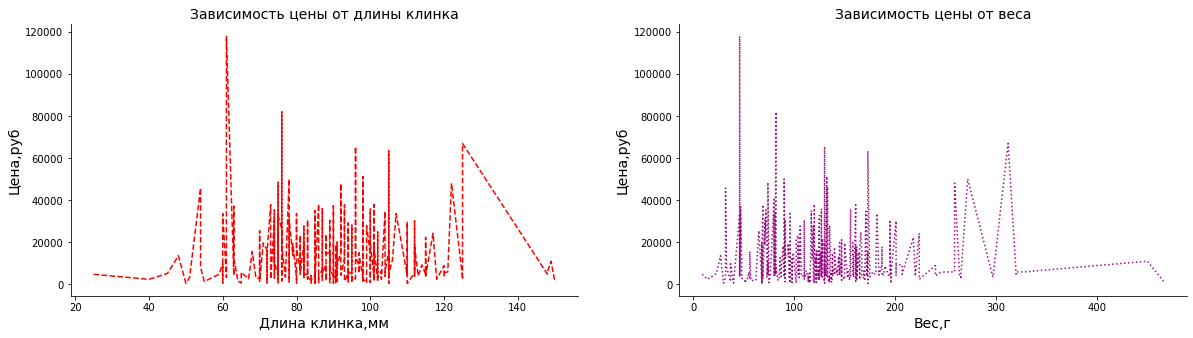

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize = (20,5))
df1 = df.sort_values('Длина_клинка')
df2 = df.sort_values('Вес')

ax[0].plot(df1.Длина_клинка, df1.Цены, color = 'r', ls = '--')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_xlabel('Длина клинка,мм', fontsize=14)
ax[0].set_ylabel('Цена,руб', fontsize=14)
ax[0].set_title('Зависимость цены от длины клинка', fontsize=14)

ax[1].plot(df2.Вес, df1.Цены, color = '#9E0A84', ls = ':')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_xlabel('Вес,г', fontsize=14)
ax[1].set_ylabel('Цена,руб', fontsize=14)
ax[1].set_title('Зависимость цены от веса', fontsize=14);

Вывод: Цена не зависит ни от длины клинка, ни от веса

Гипотеза: твёрдость стали влияет на цену и на вес клинка, так как твердый материал дороже и тяжелее

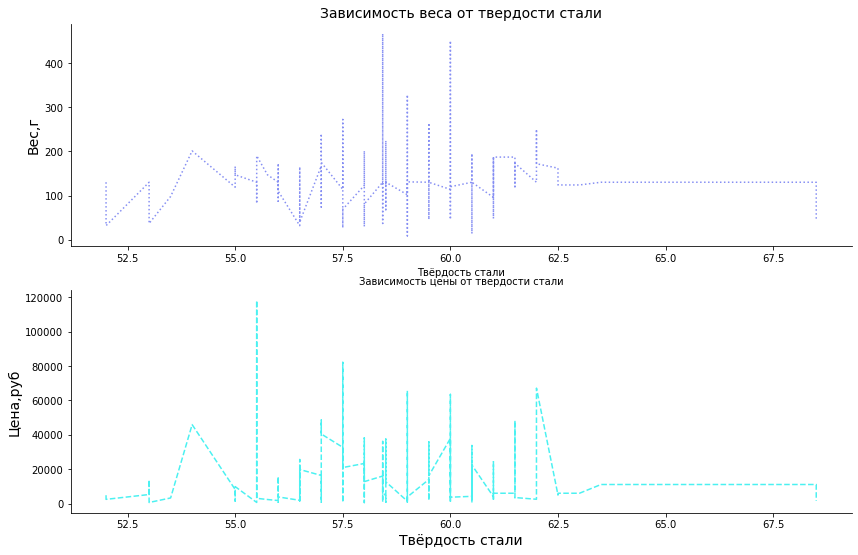

In [37]:
fig, ax = plt.subplots(2,1, figsize = (14,9))
df3 = df.sort_values('Твёрдость_стали')

ax[0].plot(df3.Твёрдость_стали, df1.Вес, color = '#868FF3', ls = ':')
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_xlabel('Твёрдость стали', fontsize=10)
ax[0].set_ylabel('Вес,г', fontsize=14)
ax[0].set_title('Зависимость веса от твердости стали', fontsize=14);

ax[1].plot(df3.Твёрдость_стали, df1.Цены, color = '#4BF1F1', ls = '--')
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_xlabel('Твёрдость стали', fontsize=14)
ax[1].set_ylabel('Цена,руб', fontsize=14);
ax[1].set_title('Зависимость цены от твердости стали', fontsize=10);

Вывод: гипотеза опровергается, твёрдость стали не влияет на данные показатели

Гипотезы:

1) Чем дороже нож, тем больше у него вес

2) Чем дороже нож, тем больше у него твёрдость

3) Чем дороже нож, тем больше у него длина клинка

4) Чем тяжелее нож, тем больше у него твёрдость стали

5) Чем тяжелее нож, тем больше у него длина клинка

Составим график, где радиус круга это длина клинка, а цвет круга - твёрдость стали (чем светлее, тем выше показатель). По оси х отложим цену, а по оси у - вес ножа

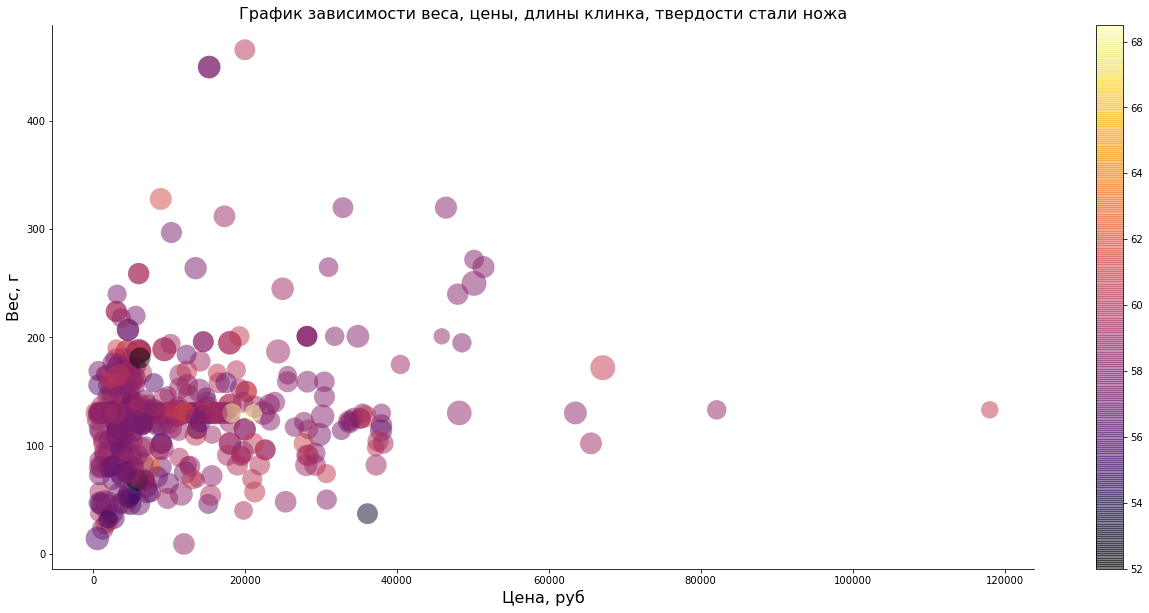

In [39]:
fig, ax = plt.subplots(figsize = (22,10))

color_graph = ax.scatter(prices, weight, s = df['Длина_клинка']*5, c = firmness, cmap = 'inferno', alpha = 0.5, linewidth = 0)

ax.spines['right'].set_visible(False)

ax.spines['top'].set_visible(False)

ax.set_xlabel('Цена, руб', fontsize = 16)

ax.set_ylabel('Вес, г', fontsize = 16)
ax.set_title('График зависимости веса, цены, длины клинка, твердости стали ножа', fontsize = 16)

plt.colorbar(color_graph);

Вывод:

1) Не подтвердилась: вес никак не коррелирует с ценой

2) Подтвердилась: ножи с большей твёрдостью стали дороже

3) Не подтвердилась: длина клинка не коррелирует с ценой

4) Подтвердилась: чем больше у ножа вес, тем больше у него твердость стали

5) Не подтвердилась: длина клинка не коррелирует с весом

Гипотеза: ножи категории "Хиты" имеют примерно одинаковую длину клинка

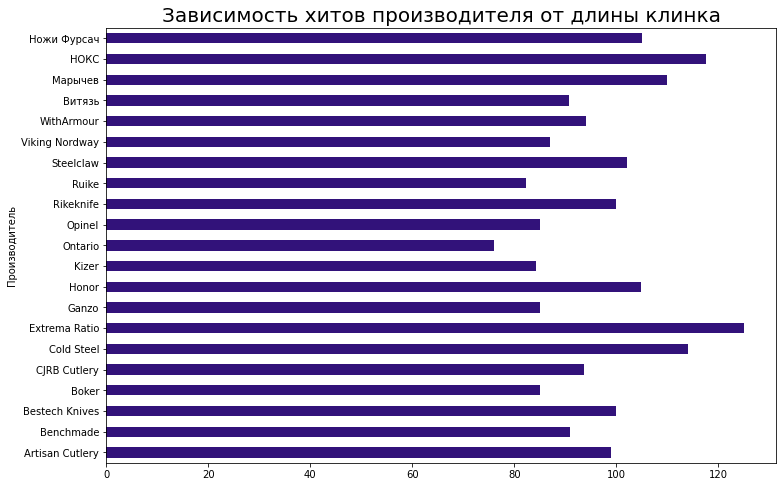

In [40]:
plt.title('Зависимость хитов производителя от длины клинка', fontsize = 20);
df[df['Хиты'] == 'Да'].groupby('Производитель')['Длина_клинка'].mean().plot(kind="barh", figsize = (12,8), color = '#32127A');

Вывод: Гипотеза подтверждается: действительно, ножи категории "Хиты" имеют примерно одинаковую длину клинка в среднем 80-120 мм

Гипотеза: есть сильные корреляции между ценой и признаками ножа. Рассмотрим возможные корреляции и узнаем, наиболее сильные корреляции.

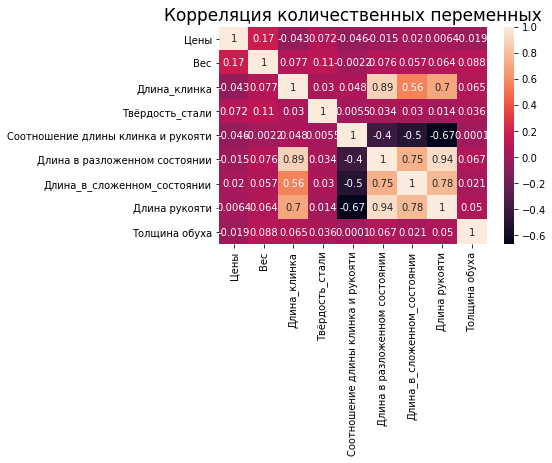

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title('Корреляция количественных переменных', fontsize = 17);
x = df[['Цены', 'Вес','Длина_клинка', 'Твёрдость_стали', 'Соотношение длины клинка и рукояти', 'Длина в разложенном состоянии', 'Длина_в_сложенном_состоянии', 'Длина рукояти', 'Толщина обуха']];
x.corr()
sns.heatmap(x.corr(), annot = True);

Вывод:
1)можно выделить корреляцию между ценой и весом. Она самая сильная из представленных, но назвать ее сильно не представляется возможным.
2)Также можно сказать, что длина в сложенном и разложенном состояниях больше всего зависит от длины рукояти, чем от длины клинка. 

Гипотеза: Есть "элитный" производитель с самыми высокими ценами, сильно отличающимися от других производителей

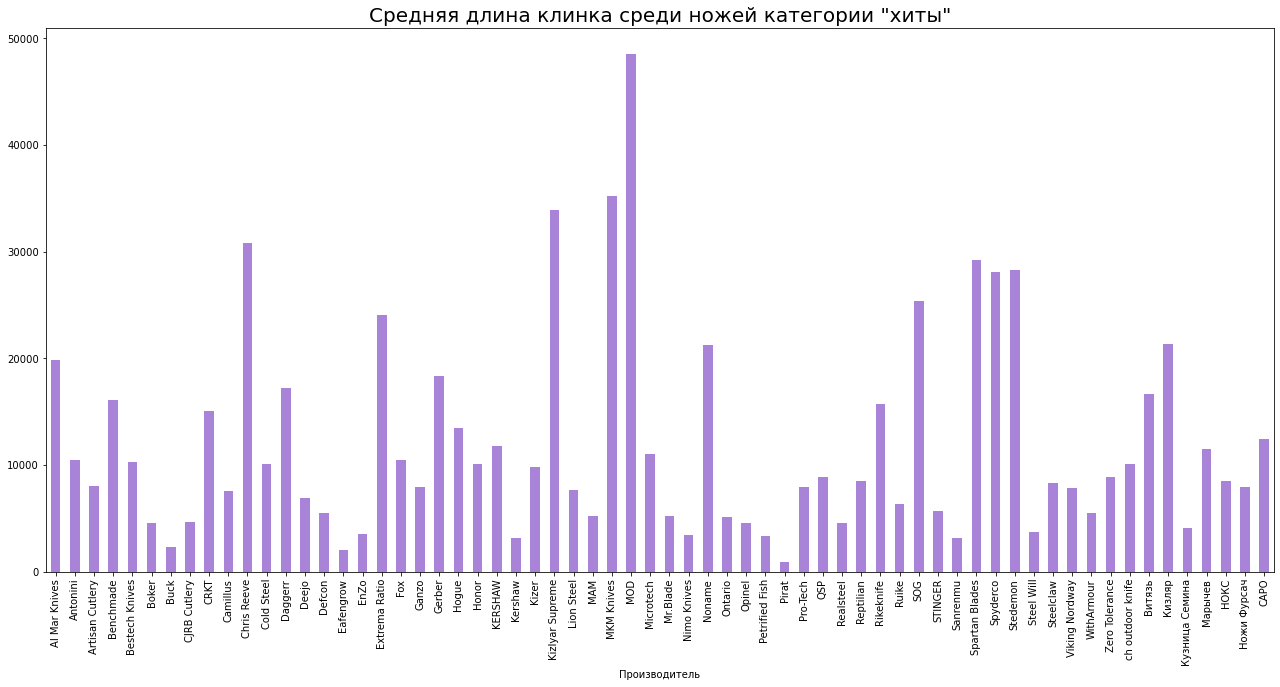

In [42]:
plt.title('Средняя длина клинка среди ножей категории "хиты"', fontsize = 20);
df.groupby('Производитель')['Цены'].mean().plot(kind="bar", figsize = (22,10), color = '#A883D8');

Вывод: Гипотеза подтверждается, производитель "MOD" является самым дорогим брендом со средней ценой 49 000 р

Гипотеза: Новинки дороже остальных ножей

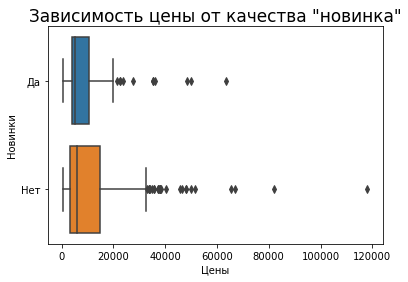

In [44]:
plt.title('Зависимость цены от качества "новинка"', fontsize = 17);
sns.boxplot(x = df['Цены'], y = df['Новинки']);

Вывод: гипотеза не подтвердилась, новинки в среднем дешевле остальных ножей

Гипотеза: Хиты дороже средних ножей и, следовательно, дороже новинок

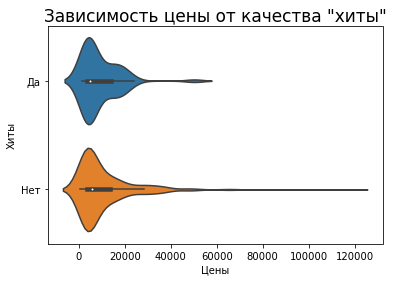

In [45]:
plt.title('Зависимость цены от качества "хиты"', fontsize = 17);
sns.violinplot(x = df['Цены'], y = df['Хиты']);

Вывод:Хиты действительно дорожесредних ножей, также видна категория особо дорогих ножей, принадлежащих категории хиты.

Рассмотрим производителя. Гипотеза: на сайте есть крупные "игроки", которые больше всего представлены на сайте. Найдем самого популярного производителя при помощи графиков.

In [46]:
import matplotlib.pyplot as plt
plt.title('Зависимость количество представленных моделей от производителя"', fontsize = 20);
df['Производитель'].value_counts().plot(kind='bar', figsize=(200, 100), fontsize = 70, color = 'yellow', label = 'Количество представленных моделей по производителям');

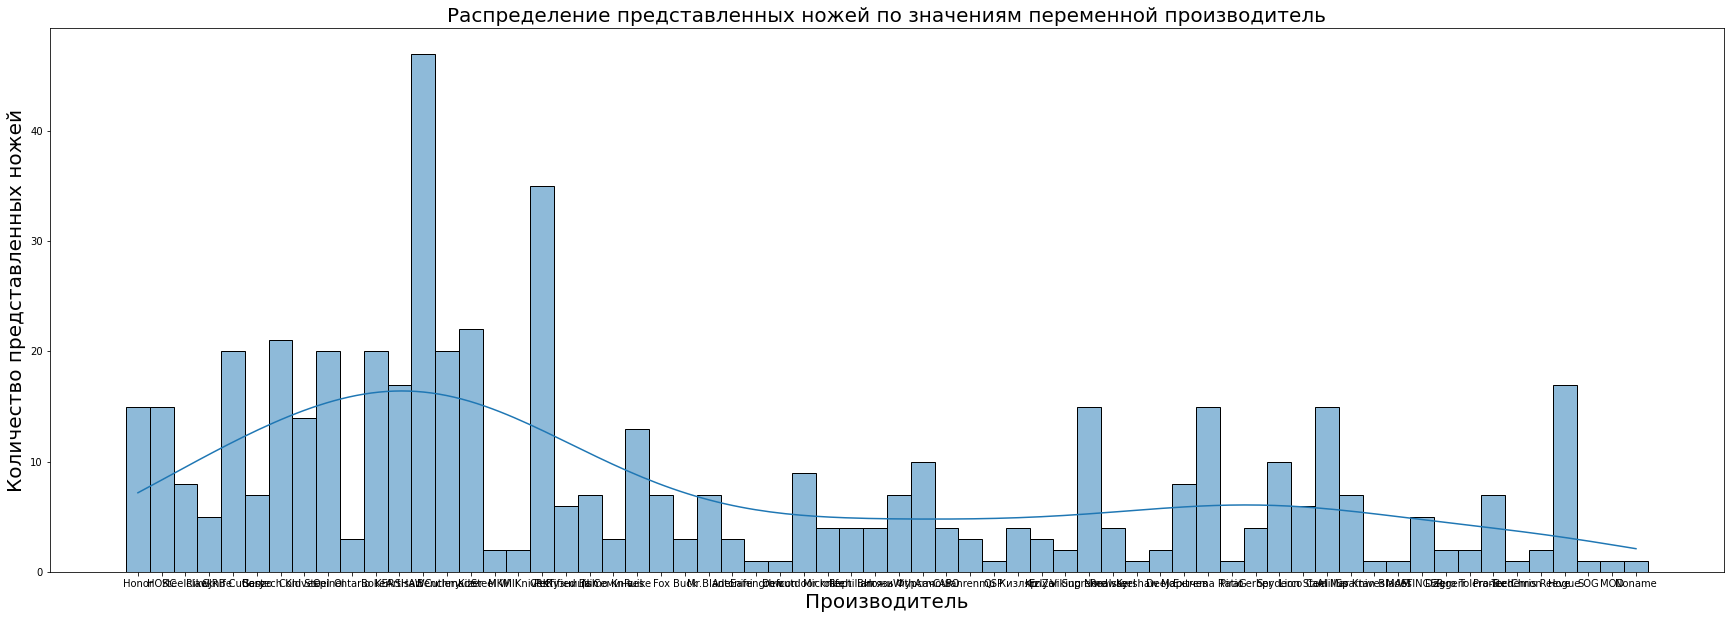

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,10));
plt.title('Распределение представленных ножей по значениям переменной производитель', fontsize = 20);
plt.xlabel('Производитель', fontsize = 20);
plt.ylabel('Количество представленных ножей', fontsize = 20);
sns.histplot(df['Производитель'], kde = True);


Вывод: самый популярный производитель - Artisan Cutlery. По графину видно, что есть два больших "игрока" в продаже - Artisan Cutlery и CRKT.

Гипотеза: Толщина обуха коррелирует с длиной в разложенном состочнии, так как чем длинее нож, тем толще должен быть обух.

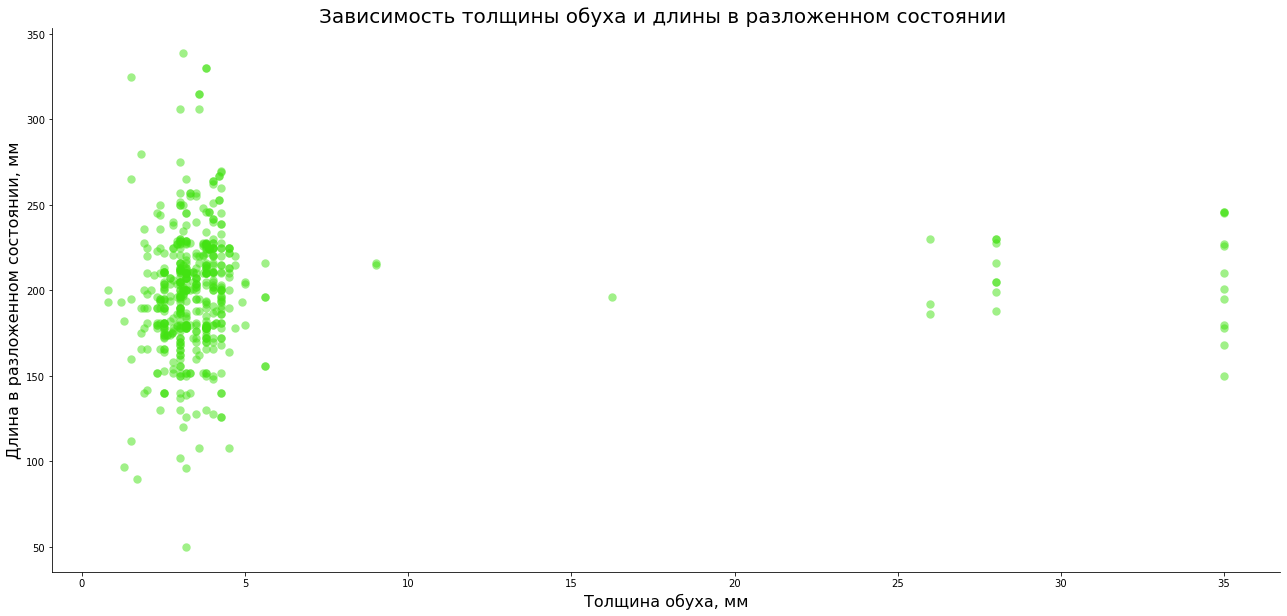

In [48]:
fig, ax = plt.subplots(figsize = (22,10))

color_graph = ax.scatter(df['Толщина обуха'], df['Длина в разложенном состоянии'], s = 70, c = '#42E212', alpha = 0.5, linewidth = 0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Толщина обуха, мм', fontsize = 16)
ax.set_ylabel('Длина в разложенном состоянии, мм', fontsize = 16)
ax.set_title('Зависимость толщины обуха и длины в разложенном состоянии ', fontsize = 20);

color_graph;

Вывод: гипотеза не подтвердилась, при каждой толщине обуха наблюдается сильный разброс длины ножа в разложенном состоянии. Также ярко выделяются ножи с большой толщиной обуха, по ним также сильный разброс.

Гипотеза: среди ножей, рекомендуемых данным магазином много дешёвых и маленьких ножей. Так как они многофункциональны, применимы как в походах, так и в повседневной жизни.

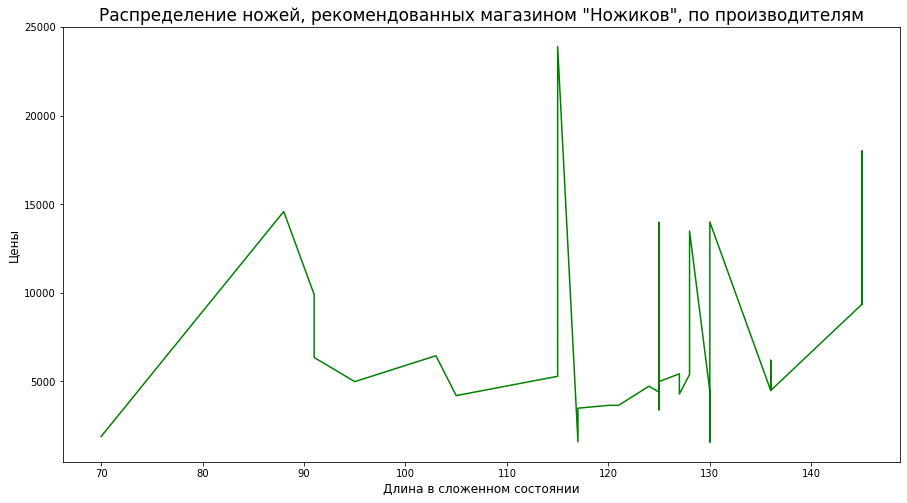

In [49]:
df5 = df[df["Рекомендация магазина 'Ножиков'"] == 'Да'].sort_values("Длина_в_сложенном_состоянии")
fig, ax = plt.subplots(1,1,figsize = (15,8))
plt.title('Распределение ножей, рекомендованных магазином "Ножиков", по производителям', fontsize = 17);
plt.xlabel('Длина в сложенном состоянии', fontsize = 12);
plt.ylabel('Цены', fontsize = 12);
ax.plot(df5.Длина_в_сложенном_состоянии, df5.Цены, color = 'green');

Вывод: цены действительно низкие, максимальные цена ножа во всём магазине около 120 тысяч рублей, среди рекомендованных максимальная стоимость менбше 25 тысяч. Длина ножей совершенно разная. Гипотеза подтвердилась не полностью